# **Projeto ION IA Productivity Forecast**

Projeto para criação de modelos que melhor performam um problema de Machine Learning de Regressão onde é desejado predizer a produtividade de um vendedor a partir das características dadas.

_________________________________________________
## **Importando Libs**

__________________________________________________

**Install Prophet:**

In [ ]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pystan==2.19.1.1 prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Install pycaret regression**

In [ ]:
pip install pycaret --user

In [ ]:
pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.


**Install pycaret time-series**

In [ ]:
!pip install pycaret-ts-alpha

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached joblib-1.0.1-py3-none-any.whl (303 kB)
  Using cached yellowbrick-1.4-py3-none-any.whl (274 kB)
  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)
  Using cached numba-0.55.2-cp37-cp37m-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.3 MB)
  Using cached numpy-1.21.6-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Using cached scipy-1.7.3-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (38.1 MB)
  Using cached scikit_learn-1.0.2-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (24.8 MB)
  Using cached imbalanced_learn-0.9.0-py3-none-any.whl (199 kB)
  Using cached llvmlite-0.38.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: 

In [ ]:
import jinja2

In [ ]:
from pycaret.regression import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
from pycaret.time_series import *

ModuleNotFoundError: ignored

In [ ]:
import pandas as pd
import numpy as np

# Math
from scipy import stats
from scipy.stats import norm
from math import exp
from math import sqrt

# Sazonalidade
from statsmodels.tsa.seasonal import seasonal_decompose
#from statsmodels.tsa.seasonal import STL

# Date
from datetime import date

import itertools

import warnings
warnings.filterwarnings('ignore')

# Images
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pandas.plotting import autocorrelation_plot

# Split
from sklearn.model_selection import train_test_split 

# Models
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor 
from sklearn.svm import SVR

# LSTM e ANN
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.layers import LSTM


# from keras.models import Sequential
# from keras.layers import Dense

# PREPROCESSING AND METRICS
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

#import shap

# Pycaret
#import jinja2
#from pycaret.regression import *


# Prophet
#import prophet

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Lendo o dataset**

In [ ]:
# Para aparecer todas as linhas e colunas do dataset

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
dataframe = pd.read_csv('/content/drive/MyDrive/Projetos_ion/ion_productivity_forecast/datas/dataframe300.csv')
dataframe.head()

Unnamed: 0             _id  codvendedor  vltotal  vltabela  codigo01  \
0           0  203_2022-02-01          203      260       260       NaN   
1           1  201_2022-02-01          201      367       359    9964.0   
2           2  303_2022-02-01          303      159       159   10477.0   
3           3  106_2022-02-01          106      238       227       NaN   
4           4  302_2022-02-01          302      111       111    3363.0   

   codigo02                 data tipometa tipodados  vl_venda  qt_venda  \
0       NaN  2022-02-01T00:00:00       MR        DM         0       NaN   
1    4953.0  2022-02-01T00:00:00       CF         A        39       6.0   
2    3522.0  2022-02-01T00:00:00       CF         A        51      25.0   
3       NaN  2022-02-01T00:00:00       MR        DM         0       NaN   
4       NaN  2022-02-01T00:00:00        P         A        24      24.0   

    peso  pos_mix  pos_clientes  perc_lucratividade  vl_venda_transmitida  \
0  44.88      NaN           NaN            0.312858                  1361   
1    NaN      1.0           1.0            0.279514                  2299   
2  53.46      2.0           1.0            0.286859                  1721   
3  60.52      NaN           NaN            0.326863                  3199   
4  96.08      1.0           1.0            0.300388                  2121   

   vl_venda_faturada  vl_venda_tabela  vl_venda_custo  vl_devolucao  \
0                860             1353             935             0   
1                  0             2273            1656             0   
2               1247             1742            1227             0   
3                922             3145            2153             0   
4               1511             2121            1484             0   

   vl_comissao  vl_st  vl_ipi  vl_outros  vl_venda_nao_faturada  \
0            0      0       0          0                      0   
1            0      0       0          0                      0   
2            0      0       0          0                      0   
3            0      0       0          0                      0   
4            0      0       0          0                      0   

   vl_venda_bloqueada  clientes_positivados  clientes_positivados_delta  \
0                   0                   4.0                         4.0   
1                   0                   7.0                         7.0   
2                   0                   9.0                         9.0   
3                   0                  10.0                        10.0   
4                   0                  11.0                        11.0   

   total_pedidos  total_pedidos_prazo  vl_venda_callcenter  \
0           1361                20124                    0   
1           2299                39589                    0   
2           1721                19930                    0   
3           3199                72714                    0   
4           2121                10916                    0   

   vl_titulos_recebidos  vl_lucro  vl_venda_lucro  vl_comissao_venda  \
0                     0         0               0                  0   
1                     0         0               0                  0   
2                     0         0               0                  0   
3                     0         0               0                  0   
4                     0         0               0                  0   

   vl_vales  vl_venda_tabela_faturada  codbairro  codcidade  codpais  \
0         0                         0        NaN      10393      NaN   
1         0                         0        NaN      10400      NaN   
2         0                         0        NaN      10196      NaN   
3         0                         0        NaN      10530      NaN   
4         0                         0        NaN      10196      NaN   

   codsupervisor  codcliprinc  uf  codibge    y  vltotal_1  vltotal_2  \
0             10         2233  RS  4311205  1

In [ ]:
dataframe.drop(columns=['Unnamed: 0'], inplace = True)
dataframe.head()

_id  codvendedor  vltotal  vltabela  codigo01  codigo02  \
0  203_2022-02-01          203      260       260       NaN       NaN   
1  201_2022-02-01          201      367       359    9964.0    4953.0   
2  303_2022-02-01          303      159       159   10477.0    3522.0   
3  106_2022-02-01          106      238       227       NaN       NaN   
4  302_2022-02-01          302      111       111    3363.0       NaN   

                  data tipometa tipodados  vl_venda  qt_venda   peso  pos_mix  \
0  2022-02-01T00:00:00       MR        DM         0       NaN  44.88      NaN   
1  2022-02-01T00:00:00       CF         A        39       6.0    NaN      1.0   
2  2022-02-01T00:00:00       CF         A        51      25.0  53.46      2.0   
3  2022-02-01T00:00:00       MR        DM         0       NaN  60.52      NaN   
4  2022-02-01T00:00:00        P         A        24      24.0  96.08      1.0   

   pos_clientes  perc_lucratividade  vl_venda_transmitida  vl_venda_faturada  \
0           NaN            0.312858                  1361                860   
1           1.0            0.279514                  2299                  0   
2           1.0            0.286859                  1721               1247   
3           NaN            0.326863                  3199                922   
4           1.0            0.300388                  2121               1511   

   vl_venda_tabela  vl_venda_custo  vl_devolucao  vl_comissao  vl_st  vl_ipi  \
0             1353             935             0            0      0       0   
1             2273            1656             0            0      0       0   
2             1742            1227             0            0      0       0   
3             3145            2153             0            0      0       0   
4             2121            1484             0            0      0       0   

   vl_outros  vl_venda_nao_faturada  vl_venda_bloqueada  clientes_positivados  \
0          0                      0                   0                   4.0   
1          0                      0                   0                   7.0   
2          0                      0                   0                   9.0   
3          0                      0                   0                  10.0   
4          0                      0                   0                  11.0   

   clientes_positivados_delta  total_pedidos  total_pedidos_prazo  \
0                         4.0           1361                20124   
1                         7.0           2299                39589   
2                         9.0           1721                19930   
3                        10.0           3199                72714   
4                        11.0           2121                10916   

   vl_venda_callcenter  vl_titulos_recebidos  vl_lucro  vl_venda_lucro  \
0                    0                     0         0               0   
1                    0                     0         0               0   
2                    0                     0         0               0   
3                    0                     0         0               0   
4                    0                     0         0               0   

   vl_comissao_venda  vl_vales  vl_venda_tabela_faturada  codbairro  \
0                  0         0                         0        NaN   
1                  0         0                         0        NaN   
2                  0         0                         0        NaN   
3                  0         0                         0        NaN   
4                  0         0                         0        NaN   

   codcidade  codpais  codsupervisor  codcliprinc  uf  codibge    y  \
0      10393      NaN             10         2233  RS  4311205  158   
1      10400      NaN             20        10344  RS  4311502  243   
2      10196      NaN             20         9161  RS  4301602  276   
3      10530      NaN             10         2664  RS  4316907  874 

In [ ]:
dataframe['data'] = pd.to_datetime(dataframe['data'])
type(dataframe['data'])

pandas.core.series.Series

In [ ]:
dataframe['codvendedor'].value_counts()

303    133
302    133
102    130
106    129
101    124
209    123
203    121
208    112
205    103
201     91
109     49
207     47
104     30
103     26
Name: codvendedor, dtype: int64

In [ ]:
dataframe.shape

(1351, 166)

In [ ]:
dataframe.info(object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1351 entries, 0 to 1350
Data columns (total 166 columns):
 #    Column                      Dtype  
---   ------                      -----  
 0    _id                         object 
 1    codvendedor                 int64  
 2    vltotal                     int64  
 3    vltabela                    int64  
 4    codigo01                    float64
 5    codigo02                    float64
 6    data                        object 
 7    tipometa                    object 
 8    tipodados                   object 
 9    vl_venda                    int64  
 10   qt_venda                    float64
 11   peso                        float64
 12   pos_mix                     float64
 13   pos_clientes                float64
 14   perc_lucratividade          float64
 15   vl_venda_transmitida        int64  
 16   vl_venda_faturada           int64  
 17   vl_venda_tabela             int64  
 18   vl_venda_custo              int64  
 19   vl_d

In [ ]:
dataframe.isnull().sum().sort_values(ascending = False)[:15]

codpais                       1351
codbairro                     1351
codigo02                      1010
pos_mix                        799
pos_clientes                   626
codigo01                       604
qt_venda                       533
peso                           386
tipometa                       363
tipodados                      363
clientes_positivados_delta      42
vltotal_70                       0
vltotal_72                       0
vltotal_71                       0
_id                              0
dtype: int64

In [ ]:
# Ver correlação com o target 'y'

y = dataframe['y']
X = dataframe[dataframe.columns.difference(['y'])]

df_corr = X.copy()
df_corr['y'] = y 
df_corr.corr()['y'].apply(abs).sort_values(ascending=False)[:20]

y                       1.000000
total_pedidos_prazo     0.502381
vltotal_87              0.479651
vl_venda_custo          0.462835
total_pedidos           0.460885
vl_venda_transmitida    0.460885
vl_venda_tabela         0.460068
vltotal_118             0.439919
vltotal_70              0.414635
vltabela                0.373866
vltotal                 0.371840
codsupervisor           0.330382
vltotal_1               0.296362
vltotal_16              0.250157
vltotal_71              0.231283
vltotal_90              0.225574
vl_venda_callcenter     0.219532
vltotal_82              0.212879
vl_venda_faturada       0.195813
vltotal_62              0.188902
Name: y, dtype: float64

In [ ]:
dataframe.describe()

codvendedor       vltotal      vltabela       codigo01      codigo02  \
count  1351.000000   1351.000000   1351.000000     747.000000    341.000000   
mean    187.833457    581.883050    585.368616    4474.874163   3573.683284   
std      72.768061   1636.908323   1645.731322    9970.981768   2038.535961   
min     101.000000      0.000000      0.000000       1.000000      1.000000   
25%     106.000000    154.000000    150.000000     347.500000   3522.000000   
50%     203.000000    248.000000    243.000000    3063.000000   3662.000000   
75%     209.000000    415.500000    411.000000    7337.500000   4885.000000   
max     303.000000  22848.000000  22848.000000  182763.000000  10075.000000   

           vl_venda     qt_venda         peso     pos_mix  pos_clientes  \
count   1351.000000   818.000000   965.000000  552.000000    725.000000   
mean     274.394523   133.700489   148.806676    6.306159      1.627586   
std      903.300811   343.079576   268.656148   10.534298      1.424649   
min        0.000000     1.000000   -61.046000    1.000000      1.000000   
25%        0.000000     9.000000    46.720000    1.000000      1.000000   
50%       23.000000    26.000000    98.710000    3.000000      1.000000   
75%      155.500000    87.750000   175.030000    7.000000      2.000000   
max    10265.000000  3588.000000  5235.860000   94.000000     11.000000   

       perc_lucratividade  vl_venda_transmitida  vl_venda_faturada  \
count         1351.000000           1351.000000        1351.000000   
mean             0.281118           3414.894152        2049.079201   
std              0.032702           4846.660146        2828.851083   
min              0.029009            110.000000           0.000000   
25%              0.262507           1447.500000           0.000000   
50%              0.284250           2263.000000        1274.000000   
75%              0.301364           3669.500000        2937.000000   
max              0.398516          62857.000000       29391.000000   

       vl_venda_tabela  vl_venda_custo  vl_devolucao  vl_comissao   vl_st  \
count      1351.000000     1351.000000   1351.000000       1351.0  1351.0   
mean       3437.818653     2483.535899     31.520355          0.0     0.0   
std        4919.944715     3672.951430    184.562946          0.0     0.0   
min         107.000000       80.000000      0.000000          0.0     0.0   
25%        1447.500000     1034.500000      0.000000          0.0     0.0   
50%        2281.000000     1641.000000      0.000000          0.0     0.0   
75%        3679.000000     2667.500000      0.000000          0.0     0.0   
max       63757.000000    47917.000000   5277.000000          0.0     0.0   

       vl_ipi  vl_outros  vl_venda_nao_faturada  vl_venda_bloqueada  \
count  1351.0     1351.0            1351.000000              1351.0   
mean      0.0        0.0               1.023686                 0.0   
std       0.0        0.0              32.660331                 0.0   
min       0.0        0.0               0.000000                 0.0   
25%       0.0        0.0               0.000000                 0.0   
50%       0.0        0.0               0.000000                 0.0   
75%       0.0        0.0               0.000000                 0.0   
max       0.0        0.0            1184.000000                 0.0   

       clientes_positivados  clientes_positivados_delta  total_pedidos  \
count           1351.000000                 1309.000000    1351.000000   
mean              57.292376                    5.475172    3414.894152   
std               34.872567                    3.208890    4846.660146   
min                1.000000                    1.000000     110.000000   
25%               26.000000                    3.000000    1447.500000   
50%               57.000000                    5.000000    2263.000000   
75%               83.000000                    7.000000    3669.500000   
max              154.000000                   19.000000   6285

In [ ]:
dataframe.clientes_positivados.value_counts()

18.0     20
8.0      19
69.0     19
31.0     19
57.0     18
13.0     18
15.0     18
11.0     17
44.0     17
24.0     17
14.0     17
49.0     16
9.0      16
10.0     16
73.0     16
58.0     15
12.0     15
16.0     15
67.0     15
65.0     15
86.0     15
82.0     15
72.0     15
70.0     14
41.0     14
85.0     14
71.0     14
76.0     14
26.0     14
80.0     14
74.0     13
55.0     13
6.0      13
81.0     13
96.0     13
78.0     13
40.0     13
47.0     13
56.0     13
35.0     13
64.0     13
89.0     13
103.0    12
53.0     12
46.0     12
62.0     12
83.0     12
7.0      12
92.0     12
4.0      12
5.0      12
75.0     12
50.0     12
19.0     12
34.0     11
48.0     11
93.0     11
28.0     11
59.0     11
25.0     11
60.0     11
68.0     11
84.0     11
79.0     11
77.0     11
37.0     10
29.0     10
42.0     10
22.0     10
32.0     10
100.0    10
108.0    10
101.0    10
87.0     10
20.0     10
27.0      9
23.0      9
2.0       9
63.0      9
39.0      9
51.0      9
113.0     9
99.0      9
30.0

In [ ]:
# Mostra valores exclusivos de cada coluna

for column in dataframe.columns:
    print(f"*****{column}*****")
    display(dataframe[column].value_counts())
    print("---------------------------")
print()

*****_id*****


203_2022-02-01    1
302_2022-03-09    1
103_2022-03-09    1
109_2022-03-09    1
106_2022-03-09    1
208_2022-03-09    1
303_2022-03-09    1
203_2022-03-09    1
102_2022-03-09    1
101_2022-03-09    1
208_2022-03-08    1
101_2021-12-13    1
109_2022-03-08    1
303_2022-03-08    1
103_2022-03-08    1
101_2022-03-08    1
203_2022-03-08    1
302_2022-03-08    1
106_2022-03-08    1
102_2022-03-08    1
101_2022-03-10    1
201_2022-03-10    1
303_2022-03-10    1
208_2022-03-10    1
209_2022-03-15    1
208_2022-03-15    1
205_2022-03-15    1
208_2022-03-14    1
207_2022-03-14    1
106_2022-03-14    1
203_2022-03-14    1
303_2022-03-14    1
205_2022-03-14    1
302_2022-03-14    1
201_2022-03-14    1
101_2022-03-14    1
109_2022-03-10    1
106_2022-03-10    1
209_2022-03-10    1
302_2022-03-10    1
102_2022-03-10    1
209_2022-03-08    1
203_2022-03-07    1
109_2022-03-07    1
109_2021-12-15    1
102_2021-12-15    1
302_2021-12-15    1
201_2021-12-15    1
209_2021-12-15    1
109_2021-12-14    1


---------------------------
*****codvendedor*****


303    133
302    133
102    130
106    129
101    124
209    123
203    121
208    112
205    103
201     91
109     49
207     47
104     30
103     26
Name: codvendedor, dtype: int64

---------------------------
*****vltotal*****


0        145
158       16
155       15
159       13
151       12
201       12
153       12
150       12
156       11
107       10
157        9
100        8
205        8
154        8
108        8
206        8
254        8
251        7
259        7
257        7
165        7
203        7
264        7
210        7
105        6
176        6
285        6
111        6
110        6
167        6
258        6
152        6
171        6
202        6
255        6
168        6
172        6
315        5
115        5
271        5
256        5
183        5
269        5
352        5
262        5
211        5
204        5
177        5
166        5
175        5
102        5
178        5
286        5
193        5
299        5
160        5
109        5
162        5
505        5
173        5
121        5
280        4
268        4
161        4
314        4
294        4
122        4
123        4
250        4
106        4
239        4
408        4
124        4
298        4
261        4
112        4
233        4

---------------------------
*****vltabela*****


148      12
5        12
158      12
150      12
151      11
154      11
11       10
156      10
153       9
259       9
206       9
152       8
100       8
99        8
12        8
22        8
166       7
20        7
105       7
254       7
255       7
144       7
253       7
202       7
121       7
155       7
258       7
111       7
269       6
108       6
162       6
24        6
107       6
209       6
159       6
149       6
8         6
251       6
249       5
174       5
218       5
229       5
147       5
97        5
19        5
367       5
196       5
298       5
212       5
106       5
161       5
179       5
34        5
37        5
187       5
110       5
198       5
33        5
271       5
180       5
338       5
193       5
146       5
203       5
169       5
280       5
13        5
299       5
10        5
222       5
210       5
168       5
284       4
289       4
302       4
494       4
177       4
165       4
245       4
113       4
27        4
239       4
143       4
336 

---------------------------
*****codigo01*****


24.0        9
135.0       8
10.0        8
120.0       7
8.0         7
3522.0      7
1867.0      7
25.0        7
50.0        7
4599.0      6
20.0        6
4953.0      5
35.0        5
9.0         5
4885.0      5
612.0       4
3380.0      4
58.0        4
355.0       4
10061.0     4
28.0        4
40.0        4
3212.0      4
3059.0      4
3361.0      4
30.0        4
3069.0      4
3363.0      4
100.0       4
300.0       4
125.0       3
3662.0      3
2973.0      3
3387.0      3
7.0         3
32.0        3
255.0       3
3248.0      3
10642.0     3
10025.0     3
2488.0      3
260.0       3
2483.0      3
5.0         3
2816.0      3
2115.0      3
3400.0      3
3063.0      3
3369.0      3
6815.0      3
75.0        3
6.0         3
70.0        3
190.0       2
10661.0     2
9428.0      2
165.0       2
10719.0     2
407.0       2
883.0       2
270.0       2
182763.0    2
663.0       2
3065.0      2
10626.0     2
3476.0      2
215.0       2
2332.0      2
1220.0      2
3001.0      2
8170.0      2
8596.0

---------------------------
*****codigo02*****


3522.0     70
3662.0     55
4599.0     37
4953.0     31
4885.0     31
3212.0     21
4982.0     14
1.0        10
20.0       10
10.0        8
135.0       8
35.0        7
4902.0      5
85.0        5
10026.0     3
120.0       3
3476.0      3
10066.0     2
5.0         2
4883.0      2
100.0       2
10074.0     2
105.0       2
15.0        1
10029.0     1
110.0       1
10033.0     1
115.0       1
10036.0     1
10075.0     1
40.0        1
Name: codigo02, dtype: int64

---------------------------
*****data*****


2022-05-30T00:00:00    13
2022-02-21T00:00:00    12
2022-04-19T00:00:00    12
2022-04-07T00:00:00    12
2022-06-29T00:00:00    12
2022-05-31T00:00:00    12
2022-06-27T00:00:00    12
2022-04-28T00:00:00    12
2022-03-23T00:00:00    11
2022-03-29T00:00:00    11
2022-06-06T00:00:00    11
2022-05-02T00:00:00    11
2022-05-03T00:00:00    11
2022-05-04T00:00:00    11
2022-06-02T00:00:00    11
2022-05-10T00:00:00    11
2022-06-01T00:00:00    11
2022-03-30T00:00:00    11
2022-05-23T00:00:00    11
2022-05-24T00:00:00    11
2021-11-24T00:00:00    11
2022-05-25T00:00:00    11
2022-03-16T00:00:00    11
2022-03-17T00:00:00    11
2022-02-01T00:00:00    11
2022-05-05T00:00:00    11
2022-04-26T00:00:00    11
2022-04-06T00:00:00    11
2022-05-18T00:00:00    10
2022-04-13T00:00:00    10
2022-06-30T00:00:00    10
2022-02-16T00:00:00    10
2022-04-18T00:00:00    10
2022-02-14T00:00:00    10
2022-03-24T00:00:00    10
2021-11-03T00:00:00    10
2021-11-08T00:00:00    10
2022-03-21T00:00:00    10
2021-10-07T0

---------------------------
*****tipometa*****


CF    269
MR    241
P     212
A      72
S      48
R      45
I      33
D      23
B      20
F      14
GP     11
Name: tipometa, dtype: int64

---------------------------
*****tipodados*****


A     818
DM    170
Name: tipodados, dtype: int64

---------------------------
*****vl_venda*****


0        533
19        15
22        14
11        13
12        12
23        11
34        10
20        10
21         9
10         8
9          8
13         8
27         8
29         8
15         8
25         8
35         7
24         7
14         7
39         7
42         6
38         6
52         6
37         6
152        6
75         6
71         6
43         6
69         6
33         6
28         6
46         6
17         6
77         5
54         5
158        5
59         5
72         5
36         5
115        4
40         4
55         4
48         4
63         4
16         4
41         4
32         4
57         4
114        4
49         4
26         4
107        4
68         4
170        4
163        4
149        3
18         3
138        3
254        3
179        3
53         3
8          3
95         3
121        3
184        3
103        3
99         3
73         3
79         3
128        3
282        3
157        3
160        3
169        3
150        3
51         3
162        3

---------------------------
*****qt_venda*****


12.0      62
6.0       53
1.0       40
3.0       33
24.0      31
20.0      30
18.0      21
10.0      20
5.0       20
48.0      18
4.0       18
30.0      18
60.0      15
2.0       15
8.0       15
28.0      12
36.0      11
50.0       9
9.0        9
40.0       8
54.0       8
15.0       7
90.0       7
72.0       7
56.0       7
34.0       6
21.0       6
27.0       6
42.0       5
16.0       5
35.0       5
25.0       5
13.0       4
256.0      4
216.0      4
62.0       4
29.0       4
112.0      4
96.0       4
100.0      4
26.0       3
7.0        3
138.0      3
84.0       3
81.0       3
198.0      3
47.0       3
68.0       3
85.0       3
39.0       3
14.0       3
114.0      3
212.0      3
17.0       3
80.0       3
38.0       3
86.0       3
210.0      2
158.0      2
131.0      2
209.0      2
276.0      2
156.0      2
88.0       2
11.0       2
292.0      2
282.0      2
66.0       2
185.0      2
83.0       2
108.0      2
384.0      2
92.0       2
58.0       2
102.0      2
193.0      2
180.0      2

---------------------------
*****peso*****


 100.600000     2
 156.700000     2
 173.310000     2
 38.920000      2
 84.440000      2
 54.110000      2
 79.690000      2
 60.980000      2
 128.050000     2
 31.860000      2
 41.760000      2
 20.090000      2
 94.820000      2
 52.330000      2
 41.400000      1
 115.720000     1
 15.660000      1
 162.320000     1
 90.800000      1
 311.100000     1
 248.710000     1
 172.600000     1
 44.880000      1
 283.136000     1
 89.800000      1
 38.390000      1
 62.360000      1
 220.280000     1
 115.810000     1
 99.880000      1
 130.600000     1
 247.950000     1
 445.770000     1
 140.940000     1
 257.400000     1
 171.360000     1
 81.960000      1
 80.390000      1
 125.410000     1
 44.290000      1
 47.480000      1
 110.190000     1
 170.830000     1
 222.600000     1
 200.100000     1
 309.810000     1
 137.190000     1
 194.701000     1
 129.450000     1
 31.650000      1
 54.070000      1
 87.790000      1
 131.710000     1
 538.180000     1
 10.020000      1
 574.89000

---------------------------
*****pos_mix*****


1.0     213
2.0      61
4.0      43
3.0      42
5.0      32
8.0      20
9.0      16
7.0      15
6.0      15
13.0     14
11.0      9
14.0      9
10.0      6
12.0      6
23.0      4
18.0      4
15.0      4
16.0      4
25.0      3
38.0      2
79.0      2
19.0      2
17.0      2
28.0      2
41.0      2
32.0      2
24.0      1
50.0      1
43.0      1
30.0      1
29.0      1
35.0      1
67.0      1
44.0      1
22.0      1
33.0      1
45.0      1
31.0      1
94.0      1
40.0      1
47.0      1
72.0      1
39.0      1
34.0      1
Name: pos_mix, dtype: int64

---------------------------
*****pos_clientes*****


1.0     533
2.0      90
3.0      43
4.0      19
5.0      12
6.0      10
7.0       9
8.0       6
10.0      2
11.0      1
Name: pos_clientes, dtype: int64

---------------------------
*****perc_lucratividade*****


0.295496    2
0.280528    2
0.276794    2
0.279175    2
0.282055    2
0.297233    2
0.288147    2
0.295564    2
0.288435    2
0.295752    2
0.264016    2
0.302341    2
0.294138    2
0.241304    2
0.254397    1
0.229647    1
0.297776    1
0.272137    1
0.292498    1
0.230851    1
0.269877    1
0.263694    1
0.294405    1
0.286072    1
0.236796    1
0.278308    1
0.314740    1
0.281536    1
0.320023    1
0.252028    1
0.330813    1
0.302892    1
0.281208    1
0.270346    1
0.268831    1
0.291173    1
0.320942    1
0.277596    1
0.309838    1
0.303584    1
0.260172    1
0.272652    1
0.286377    1
0.194859    1
0.276238    1
0.256125    1
0.294015    1
0.312858    1
0.289909    1
0.230188    1
0.299215    1
0.272183    1
0.295723    1
0.257248    1
0.310485    1
0.292064    1
0.278980    1
0.294350    1
0.285830    1
0.313142    1
0.307975    1
0.220065    1
0.324501    1
0.306492    1
0.275823    1
0.295506    1
0.290595    1
0.269493    1
0.288204    1
0.268501    1
0.307811    1
0.2957

---------------------------
*****vl_venda_transmitida*****


2002     4
2070     3
1531     3
3217     3
4728     3
2000     3
2822     3
894      3
2349     3
1839     3
2038     3
4304     3
1171     3
1276     3
2518     3
1191     3
1061     3
1306     3
2035     3
1233     3
1298     3
2812     2
1361     2
1467     2
2732     2
1699     2
4108     2
1583     2
2358     2
1688     2
2007     2
1510     2
2580     2
814      2
1054     2
1860     2
713      2
4019     2
1037     2
893      2
2357     2
1521     2
3521     2
880      2
745      2
2242     2
1550     2
544      2
1093     2
2803     2
1743     2
2508     2
937      2
3040     2
1455     2
2081     2
1418     2
824      2
2214     2
2256     2
2171     2
3219     2
1113     2
1802     2
1697     2
1945     2
2106     2
1430     2
3942     2
1725     2
1578     2
428      2
1640     2
749      2
1603     2
3105     2
2647     2
2157     2
2299     2
2713     2
1336     2
1520     2
2427     2
1029     2
1303     2
2502     2
2568     2
2101     2
1806     2
1406     2
1478     2

---------------------------
*****vl_venda_faturada*****


0        411
3411       3
1801       3
511        3
1793       2
1306       2
612        2
880        2
3406       2
5074       2
2755       2
1357       2
254        2
3428       2
799        2
1352       2
218        2
1537       2
2120       2
1121       2
1275       2
977        2
2835       2
408        2
5001       2
996        2
3194       2
1890       2
3467       2
2075       2
1643       2
158        2
2381       2
2499       2
1642       2
1423       2
2715       2
214        2
2041       2
586        2
1481       2
2169       2
222        2
110        2
4281       2
1447       2
966        2
3414       2
2305       2
2267       2
2243       2
1173       2
1054       2
212        2
1808       2
3274       2
2237       2
3553       2
5629       2
2314       2
1585       2
452        2
8605       1
1999       1
6351       1
1506       1
2155       1
1962       1
2122       1
3966       1
2756       1
1393       1
850        1
4346       1
6672       1
3627       1
5985       1

---------------------------
*****vl_venda_tabela*****


1515     4
2337     3
3220     3
1756     3
1956     3
1513     3
3440     3
730      3
1325     3
1664     3
1425     3
1780     3
1437     2
1728     2
2213     2
2886     2
4807     2
1294     2
1787     2
969      2
2118     2
2326     2
1433     2
1235     2
2427     2
4016     2
1738     2
2453     2
2345     2
677      2
2488     2
410      2
1626     2
1173     2
3153     2
2165     2
2524     2
1169     2
1564     2
1453     2
4070     2
1523     2
2287     2
2023     2
708      2
4716     2
1704     2
1353     2
2133     2
1144     2
3589     2
2110     2
2705     2
4165     2
4302     2
2562     2
901      2
2236     2
2143     2
2009     2
1647     2
2616     2
1549     2
786      2
2730     2
1884     2
1300     2
1059     2
1164     2
2078     2
2493     2
1707     2
1259     2
1424     2
1613     2
2354     2
4284     2
551      2
3351     2
2361     2
1835     2
1988     2
1487     2
1500     2
1955     2
3466     2
1200     2
480      2
3344     2
1837     2
2199     2

---------------------------
*****vl_venda_custo*****


1477     6
879      4
1707     4
968      3
701      3
2936     3
604      3
1094     3
1816     3
893      3
2336     3
1497     3
1806     3
2904     3
767      3
1464     3
1109     3
1547     3
2162     3
927      3
892      3
2047     3
1302     3
1330     3
1406     3
1394     3
765      3
281      2
1641     2
1915     2
1060     2
2515     2
1358     2
1914     2
1272     2
1003     2
525      2
1236     2
1566     2
1785     2
2446     2
1670     2
3292     2
1009     2
1161     2
1075     2
1436     2
2610     2
1543     2
2249     2
1733     2
1210     2
1933     2
966      2
1246     2
3069     2
1901     2
1455     2
877      2
1444     2
1502     2
914      2
669      2
707      2
2205     2
945      2
1880     2
1159     2
1038     2
1669     2
1291     2
2145     2
1336     2
1376     2
1892     2
1185     2
2401     2
1479     2
1626     2
1067     2
6995     2
1714     2
815      2
1011     2
1951     2
6568     2
2805     2
1720     2
1285     2
523      2
2049     2

---------------------------
*****vl_devolucao*****


0       1232
158        3
164        2
3          2
479        2
161        2
324        2
150        2
261        2
193        2
112        2
105        2
339        2
45         2
12         2
334        2
1447       1
138        1
208        1
428        1
878        1
646        1
356        1
676        1
115        1
470        1
317        1
186        1
455        1
244        1
1075       1
217        1
832        1
159        1
314        1
809        1
2          1
309        1
389        1
34         1
614        1
353        1
351        1
288        1
181        1
151        1
371        1
222        1
153        1
316        1
179        1
254        1
1051       1
700        1
229        1
787        1
694        1
367        1
364        1
570        1
152        1
400        1
473        1
320        1
103        1
17         1
174        1
259        1
104        1
450        1
170        1
359        1
155        1
271        1
397        1
269        1
537        1

---------------------------
*****vl_comissao*****


0    1351
Name: vl_comissao, dtype: int64

---------------------------
*****vl_st*****


0    1351
Name: vl_st, dtype: int64

---------------------------
*****vl_ipi*****


0    1351
Name: vl_ipi, dtype: int64

---------------------------
*****vl_outros*****


0    1351
Name: vl_outros, dtype: int64

---------------------------
*****vl_venda_nao_faturada*****


0       1349
1184       1
199        1
Name: vl_venda_nao_faturada, dtype: int64

---------------------------
*****vl_venda_bloqueada*****


0    1351
Name: vl_venda_bloqueada, dtype: int64

---------------------------
*****clientes_positivados*****


18.0     20
8.0      19
69.0     19
31.0     19
57.0     18
13.0     18
15.0     18
11.0     17
44.0     17
24.0     17
14.0     17
49.0     16
9.0      16
10.0     16
73.0     16
58.0     15
12.0     15
16.0     15
67.0     15
65.0     15
86.0     15
82.0     15
72.0     15
70.0     14
41.0     14
85.0     14
71.0     14
76.0     14
26.0     14
80.0     14
74.0     13
55.0     13
6.0      13
81.0     13
96.0     13
78.0     13
40.0     13
47.0     13
56.0     13
35.0     13
64.0     13
89.0     13
103.0    12
53.0     12
46.0     12
62.0     12
83.0     12
7.0      12
92.0     12
4.0      12
5.0      12
75.0     12
50.0     12
19.0     12
34.0     11
48.0     11
93.0     11
28.0     11
59.0     11
25.0     11
60.0     11
68.0     11
84.0     11
79.0     11
77.0     11
37.0     10
29.0     10
42.0     10
22.0     10
32.0     10
100.0    10
108.0    10
101.0    10
87.0     10
20.0     10
27.0      9
23.0      9
2.0       9
63.0      9
39.0      9
51.0      9
113.0     9
99.0      9
30.0

---------------------------
*****clientes_positivados_delta*****


4.0     159
3.0     155
5.0     154
2.0     146
6.0     139
7.0     121
1.0     113
8.0      89
9.0      77
10.0     55
11.0     38
12.0     24
13.0     19
14.0      8
15.0      6
16.0      4
17.0      1
19.0      1
Name: clientes_positivados_delta, dtype: int64

---------------------------
*****total_pedidos*****


2002     4
2070     3
1531     3
3217     3
4728     3
2000     3
2822     3
894      3
2349     3
1839     3
2038     3
4304     3
1171     3
1276     3
2518     3
1191     3
1061     3
1306     3
2035     3
1233     3
1298     3
2812     2
1361     2
1467     2
2732     2
1699     2
4108     2
1583     2
2358     2
1688     2
2007     2
1510     2
2580     2
814      2
1054     2
1860     2
713      2
4019     2
1037     2
893      2
2357     2
1521     2
3521     2
880      2
745      2
2242     2
1550     2
544      2
1093     2
2803     2
1743     2
2508     2
937      2
3040     2
1455     2
2081     2
1418     2
824      2
2214     2
2256     2
2171     2
3219     2
1113     2
1802     2
1697     2
1945     2
2106     2
1430     2
3942     2
1725     2
1578     2
428      2
1640     2
749      2
1603     2
3105     2
2647     2
2157     2
2299     2
2713     2
1336     2
1520     2
2427     2
1029     2
1303     2
2502     2
2568     2
2101     2
1806     2
1406     2
1478     2

---------------------------
*****total_pedidos_prazo*****


0          29
19362       2
30375       2
56617       2
24441       2
38116       2
16006       2
12611       2
20124       1
35369       1
254772      1
42761       1
339420      1
52486       1
99729       1
155889      1
200342      1
29328       1
76834       1
39730       1
286859      1
38886       1
275163      1
25966       1
29451       1
158516      1
65369       1
67463       1
122548      1
13380       1
720421      1
7919        1
74195       1
16766       1
21563       1
36681       1
21350       1
118066      1
43914       1
81890       1
179826      1
40640       1
10858       1
33061       1
36429       1
101709      1
90303       1
80048       1
37094       1
60621       1
213707      1
24130       1
16662       1
60103       1
96189       1
69557       1
43506       1
194229      1
55274       1
21940       1
14345       1
128007      1
67941       1
18851       1
28853       1
145036      1
72063       1
26594       1
55124       1
146671      1
87662       1
267073

---------------------------
*****vl_venda_callcenter*****


0        1334
341         1
267         1
57          1
4255        1
342         1
22132       1
18228       1
120         1
237         1
10010       1
4180        1
364         1
1877        1
10692       1
5923        1
1476        1
216         1
Name: vl_venda_callcenter, dtype: int64

---------------------------
*****vl_titulos_recebidos*****


0    1351
Name: vl_titulos_recebidos, dtype: int64

---------------------------
*****vl_lucro*****


0    1351
Name: vl_lucro, dtype: int64

---------------------------
*****vl_venda_lucro*****


0    1351
Name: vl_venda_lucro, dtype: int64

---------------------------
*****vl_comissao_venda*****


0    1351
Name: vl_comissao_venda, dtype: int64

---------------------------
*****vl_vales*****


0    1351
Name: vl_vales, dtype: int64

---------------------------
*****vl_venda_tabela_faturada*****


0    1351
Name: vl_venda_tabela_faturada, dtype: int64

---------------------------
*****codbairro*****


Series([], Name: codbairro, dtype: int64)

---------------------------
*****codcidade*****


10530    412
10196    214
10538    103
10393     84
10291     54
10507     47
10632     47
10578     43
10330     36
10576     36
10167     26
10225     25
10377     22
10169     19
10583     19
10389     19
10446     17
10243     15
10533     15
10415     14
10400     11
10360     11
10443      8
10337      7
10503      6
10297      6
10616      6
10569      6
10304      5
10250      5
10378      4
10554      3
10227      2
10638      2
10383      1
10599      1
Name: codcidade, dtype: int64

---------------------------
*****codpais*****


Series([], Name: codpais, dtype: int64)

---------------------------
*****codsupervisor*****


20    695
10    581
30     75
Name: codsupervisor, dtype: int64

---------------------------
*****codcliprinc*****


8565     11
1939      8
1468      7
1160      7
3878      7
2436      6
1131      5
6763      5
10286     5
10257     5
1737      5
776       5
10669     5
1641      5
4077      5
1503      5
4454      5
1806      5
8870      5
2332      5
8504      4
2017      4
2438      4
996       4
2737      4
1931      4
7826      4
2776      4
507       4
3371      4
1437      4
1707      4
5021      4
10021     4
9161      4
10005     4
1959      4
4664      4
7494      4
3047      4
10408     4
10090     4
2313      4
1623      4
8300      3
5816      3
6570      3
6441      3
10634     3
3439      3
9794      3
8638      3
5619      3
1089      3
8319      3
1004      3
3321      3
10068     3
6815      3
10814     3
2233      3
9152      3
4465      3
7692      3
9276      3
2569      3
2150      3
554       3
7085      3
3742      3
9203      3
7991      3
10324     3
2782      3
8363      3
5834      3
9331      3
3388      3
9769      3
2408      3
3968      3
3305      3
6557      3
5086

---------------------------
*****uf*****


RS    1351
Name: uf, dtype: int64

---------------------------
*****codibge*****


4316907    412
4301602    214
4317400    103
4311205     84
4306106     54
4315503     47
4322202     47
4319604     43
4308003     36
4319406     36
4300034     26
4302808     25
4310538     22
4300109     19
4319802     19
4311106     19
4313102     17
4304358     15
4317004     15
4312104     14
4311502     11
4309654     11
4313037      8
4308409      7
4315321      6
4306379      6
4321493      6
4319125      6
4306700      5
4304655      5
4310553      4
4318432      3
4303004      2
4322376      2
4310751      1
4320651      1
Name: codibge, dtype: int64

---------------------------
*****y*****


158      15
151      14
107      14
159      14
150      13
155      13
201      12
152      11
108      11
153      11
154      10
105       9
157       9
210       9
165       9
254       9
200       9
205       8
257       8
251       8
156       8
177       7
260       7
256       7
204       7
253       7
286       7
100       7
178       7
259       7
176       6
164       6
115       6
270       6
232       6
207       6
166       6
111       6
211       6
167       6
172       6
161       6
264       6
109       6
160       6
110       6
258       6
220       6
239       5
330       5
219       5
252       5
357       5
299       5
206       5
314       5
298       5
162       5
203       5
250       4
519       4
183       4
202       4
305       4
199       4
226       4
122       4
171       4
352       4
173       4
284       4
135       4
227       4
225       4
320       4
505       4
208       4
182       4
184       4
331       4
101       4
168       4
363       4
280 

---------------------------
*****vltotal_1*****


0        599
159       10
158       10
155        9
153        8
107        8
156        8
151        8
154        7
259        7
264        7
157        6
171        6
100        6
205        6
262        5
166        5
258        5
203        5
102        5
108        5
150        5
105        5
206        5
256        5
280        4
111        4
167        4
254        4
294        4
251        4
173        4
266        4
314        4
260        4
505        4
255        4
285        4
354        4
165        4
193        4
175        4
315        4
124        4
178        3
104        3
112        3
305        3
220        3
227        3
268        3
168        3
286        3
261        3
257        3
233        3
298        3
219        3
121        3
109        3
244        3
176        3
221        3
161        3
278        3
283        3
302        3
182        3
160        3
330        3
172        3
106        3
207        3
239        3
123        3
170        3
204        3

---------------------------
*****vltotal_2*****


0       891
158       8
155       8
159       7
205       6
153       6
151       5
285       5
108       4
262       4
105       4
171       4
193       4
251       4
156       4
259       4
107       4
255       4
150       3
117       3
264       3
100       3
177       3
283       3
203       3
250       3
125       3
154       3
206       3
305       3
112       3
123       3
170       3
110       3
256       3
410       3
265       3
111       3
161       3
481       3
121       3
260       3
102       3
211       3
160       3
166       3
157       3
409       2
502       2
224       2
165       2
505       2
178       2
414       2
385       2
261       2
254       2
188       2
239       2
396       2
826       2
530       2
106       2
204       2
202       2
304       2
302       2
183       2
175       2
115       2
173       2
632       2
257       2
435       2
514       2
138       2
168       2
280       2
652       2
103       2
272       2
294       2
116       2
139 

---------------------------
*****vltotal_3*****


0       1109
155        5
262        4
159        4
156        4
123        4
153        4
283        3
255        3
171        3
150        3
265        3
298        2
652        2
205        2
261        2
110        2
250        2
244        2
104        2
264        2
632        2
102        2
203        2
271        2
175        2
304        2
128        2
202        2
826        2
105        2
106        2
168        2
139        2
151        2
251        2
146        2
111        2
294        2
193        2
397        2
170        2
158        2
481        2
272        2
258        2
7987       1
163        1
398        1
733        1
2690       1
760        1
186        1
267        1
438        1
188        1
812        1
354        1
352        1
515        1
323        1
305        1
213        1
256        1
280        1
166        1
467        1
660        1
121        1
479        1
332        1
177        1
503        1
285        1
345        1
330        1
501        1

---------------------------
*****vltotal_4*****


0        1116
150         6
155         5
201         5
108         4
151         3
110         3
152         3
158         3
210         3
172         3
159         2
261         2
177         2
168         2
299         2
528         2
254         2
250         2
320         2
162         2
357         2
271         2
160         2
408         2
213         2
206         2
111         2
156         2
342         2
229         2
205         2
297         2
183         2
176         2
157         2
181         2
340         1
467         1
346         1
709         1
409         1
2404        1
428         1
112         1
146         1
664         1
144         1
215         1
203         1
363         1
327         1
175         1
303         1
124         1
178         1
265         1
1033        1
1523        1
458         1
252         1
364         1
196         1
348         1
496         1
744         1
118         1
239         1
212         1
4251        1
289         1
1150  

---------------------------
*****vltotal_5*****


0        903
150        7
158        6
155        6
156        6
157        5
201        5
152        5
151        5
107        5
172        5
264        4
254        4
258        4
165        3
320        3
100        3
178        3
210        3
168        3
159        3
363        3
299        3
110        3
176        3
198        3
286        3
276        3
207        3
278        3
108        3
206        3
153        3
203        3
295        2
636        2
257        2
261        2
229        2
213        2
280        2
795        2
103        2
125        2
416        2
196        2
226        2
238        2
255        2
494        2
173        2
221        2
304        2
256        2
528        2
177        2
354        2
322        2
337        2
182        2
220        2
219        2
183        2
268        2
180        2
181        2
553        2
130        2
408        2
340        2
111        2
115        2
133        2
303        2
790        2
101        2
218        2

---------------------------
*****vltotal_6*****


0        675
158       10
201        9
150        8
210        7
151        7
107        6
159        6
152        6
155        6
100        6
108        5
254        5
157        5
160        5
256        5
172        5
154        5
156        5
259        5
183        4
233        4
239        4
153        4
115        4
103        4
176        4
121        4
206        4
219        4
205        4
264        4
258        4
257        4
111        4
286        4
109        4
110        4
260        4
178        4
505        3
251        3
303        3
298        3
162        3
144        3
278        3
191        3
320        3
255        3
209        3
166        3
125        3
268        3
167        3
343        3
198        3
220        3
173        3
299        3
519        3
408        3
165        3
168        3
295        3
352        3
494        3
203        3
234        3
276        3
363        3
101        3
269        3
271        3
196        3
126        2
113        2

---------------------------
*****vltotal_7*****


0       485
158      12
153      11
150      10
155      10
151       9
159       9
107       8
201       8
156       8
210       7
206       7
154       7
110       6
203       6
259       6
121       6
108       6
157       6
255       5
257       5
258       5
172       5
177       5
171       5
166       5
251       5
100       5
256       5
271       5
152       5
262       5
175       5
165       5
315       4
162       4
264       4
160       4
168       4
254       4
239       4
176       4
205       4
102       4
105       4
183       4
125       4
285       4
505       4
202       4
111       4
280       4
124       4
178       4
269       4
276       4
198       3
233       3
115       3
244       3
494       3
295       3
209       3
106       3
408       3
318       3
519       3
384       3
193       3
204       3
354       3
368       3
164       3
173       3
299       3
502       3
167       3
220       3
261       3
268       3
343       3
283       3
330       3
109 

---------------------------
*****vltotal_8*****


0       694
155      10
153      10
158      10
159       9
156       7
107       7
264       6
150       6
157       6
151       6
154       6
259       5
251       5
121       5
206       5
100       4
354       4
202       4
102       4
193       4
111       4
161       4
171       4
315       4
203       4
108       4
168       4
105       4
257       4
178       4
219       4
256       4
205       4
191       3
255       3
125       3
211       3
505       3
283       3
254       3
204       3
262       3
103       3
285       3
218       3
115       3
318       3
164       3
302       3
209       3
502       3
220       3
271       3
175       3
110       3
260       3
280       3
106       3
410       3
295       3
177       3
124       3
207       3
123       3
173       3
152       3
210       3
304       3
276       3
182       3
165       3
270       3
239       3
305       3
261       3
299       3
409       2
122       2
514       2
337       2
126       2
183       2
332 

---------------------------
*****vltotal_9*****


0       924
155       9
159       7
153       6
151       6
259       5
102       4
154       4
121       4
158       4
193       4
285       4
294       3
250       3
264       3
108       3
150       3
156       3
397       3
262       3
205       3
211       3
171       3
161       3
260       3
271       3
203       3
256       3
111       3
160       3
109       3
123       3
175       3
283       3
157       3
267       3
168       3
414       2
167       2
244       2
409       2
110       2
178       2
652       2
514       2
177       2
258       2
410       2
216       2
315       2
165       2
630       2
502       2
166       2
632       2
254       2
173       2
431       2
188       2
304       2
305       2
396       2
280       2
112       2
269       2
106       2
183       2
202       2
107       2
124       2
435       2
650       2
164       2
266       2
115       2
176       2
201       2
139       2
141       2
206       2
481       2
100       2
204       2
265 

---------------------------
*****vltotal_10*****


0       1137
155        8
159        4
123        4
150        4
193        3
285        3
168        3
271        2
294        2
139        2
298        2
226        2
110        2
315        2
258        2
255        2
205        2
154        2
124        2
156        2
202        2
203        2
354        2
304        2
188        2
157        2
267        2
632        2
264        2
204        2
153        2
141        2
103        2
211        2
397        2
121        2
111        2
265        2
323        1
826        1
479        1
352        1
812        1
398        1
438        1
7987       1
170        1
337        1
201        1
175        1
515        1
305        1
830        1
158        1
106        1
275        1
660        1
467        1
280        1
213        1
112        1
296        1
732        1
117        1
107        1
562        1
630        1
254        1
222        1
187        1
105        1
690        1
514        1
345        1
649        1
284        1

---------------------------
*****vltotal_11*****


0       1122
150        6
156        4
269        3
162        3
210        3
155        3
158        3
121        2
494        2
315        2
254        2
408        2
209        2
201        2
384        2
108        2
151        2
271        2
152        2
213        2
159        2
795        2
285        2
251        2
118        2
299        2
212        2
528        2
160        2
110        2
109        2
157        2
176        2
181        2
2990       1
222        1
146        1
340        1
123        1
516        1
288        1
372        1
337        1
197        1
206        1
2798       1
112        1
419        1
636        1
407        1
368        1
342        1
790        1
506        1
105        1
1033       1
175        1
458        1
496        1
364        1
348        1
252        1
7391       1
1429       1
215        1
144        1
861        1
2404       1
690        1
420        1
726        1
1244       1
298        1
183        1
261        1
177        1

---------------------------
*****vltotal_12*****


0        912
150        7
107        6
157        6
156        5
299        5
206        5
152        5
151        4
155        4
153        4
201        4
158        4
264        4
172        4
210        4
667        3
165        3
207        3
111        3
269        3
100        3
254        3
198        3
159        3
108        3
258        3
176        3
167        3
110        3
286        3
357        2
528        2
178        2
240        2
270        2
242        2
162        2
211        2
363        2
324        2
225        2
118        2
229        2
135        2
221        2
334        2
285        2
132        2
303        2
233        2
266        2
343        2
257        2
280        2
104        2
322        2
268        2
220        2
261        2
182        2
337        2
271        2
636        2
226        2
407        2
203        2
276        2
255        2
166        2
243        2
101        2
364        2
790        2
252        2
109        2
133        2

---------------------------
*****vltotal_13*****


0        693
107        9
201        7
150        7
151        7
153        7
158        7
210        7
152        6
206        6
162        6
257        6
259        6
159        6
157        5
165        5
167        5
100        5
183        4
239        4
286        4
160        4
352        4
109        4
111        4
105        4
110        4
172        4
166        4
254        4
505        4
124        4
155        4
251        4
103        4
176        4
213        4
299        4
108        4
255        3
133        3
198        3
285        3
256        3
494        3
156        3
101        3
280        3
264        3
269        3
211        3
667        3
161        3
203        3
207        3
218        3
298        3
204        3
258        3
314        3
276        3
220        3
260        3
173        3
102        3
196        3
636        2
466        2
242        2
330        2
125        2
305        2
240        2
513        2
229        2
289        2
414        2

---------------------------
*****vltotal_14*****


0        511
153       10
158       10
159        9
107        9
155        9
150        9
201        9
156        8
206        8
210        8
151        8
251        6
100        6
121        6
124        5
167        5
165        5
257        5
168        5
286        5
175        5
157        5
162        5
160        5
111        5
254        5
154        5
204        4
171        4
166        4
261        4
280        4
193        4
285        4
271        4
505        4
239        4
258        4
408        4
103        4
266        4
262        4
259        4
269        4
264        4
211        4
177        4
102        4
173        4
203        4
205        4
110        4
108        4
178        4
152        4
304        3
219        3
132        3
202        3
295        3
161        3
105        3
256        3
172        3
299        3
213        3
667        3
133        3
267        3
255        3
494        3
409        3
226        3
314        3
109        3
104        3

---------------------------
*****vltotal_15*****


0        716
153       10
107       10
159        7
155        7
151        7
100        6
259        6
206        6
157        5
121        5
257        5
124        5
108        5
158        5
156        5
264        5
171        5
102        5
167        5
255        4
111        4
193        4
251        4
204        4
154        4
122        4
280        4
210        4
505        4
175        4
294        4
168        4
183        3
266        3
261        3
182        3
262        3
164        3
178        3
254        3
165        3
176        3
397        3
318        3
256        3
139        3
267        3
161        3
502        3
298        3
103        3
146        3
410        3
354        3
105        3
219        3
260        3
481        3
203        3
286        3
220        3
202        3
205        3
299        3
207        3
304        3
104        3
270        2
242        2
226        2
166        2
295        2
200        2
240        2
113        2
258        2

---------------------------
*****vltotal_16*****


0        942
155        8
153        7
108        5
158        5
159        5
156        4
121        4
204        4
294        4
107        4
150        4
171        4
154        4
481        3
260        3
285        3
257        3
151        3
505        3
267        3
157        3
205        3
109        3
176        3
203        3
209        3
251        3
161        3
259        3
105        3
103        3
175        3
298        2
630        2
166        2
264        2
283        2
514        2
139        2
254        2
244        2
211        2
188        2
193        2
178        2
202        2
302        2
124        2
280        2
271        2
100        2
352        2
216        2
410        2
304        2
315        2
102        2
110        2
502        2
414        2
262        2
160        2
431        2
409        2
114        2
258        2
233        2
201        2
167        2
206        2
256        2
650        2
397        2
115        2
162        2
144        2

---------------------------
*****vltotal_17*****


0        1145
155         5
150         5
159         4
153         3
108         3
158         3
123         3
117         2
206         2
285         2
164         2
193         2
505         2
244         2
205         2
294         2
254         2
204         2
315         2
139         2
262         2
156         2
632         2
264         2
121         2
732         2
202         2
826         2
157         2
175         2
255         2
265         2
188         2
154         2
271         2
503         1
267         1
337         1
163         1
304         1
7987        1
323         1
4699        1
712         1
228         1
266         1
100         1
357         1
21981       1
112         1
181         1
296         1
110         1
128         1
441         1
725         1
211         1
585         1
666         1
634         1
286         1
222         1
421         1
297         1
1285        1
170         1
173         1
2078        1
619         1
677         1
330   

---------------------------
*****vltotal_18*****


0        1140
201         7
150         6
210         4
156         3
286         3
155         3
158         3
118         2
403         2
172         2
363         2
408         2
181         2
209         2
152         2
229         2
173         2
254         2
168         2
160         2
203         2
108         2
121         2
132         2
159         2
271         2
225         2
111         2
269         2
206         2
700         1
253         1
197         1
857         1
516         1
130         1
222         1
21981       1
458         1
175         1
1033        1
1523        1
105         1
248         1
364         1
496         1
252         1
861         1
441         1
508         1
135         1
790         1
690         1
1174        1
372         1
322         1
357         1
370         1
419         1
183         1
177         1
338         1
554         1
261         1
163         1
162         1
196         1
597         1
320         1
4733        1
569   

---------------------------
*****vltotal_19*****


0        930
201        8
150        7
155        5
107        5
258        5
158        5
156        5
172        4
299        4
111        4
101        4
210        4
202        4
178        3
121        3
159        3
363        3
165        3
153        3
408        3
286        3
151        3
104        3
157        3
221        3
203        3
168        3
173        3
261        2
204        2
181        2
289        2
252        2
553        2
212        2
130        2
160        2
636        2
407        2
268        2
322        2
125        2
198        2
133        2
345        2
152        2
167        2
259        2
343        2
301        2
211        2
269        2
383        2
242        2
354        2
177        2
280        2
162        2
234        2
276        2
206        2
243        2
303        2
109        2
124        2
257        2
550        2
108        2
528        2
254        2
364        2
226        2
118        2
122        2
338        2
110        2

---------------------------
*****vltotal_20*****


0       714
107       7
151       7
210       7
201       7
153       7
150       7
165       6
259       6
157       5
251       5
257       5
159       5
183       5
156       5
178       4
111       4
158       4
167       4
254       4
298       4
260       4
258       4
202       4
264       4
122       4
108       4
176       4
160       4
152       4
173       4
494       3
172       3
102       3
177       3
303       3
166       3
220       3
280       3
198       3
302       3
239       3
299       3
106       3
269       3
408       3
121       3
416       3
203       3
101       3
268       3
211       3
383       3
171       3
519       3
384       3
286       3
363       3
221       3
109       3
206       3
110       3
219       3
207       3
234       3
314       3
276       3
205       3
144       3
270       2
330       2
118       2
271       2
209       2
212       2
295       2
194       2
345       2
267       2
502       2
305       2
216       2
636       2
414 

---------------------------
*****vltotal_21*****


0       523
107      11
155      11
201       9
150       9
159       9
156       8
254       7
151       7
210       7
259       7
153       7
158       7
206       7
258       6
111       6
257       6
286       5
211       5
251       5
124       5
178       5
154       5
105       5
110       5
175       5
204       5
202       5
260       4
104       4
265       4
269       4
172       4
408       4
102       4
294       4
264       4
101       4
152       4
271       4
285       4
193       4
157       4
167       4
505       4
166       4
160       4
203       4
106       4
161       4
122       4
165       4
109       4
108       4
115       4
168       4
173       4
103       4
100       4
121       4
164       3
252       3
171       3
301       3
261       3
183       3
337       3
220       3
267       3
280       3
176       3
318       3
330       3
205       3
234       3
117       3
207       3
266       3
270       3
239       3
363       3
295       3
416       3
502 

---------------------------
*****vltotal_22*****


0        724
107       10
155        9
153        8
159        8
156        6
259        6
258        6
111        6
151        5
206        5
100        5
150        5
505        5
102        5
103        5
203        5
166        4
167        4
257        4
204        4
178        4
202        4
171        4
286        4
122        4
176        4
105        4
262        4
173        4
115        4
264        4
314        4
172        4
211        4
254        4
294        4
266        4
251        3
183        3
193        3
255        3
383        3
280        3
244        3
161        3
154        3
285        3
318        3
261        3
175        3
210        3
250        3
304        3
315        3
104        3
124        3
502        3
302        3
182        3
123        3
108        3
221        3
201        3
165        3
209        3
158        3
168        3
144        3
239        3
271        3
106        3
218        2
252        2
125        2
272        2
219        2

---------------------------
*****vltotal_23*****


0       940
159       7
153       7
108       5
150       5
294       4
155       4
203       4
154       4
259       4
183       3
251       3
286       3
102       3
211       3
298       3
105       3
264       3
267       3
166       3
254       3
262       3
161       3
266       3
271       3
158       3
151       3
117       3
204       3
107       3
109       3
103       3
121       3
209       3
514       2
164       2
304       2
261       2
224       2
250       2
258       2
139       2
330       2
318       2
106       2
502       2
409       2
414       2
630       2
505       2
168       2
156       2
171       2
144       2
218       2
385       2
100       2
112       2
202       2
176       2
206       2
138       2
114       2
122       2
210       2
216       2
110       2
652       2
285       2
160       2
397       2
123       2
265       2
382       2
170       2
157       2
201       2
197       2
132       2
557       2
228       2
519       2
120       2
352 

---------------------------
*****vltotal_24*****


0       1136
150        5
155        4
315        3
262        3
294        3
159        3
175        3
154        2
132        2
228        2
261        2
104        2
264        2
102        2
157        2
258        2
286        2
304        2
255        2
156        2
266        2
652        2
211        2
206        2
272        2
265        2
271        2
557        2
139        2
123        2
168        2
105        2
209        2
298        2
202        2
151        2
164        2
158        2
204        2
285        1
614        1
236        1
100        1
820        1
314        1
677        1
254        1
357        1
330        1
125        1
569        1
622        1
137        1
116        1
189        1
216        1
296        1
181        1
141        1
441        1
385        1
115        1
193        1
252        1
712        1
501        1
4771       1
188        1
4208       1
502        1
403        1
171        1
273        1
411        1
448        1
323        1

---------------------------
*****vltotal_25*****


0       1133
150        6
201        4
156        4
110        3
254        3
155        3
269        3
210        3
130        2
235        2
400        2
299        2
286        2
160        2
133        2
229        2
258        2
255        2
159        2
176        2
132        2
172        2
251        2
271        2
151        2
320        2
225        2
206        2
158        2
152        2
205        2
215        2
528        2
118        2
177        1
200        1
157        1
406        1
261        1
135        1
403        1
163        1
230        1
306        1
211        1
1193       1
183        1
506        1
216        1
175        1
1523       1
173        1
6599       1
338        1
196        1
168        1
115        1
304        1
238        1
342        1
100        1
1370       1
597        1
1033       1
554        1
700        1
669        1
321        1
408        1
1244       1
370        1
726        1
667        1
2890       1
363        1
743        1

---------------------------
*****vltotal_26*****


0        930
150        7
157        5
155        5
107        5
156        5
201        5
100        4
151        4
258        4
254        4
172        4
206        4
210        4
167        3
176        3
103        3
363        3
299        3
153        3
168        3
166        3
220        3
121        3
158        3
110        3
105        3
338        3
101        3
221        3
278        3
269        3
162        3
165        3
202        3
135        2
303        2
286        2
416        2
345        2
194        2
133        2
667        2
301        2
383        2
159        2
636        2
160        2
152        2
204        2
115        2
320        2
304        2
233        2
256        2
225        2
200        2
226        2
494        2
266        2
295        2
251        2
238        2
400        2
322        2
261        2
182        2
408        2
343        2
235        2
178        2
289        2
268        2
407        2
229        2
111        2
124        2

---------------------------
*****vltotal_27*****


0        729
201        7
107        7
150        7
206        6
210        6
159        6
165        6
257        5
151        5
176        5
153        5
103        5
101        5
108        5
259        4
203        4
167        4
254        4
160        4
100        4
156        4
258        4
161        4
205        4
121        4
269        4
105        4
157        4
155        4
494        3
166        3
178        3
207        3
233        3
235        3
172        3
130        3
154        3
299        3
111        3
220        3
173        3
505        3
198        3
168        3
251        3
171        3
314        3
352        3
115        3
219        3
667        3
278        3
202        3
162        3
286        3
209        3
416        3
152        3
408        3
204        3
302        3
200        3
158        3
414        2
298        2
267        2
435        2
285        2
255        2
345        2
208        2
303        2
996        2
290        2
239        2

---------------------------
*****vltotal_28*****


0        550
155       11
150        9
159        9
201        8
107        8
151        8
153        7
108        7
206        7
157        6
203        6
204        6
105        6
156        6
258        6
210        6
100        6
158        6
103        6
205        5
165        5
166        5
262        5
115        5
168        5
259        5
176        5
121        5
171        5
202        5
505        5
167        4
304        4
101        4
266        4
286        4
219        4
173        4
154        4
162        4
269        4
193        4
152        4
211        4
251        4
111        4
161        4
178        4
354        4
314        4
363        3
122        3
283        3
268        3
130        3
352        3
102        3
125        3
494        3
408        3
220        3
271        3
301        3
256        3
254        3
502        3
299        3
250        3
265        3
257        3
261        3
255        3
264        3
170        3
416        3
209        3

---------------------------
*****vltotal_29*****


0        744
107        8
159        8
155        7
153        7
157        6
150        6
100        6
151        5
206        5
165        5
156        5
264        5
204        5
158        5
166        5
108        5
105        4
258        4
171        4
254        4
168        4
154        4
505        4
102        4
259        4
115        4
103        4
122        3
109        3
221        3
294        3
228        3
256        3
161        3
266        3
295        3
175        3
170        3
502        3
397        3
121        3
268        3
172        3
330        3
270        3
162        3
255        3
193        3
220        3
305        3
271        3
202        3
314        3
111        3
178        3
164        3
117        3
209        3
278        3
298        3
176        3
211        3
219        3
104        3
262        3
203        3
205        3
318        3
261        2
252        2
514        2
177        2
481        2
267        2
383        2
251        2

---------------------------
*****vltotal_30*****


0       943
155       5
153       5
159       5
262       4
102       4
259       4
505       4
154       4
151       4
158       4
150       4
107       4
205       3
108       3
255       3
161       3
305       3
502       3
298       3
397       3
267       3
294       3
264       3
109       3
211       3
168       3
285       3
103       3
100       3
203       3
204       3
156       3
271       3
314       3
171       3
117       3
105       2
138       2
514       2
410       2
157       2
201       2
251       2
175       2
385       2
266       2
261       2
188       2
330       2
272       2
257       2
630       2
122       2
210       2
144       2
110       2
254       2
275       2
265       2
162       2
209       2
104       2
414       2
139       2
481       2
128       2
283       2
258       2
160       2
352       2
652       2
318       2
228       2
176       2
170       2
304       2
239       2
121       2
115       2
557       2
202       2
132       2
286 

---------------------------
*****vltotal_31*****


0        1149
155         5
150         4
262         4
285         3
175         3
159         3
211         2
228         2
505         2
255         2
261         2
266         2
272         2
170         2
286         2
354         2
258         2
156         2
139         2
294         2
102         2
284         2
153         2
250         2
283         2
315         2
123         2
117         2
151         2
202         2
204         2
264         2
397         2
304         2
203         2
171         2
649         1
812         1
481         1
353         1
3080        1
271         1
248         1
337         1
352         1
182         1
396         1
494         1
359         1
275         1
1735        1
515         1
112         1
163         1
105         1
265         1
106         1
366         1
128         1
104         1
634         1
2110        1
305         1
432         1
178         1
427         1
217         1
172         1
241         1
780         1
279   

---------------------------
*****vltotal_32*****


0       1126
201        7
150        7
108        4
269        3
286        3
155        3
159        3
162        3
152        3
130        2
206        2
123        2
173        2
133        2
111        2
101        2
160        2
165        2
408        2
209        2
172        2
168        2
320        2
156        2
105        2
299        2
528        2
268        2
203        2
110        2
176        2
229        2
118        2
213        2
248        2
109        2
157        1
488        1
406        1
366        1
359        1
200        1
1385       1
216        1
700        1
669        1
234        1
100        1
550        1
243        1
449        1
204        1
238        1
304        1
1193       1
342        1
306        1
516        1
830        1
436        1
205        1
225        1
202        1
147        1
1370       1
403        1
251        1
636        1
8456       1
1244       1
726        1
337        1
197        1
254        1
419        1
343        1

---------------------------
*****vltotal_33*****


0        923
150        6
101        5
201        5
299        5
152        5
155        5
107        5
172        4
173        4
111        4
156        4
269        4
157        4
168        3
278        3
258        3
115        3
206        3
158        3
165        3
159        3
363        3
153        3
162        3
219        3
151        3
221        3
254        3
210        3
286        3
105        3
108        3
202        3
220        3
130        3
276        3
400        2
259        2
106        2
408        2
160        2
204        2
123        2
303        2
133        2
121        2
194        2
550        2
212        2
182        2
320        2
343        2
261        2
322        2
337        2
167        2
271        2
198        2
383        2
1433       2
211        2
334        2
146        2
234        2
407        2
667        2
238        2
338        2
252        2
364        2
166        2
636        2
176        2
118        2
227        2
203        2

---------------------------
*****vltotal_34*****


0        721
201        6
100        6
210        6
151        6
157        6
107        6
150        6
159        5
173        5
111        5
155        5
153        5
162        5
256        4
505        4
109        4
176        4
156        4
299        4
258        4
158        4
206        4
101        4
166        4
259        4
257        4
108        4
286        4
103        4
121        4
212        3
167        3
220        3
165        3
229        3
268        3
172        3
211        3
154        3
298        3
216        3
221        3
160        3
133        3
266        3
251        3
130        3
106        3
102        3
278        3
382        3
239        3
269        3
302        3
408        3
105        3
178        3
295        3
202        3
213        3
276        3
238        3
110        3
122        3
254        3
494        3
219        3
161        3
200        3
205        3
115        3
194        2
305        2
146        2
183        2
340        2

---------------------------
*****vltotal_35*****


0        546
159       10
201        9
157        8
150        8
107        8
158        7
155        7
156        7
100        6
111        6
153        6
206        6
102        6
258        6
210        6
202        6
165        6
151        5
299        5
173        5
262        5
105        5
166        5
259        5
103        5
115        5
212        5
264        5
254        4
255        4
125        4
146        4
178        4
121        4
211        4
261        4
171        4
193        4
109        4
271        4
168        4
101        4
161        4
256        4
108        4
265        4
106        4
154        4
203        4
175        4
124        3
294        3
269        3
286        3
170        3
278        3
152        3
285        3
266        3
494        3
305        3
139        3
315        3
104        3
357        3
416        3
228        3
298        3
338        3
247        3
177        3
481        3
267        3
130        3
302        3
304        3

---------------------------
*****vltotal_36*****


0        742
159        8
107        7
157        7
102        6
158        6
103        6
151        6
155        5
156        5
111        5
171        5
259        5
100        5
258        5
206        5
262        5
294        4
354        4
153        4
161        4
257        4
154        4
106        4
261        4
165        4
202        4
204        4
266        4
166        4
108        3
167        3
172        3
228        3
315        3
104        3
150        3
265        3
176        3
271        3
210        3
105        3
116        3
256        3
146        3
205        3
122        3
115        3
175        3
264        3
139        3
125        3
298        3
203        3
305        3
267        3
211        3
302        3
178        3
207        3
117        3
121        3
193        3
221        3
152        3
502        3
124        3
254        3
337        2
269        2
314        2
177        2
285        2
272        2
397        2
481        2
630        2

---------------------------
*****vltotal_37*****


0       974
155       6
159       5
204       4
100       4
161       4
150       4
175       4
151       4
108       4
153       4
158       4
264       3
106       3
102       3
211       3
259       3
171       3
154       3
481       3
262       3
298       3
397       3
117       3
271       3
103       3
203       3
305       3
205       3
111       3
256       2
114       2
285       2
266       2
314       2
157       2
258       2
514       2
178       2
354       2
630       2
177       2
209       2
318       2
294       2
201       2
206       2
138       2
265       2
123       2
275       2
283       2
385       2
122       2
272       2
410       2
193       2
110       2
244       2
302       2
139       2
170       2
165       2
505       2
156       2
396       2
224       2
286       2
173       2
107       2
315       2
284       2
183       2
202       2
132       2
261       2
121       2
557       2
239       2
254       2
435       2
257       2
166       2
109 

---------------------------
*****vltotal_38*****


0       1156
155        4
153        3
262        3
159        3
255        3
156        3
150        3
265        3
481        2
397        2
175        2
285        2
158        2
205        2
154        2
193        2
157        2
111        2
139        2
102        2
286        2
557        2
283        2
250        2
261        2
264        2
226        2
272        2
110        2
206        2
170        2
132        2
315        2
576        1
171        1
586        1
353        1
2110       1
212        1
3080       1
830        1
146        1
201        1
211        1
182        1
248        1
359        1
103        1
650        1
326        1
350        1
138        1
144        1
127        1
216        1
188        1
125        1
137        1
630        1
172        1
270        1
634        1
351        1
266        1
764        1
178        1
217        1
592        1
279        1
241        1
301        1
177        1
203        1
632        1
332        1
166        1

---------------------------
*****vltotal_39*****


0       1143
150        5
201        4
108        3
130        3
206        3
110        3
101        3
229        3
271        2
210        2
212        2
172        2
400        2
151        2
235        2
286        2
176        2
408        2
155        2
133        2
162        2
156        2
168        2
269        2
205        2
254        2
160        2
105        2
109        2
144        1
112        1
1385       1
2404       1
346        1
449        1
218        1
203        1
1370       1
664        1
5815       1
276        1
100        1
304        1
934        1
173        1
204        1
513        1
225        1
125        1
466        1
121        1
103        1
202        1
406        1
366        1
258        1
157        1
322        1
459        1
603        1
417        1
209        1
764        1
1174       1
253        1
2990       1
216        1
516        1
197        1
337        1
636        1
407        1
419        1
498        1
352        1
152        1

---------------------------
*****vltotal_40*****


0        945
150        5
157        5
201        5
156        5
107        5
152        5
172        4
206        4
258        4
207        4
299        4
155        4
167        3
264        3
383        3
151        3
178        3
158        3
176        3
168        3
103        3
166        3
130        3
204        3
108        3
162        3
212        3
101        3
210        3
269        3
100        3
105        3
202        3
110        3
229        3
115        3
165        3
221        3
362        2
354        2
257        2
182        2
261        2
494        2
304        2
337        2
303        2
278        2
338        2
104        2
322        2
243        2
342        2
320        2
133        2
121        2
416        2
276        2
125        2
286        2
256        2
357        2
343        2
254        2
142        2
198        2
408        2
636        2
252        2
200        2
160        2
159        2
295        2
363        2
122        2
247        2

---------------------------
*****vltotal_41*****


0        748
107        8
151        7
259        6
159        6
150        6
201        6
105        6
108        6
153        6
210        5
101        5
158        5
100        5
166        5
257        5
258        4
156        4
161        4
204        4
152        4
178        4
173        4
157        4
408        4
172        4
160        4
254        4
256        4
121        4
206        4
103        4
271        3
144        3
115        3
238        3
276        3
295        3
106        3
202        3
102        3
269        3
416        3
286        3
162        3
550        3
171        3
264        3
384        3
494        3
176        3
383        3
155        3
278        3
207        3
505        3
165        3
111        3
221        3
110        3
183        3
220        3
229        3
302        3
124        2
203        2
260        2
304        2
354        2
338        2
314        2
248        2
168        2
177        2
299        2
524        2
175        2

---------------------------
*****vltotal_42*****


0        565
150        9
159        8
107        8
151        8
157        7
153        7
204        7
105        7
155        7
158        7
108        7
206        7
100        7
202        6
258        5
201        5
259        5
173        5
264        5
203        5
210        5
166        5
262        5
162        5
254        5
408        4
205        4
144        4
505        4
156        4
257        4
154        4
212        4
104        4
266        4
211        4
106        4
172        4
121        4
152        4
265        4
269        4
286        4
160        4
175        4
103        4
109        4
111        4
354        4
271        4
229        3
494        3
261        3
302        3
171        3
165        3
122        3
124        3
101        3
112        3
243        3
102        3
228        3
110        3
168        3
295        3
338        3
125        3
256        3
267        3
133        3
383        3
298        3
221        3
410        3
250        3

---------------------------
*****vltotal_43*****


0        760
159        8
153        7
157        7
204        6
206        6
103        6
100        6
259        5
102        5
155        5
158        5
151        5
264        5
104        5
205        4
286        4
150        4
254        4
258        4
108        4
262        4
107        4
161        4
111        4
121        4
256        4
315        4
203        4
105        4
124        4
171        4
267        3
167        3
247        3
481        3
178        3
314        3
257        3
175        3
144        3
299        3
122        3
383        3
154        3
116        3
294        3
114        3
162        3
210        3
110        3
166        3
211        3
266        3
505        3
318        3
202        3
305        3
397        3
354        3
185        2
240        2
524        2
191        2
243        2
112        2
652        2
244        2
295        2
233        2
616        2
280        2
272        2
139        2
416        2
141        2
209        2

---------------------------
*****vltotal_44*****


0       974
159       6
108       5
155       5
205       5
259       5
102       4
264       4
151       4
158       4
161       4
100       4
153       4
154       4
103       4
315       3
157       3
105       3
150       3
121       3
204       3
171       3
410       3
267       3
286       3
203       3
175       3
111       3
314       3
144       3
206       3
262       3
265       3
481       3
283       2
104       2
244       2
141       2
209       2
210       2
114       2
178       2
213       2
201       2
414       2
193       2
138       2
162       2
211       2
123       2
110       2
166       2
352       2
268       2
146       2
826       2
258       2
266       2
354       2
256       2
250       2
116       2
251       2
298       2
197       2
630       2
202       2
557       2
435       2
257       2
170       2
318       2
382       2
243       2
271       2
285       2
109       2
397       2
132       2
124       2
183       2
254       2
294       2
156 

---------------------------
*****vltotal_45*****


0       1146
155        4
150        4
285        3
315        3
112        3
123        3
175        3
211        2
121        2
170        2
481        2
102        2
158        2
146        2
205        2
139        2
156        2
258        2
110        2
159        2
154        2
141        2
255        2
206        2
157        2
254        2
104        2
352        2
266        2
264        2
188        2
652        2
262        2
265        2
283        2
354        2
105        2
132        2
250        2
397        2
228        2
367        1
826        1
562        1
108        1
168        1
497        1
193        1
171        1
201        1
111        1
215        1
586        1
137        1
212        1
830        1
576        1
791        1
125        1
712        1
351        1
357        1
314        1
117        1
100        1
294        1
163        1
666        1
304        1
996        1
438        1
503        1
323        1
267        1
634        1
164        1

---------------------------
*****vltotal_46*****


0        1146
201         6
150         6
105         3
286         3
152         3
210         3
130         3
156         3
168         2
400         2
172         2
301         2
494         2
320         2
162         2
299         2
357         2
269         2
528         2
133         2
384         2
151         2
121         2
215         2
108         2
155         2
111         2
160         2
123         2
271         2
266         2
229         2
459         1
103         1
337         1
5815        1
812         1
197         1
513         1
213         1
7391        1
1429        1
664         1
125         1
295         1
544         1
144         1
1809        1
102         1
101         1
13226       1
204         1
173         1
251         1
934         1
115         1
276         1
238         1
100         1
428         1
112         1
516         1
209         1
273         1
268         1
603         1
417         1
2110        1
343         1
3375        1
352   

---------------------------
*****vltotal_47*****


0        948
107        6
156        5
201        5
157        5
210        4
206        4
299        4
155        4
151        4
124        3
162        3
152        3
221        3
173        3
106        3
383        3
258        3
176        3
264        3
121        3
269        3
172        3
338        3
254        3
276        3
286        3
130        3
101        3
408        3
133        3
150        3
219        3
108        3
105        3
100        2
303        2
494        2
207        2
667        2
340        2
213        2
295        2
226        2
233        2
550        2
342        2
304        2
278        2
320        2
204        2
196        2
256        2
203        2
528        2
345        2
109        2
238        2
200        2
400        2
240        2
115        2
301        2
142        2
135        2
182        2
261        2
235        2
524        2
216        2
167        2
212        2
104        2
251        2
220        2
160        2
123        2

---------------------------
*****vltotal_48*****


0        755
201        9
150        7
107        7
156        6
151        6
108        6
100        6
210        6
157        6
159        5
158        5
152        5
103        5
269        5
206        5
105        5
257        4
216        4
286        4
155        4
161        4
213        4
203        4
165        4
153        4
505        4
256        4
259        4
121        4
229        3
416        3
104        3
302        3
204        3
144        3
408        3
338        3
101        3
166        3
130        3
383        3
178        3
205        3
251        3
254        3
278        3
343        3
173        3
264        3
109        3
171        3
384        3
160        3
219        3
295        3
115        3
298        3
221        3
111        3
207        3
243        2
345        2
357        2
475        2
247        2
196        2
198        2
303        2
410        2
271        2
154        2
337        2
494        2
116        2
177        2
299        2

---------------------------
*****vltotal_49*****


0        585
201        9
108        8
159        8
107        7
156        7
157        7
158        7
150        7
155        7
151        7
153        6
100        6
104        6
206        6
124        5
269        5
258        5
121        5
259        5
286        5
106        5
111        5
105        5
210        5
173        5
264        5
166        5
172        4
265        4
266        4
154        4
256        4
125        4
133        4
262        4
203        4
211        4
176        4
178        4
205        4
168        4
152        4
109        4
299        4
175        4
254        4
167        3
209        3
261        3
161        3
301        3
257        3
305        3
212        3
278        3
102        3
162        3
251        3
213        3
338        3
103        3
304        3
247        3
197        3
357        3
416        3
215        3
130        3
519        3
110        3
135        3
146        3
318        3
112        3
164        3
314        3

---------------------------
*****vltotal_50*****


0        773
107        7
104        6
159        6
121        6
108        6
157        6
158        6
206        6
155        6
153        5
151        5
264        5
105        5
150        5
259        4
201        4
103        4
106        4
205        4
102        4
124        4
254        4
258        4
111        4
156        4
278        3
114        3
481        3
209        3
154        3
176        3
256        3
116        3
315        3
314        3
117        3
247        3
173        3
166        3
286        3
161        3
257        3
219        3
203        3
204        3
165        3
397        3
172        3
139        3
100        3
125        3
266        3
301        3
211        3
298        3
112        3
144        3
265        3
294        3
210        3
213        2
123        2
168        2
119        2
416        2
383        2
122        2
177        2
160        2
435        2
110        2
318        2
171        2
337        2
260        2
191        2

---------------------------
*****vltotal_51*****


0       990
159       5
155       5
108       4
105       4
100       4
259       4
102       4
158       4
151       4
201       3
150       3
175       3
161       3
106       3
294       3
286       3
505       3
153       3
397       3
206       3
117       3
315       3
255       3
265       3
144       3
251       2
209       2
121       2
330       2
139       2
213       2
305       2
132       2
228       2
120       2
557       2
166       2
162       2
216       2
262       2
160       2
178       2
258       2
260       2
481       2
314       2
244       2
205       2
275       2
250       2
410       2
116       2
826       2
104       2
124       2
110       2
123       2
128       2
261       2
146       2
283       2
156       2
285       2
267       2
257       2
298       2
112       2
171       2
268       2
138       2
211       2
264       2
435       2
170       2
203       2
652       2
157       2
284       2
862       1
463       1
710       1
2047      1
384 

---------------------------
*****vltotal_52*****


0       1170
155        5
175        3
158        3
123        3
159        3
265        3
139        2
244        2
258        2
286        2
259        2
154        2
108        2
150        2
117        2
250        2
315        2
110        2
205        2
255        2
105        2
121        2
106        2
102        2
132        2
262        2
170        2
157        2
211        2
652        2
164        2
112        2
104        2
398        1
830        1
171        1
397        1
215        1
146        1
236        1
304        1
337        1
201        1
168        1
107        1
479        1
127        1
562        1
7987       1
764        1
497        1
224        1
163        1
586        1
272        1
178        1
481        1
301        1
279        1
592        1
156        1
733        1
217        1
166        1
332        1
795        1
432        1
690        1
791        1
187        1
350        1
216        1
116        1
125        1
410        1
287        1

---------------------------
*****vltotal_53*****


0        1155
201         4
150         4
108         4
155         3
210         3
156         3
152         3
248         2
357         2
269         2
133         2
408         2
251         2
162         2
494         2
130         2
172         2
212         2
299         2
123         2
173         2
229         2
118         2
286         2
528         2
101         2
342         2
209         2
151         2
384         2
271         2
2136        2
213         2
364         1
389         1
110         1
1809        1
416         1
226         1
100         1
881         1
3444        1
115         1
934         1
304         1
238         1
146         1
690         1
222         1
790         1
368         1
496         1
144         1
458         1
7391        1
1345        1
268         1
2110        1
273         1
343         1
366         1
406         1
157         1
200         1
216         1
272         1
234         1
700         1
857         1
669         1
355   

---------------------------
*****vltotal_54*****


0        959
156        5
150        5
201        5
210        5
155        4
258        4
104        4
299        4
108        4
269        4
107        4
151        4
206        3
286        3
254        3
278        3
157        3
168        3
212        3
130        3
106        3
111        3
152        3
264        3
276        3
115        3
383        3
101        3
204        3
100        3
172        3
125        2
121        2
295        2
257        2
416        2
153        2
198        2
345        2
304        2
221        2
133        2
550        2
320        2
226        2
494        2
202        2
303        2
362        2
162        2
2136       2
158        2
196        2
342        2
238        2
354        2
110        2
364        2
357        2
219        2
229        2
337        2
242        2
122        2
266        2
160        2
384        2
322        2
271        2
340        2
240        2
118        2
216        2
173        2
178        2
123        2

---------------------------
*****vltotal_55*****


0        773
108        8
107        8
201        7
151        7
210        7
153        6
157        5
100        5
156        5
150        5
269        5
259        4
104        4
204        4
106        4
162        4
251        4
172        4
299        4
111        4
159        4
158        4
173        4
165        4
115        4
256        4
219        4
258        4
102        3
206        3
257        3
168        3
276        3
121        3
212        3
238        3
416        3
266        3
101        3
178        3
278        3
105        3
167        3
408        3
264        3
124        3
155        3
103        3
122        3
254        3
152        3
314        3
235        3
213        3
130        3
384        3
144        3
211        3
203        3
400        2
166        2
176        2
383        2
239        2
196        2
303        2
345        2
228        2
215        2
364        2
362        2
422        2
410        2
116        2
340        2
790        2

---------------------------
*****vltotal_56*****


0        600
107        9
150        8
108        8
151        8
156        8
210        8
159        7
158        7
201        7
155        6
157        6
204        6
105        5
104        5
211        5
121        5
269        5
172        5
111        5
173        5
259        5
102        5
100        5
103        5
133        4
314        4
205        4
123        4
209        4
178        4
115        4
299        4
264        4
219        4
258        4
206        4
251        4
152        4
254        4
256        4
212        4
286        4
276        4
202        4
416        3
343        3
130        3
171        3
110        3
268        3
125        3
315        3
166        3
216        3
519        3
215        3
162        3
175        3
248        3
207        3
338        3
117        3
160        3
124        3
285        3
295        3
154        3
481        3
144        3
228        3
261        3
354        3
294        3
109        3
357        3
278        3

---------------------------
*****vltotal_57*****


0        791
107        9
159        7
100        7
104        6
103        6
157        6
204        5
108        5
155        5
258        5
259        5
106        5
156        5
202        4
211        4
206        4
121        4
154        4
158        4
111        4
102        4
314        4
205        4
150        4
153        4
256        4
151        4
219        4
264        3
255        3
209        3
266        3
175        3
315        3
207        3
519        3
167        3
164        3
173        3
254        3
286        3
182        3
228        3
276        3
110        3
105        3
233        3
201        3
203        3
294        3
178        3
193        3
146        3
210        3
278        3
616        2
125        2
330        2
260        2
244        2
112        2
396        2
191        2
383        2
667        2
435        2
257        2
285        2
122        2
240        2
410        2
227        2
251        2
261        2
144        2
247        2

---------------------------
*****vltotal_58*****


0       1000
159        6
155        5
102        5
158        5
259        5
108        5
100        4
150        4
204        4
154        4
209        3
410        3
203        3
105        3
265        3
315        3
110        3
121        3
205        3
156        3
201        3
153        3
151        3
106        3
202        3
141        2
103        2
213        2
193        2
228        2
120        2
286        2
396        2
171        2
435        2
397        2
481        2
115        2
244        2
258        2
255        2
330        2
111        2
165        2
314        2
117        2
107        2
162        2
122        2
298        2
211        2
116        2
826        2
146        2
166        2
170        2
216        2
123        2
239        2
104        2
652        2
175        2
385        2
414        2
305        2
268        2
262        2
157        2
128        2
112        2
284        2
238        1
1915       1
444        1
300        1
515        1

---------------------------
*****vltotal_59*****


0       1174
155        5
159        4
150        4
175        3
156        3
315        3
265        3
557        2
154        2
258        2
285        2
158        2
202        2
141        2
764        2
123        2
193        2
121        2
255        2
204        2
409        2
106        2
104        2
112        2
105        2
250        2
217        1
732        1
215        1
830        1
479        1
168        1
305        1
826        1
497        1
107        1
164        1
224        1
111        1
243        1
203        1
128        1
1915       1
244        1
109        1
377        1
298        1
796        1
133        1
570        1
294        1
201        1
151        1
1263       1
279        1
100        1
117        1
2110       1
586        1
171        1
481        1
353        1
212        1
397        1
592        1
301        1
241        1
166        1
820        1
332        1
384        1
187        1
283        1
287        1
410        1
318        1

---------------------------
*****vltotal_60*****


0        1153
201         5
150         4
269         3
162         3
130         3
108         3
210         3
133         2
265         2
235         2
215         2
408         2
110         2
229         2
206         2
294         2
213         2
384         2
111         2
528         2
286         2
155         2
118         2
342         2
320         2
172         2
251         2
156         2
299         2
1033        1
252         1
248         1
496         1
458         1
348         1
364         1
1523        1
7391        1
203         1
304         1
1429        1
175         1
226         1
100         1
144         1
3444        1
416         1
881         1
151         1
377         1
217         1
665         1
519         1
106         1
143         1
146         1
152         1
212         1
112         1
417         1
290         1
218         1
712         1
669         1
700         1
234         1
857         1
157         1
366         1
200         1
406   

---------------------------
*****vltotal_61*****


0        961
107        6
269        4
299        4
210        4
201        4
206        4
130        4
150        4
207        4
157        4
156        4
202        4
155        3
258        3
172        3
151        3
167        3
338        3
101        3
264        3
133        3
203        3
108        3
173        3
100        3
383        3
110        3
278        3
111        3
115        3
276        3
198        2
257        2
667        2
176        2
519        2
528        2
354        2
254        2
494        2
261        2
234        2
303        2
286        2
384        2
227        2
220        2
158        2
196        2
211        2
103        2
105        2
235        2
118        2
215        2
400        2
165        2
135        2
225        2
212        2
416        2
132        2
121        2
337        2
301        2
229        2
343        2
340        2
357        2
146        2
204        2
142        2
162        2
152        2
221        2
238        2

---------------------------
*****vltotal_62*****


0        775
107        9
108        7
100        7
210        6
162        6
151        6
103        6
115        5
206        5
204        5
269        5
157        5
150        5
201        5
173        4
165        4
153        4
158        4
111        4
207        4
203        4
121        4
105        4
258        4
264        4
251        3
254        3
286        3
276        3
519        3
101        3
338        3
259        3
416        3
266        3
172        3
104        3
178        3
144        3
133        3
159        3
239        3
130        3
384        3
205        3
256        3
233        3
219        3
156        3
211        3
299        3
213        3
383        3
238        3
110        3
112        2
616        2
118        2
790        2
248        2
1433       2
122        2
168        2
226        2
198        2
303        2
298        2
372        2
161        2
261        2
257        2
345        2
494        2
209        2
132        2
119        2

---------------------------
*****vltotal_63*****


0        631
107       11
108        9
159        8
100        7
158        7
150        7
206        7
155        6
258        6
201        6
111        6
204        6
156        6
173        5
105        5
104        5
106        5
202        5
210        5
151        5
207        4
112        4
264        4
259        4
153        4
154        4
219        4
203        4
162        4
314        4
102        4
121        4
212        4
101        4
175        4
299        4
130        4
286        4
256        4
269        4
103        3
239        3
146        3
122        3
294        3
416        3
166        3
110        3
167        3
211        3
397        3
215        3
124        3
135        3
213        3
132        3
408        3
301        3
165        3
115        3
243        3
257        3
116        3
481        3
125        3
276        3
254        3
144        3
178        3
152        3
168        3
157        3
117        3
266        3
268        3
233        3

---------------------------
*****vltotal_64*****


0        812
107        9
100        7
204        6
108        6
103        6
259        5
156        5
104        5
258        5
150        5
159        5
158        5
155        5
121        5
106        5
154        4
314        4
207        4
151        4
115        4
203        4
206        4
219        4
153        4
157        4
111        4
202        4
256        4
167        3
124        3
315        3
116        3
383        3
166        3
122        3
209        3
114        3
257        3
173        3
175        3
133        3
254        3
276        3
125        3
146        3
294        3
354        3
264        3
105        3
102        3
123        3
239        3
205        3
135        2
261        2
667        2
298        2
338        2
435        2
266        2
165        2
212        2
139        2
285        2
616        2
182        2
211        2
397        2
252        2
216        2
112        2
334        2
109        2
233        2
110        2
119        2

---------------------------
*****vltotal_65*****


0        1016
159         5
121         5
108         5
155         4
259         4
150         4
204         4
107         4
193         3
157         3
105         3
265         3
112         3
103         3
156         3
154         3
171         3
175         3
158         3
209         3
153         3
397         3
205         3
111         3
106         3
314         3
117         2
481         2
285         2
260         2
258         2
435         2
151         2
206         2
132         2
382         2
202         2
213         2
114         2
294         2
271         2
239         2
109         2
115         2
298         2
203         2
201         2
251         2
166         2
141         2
102         2
165         2
256         2
104         2
305         2
100         2
396         2
116         2
268         2
128         2
284         2
160         2
146         2
444         1
1063        1
410         1
366         1
649         1
337         1
152         1
660   

---------------------------
*****vltotal_66*****


0       1178
123        4
150        4
155        4
175        3
121        3
265        3
294        3
156        3
158        3
228        2
285        2
205        2
117        2
258        2
157        2
132        2
481        2
315        2
159        2
108        2
111        2
255        2
204        2
146        2
106        2
224        1
366        1
151        1
135        1
218        1
677        1
249        1
396        1
243        1
284        1
107        1
649        1
764        1
203        1
826        1
266        1
168        1
725        1
497        1
202        1
732        1
820        1
314        1
614        1
252        1
712        1
357        1
206        1
100        1
254        1
211        1
137        1
189        1
576        1
215        1
201        1
830        1
332        1
166        1
733        1
244        1
795        1
7960       1
690        1
187        1
154        1
298        1
397        1
318        1
345        1
330        1

---------------------------
*****vltotal_67*****


0        1152
108         4
150         4
210         3
101         3
110         3
162         3
269         3
201         3
286         3
105         2
172         2
299         2
175         2
155         2
130         2
248         2
400         2
212         2
132         2
118         2
229         2
133         2
158         2
251         2
121         2
123         2
173         2
528         2
320         2
342         2
357         2
146         2
143         1
377         1
1033        1
1523        1
348         1
384         1
364         1
496         1
7391        1
203         1
340         1
196         1
665         1
208         1
106         1
519         1
597         1
136         1
2055        1
1500        1
209         1
372         1
368         1
222         1
690         1
861         1
508         1
744         1
1345        1
178         1
243         1
700         1
857         1
669         1
236         1
216         1
366         1
157         1
176   

---------------------------
*****vltotal_68*****


0        956
107        6
150        5
212        4
111        4
201        4
299        4
105        4
206        4
108        4
166        3
156        3
278        3
276        3
115        3
269        3
172        3
110        3
203        3
167        3
173        3
204        3
133        3
104        3
157        3
121        3
383        3
229        3
210        3
101        3
254        3
258        3
125        3
155        3
106        3
162        3
324        2
286        2
198        2
345        2
122        2
528        2
200        2
215        2
158        2
176        2
235        2
178        2
135        2
667        2
130        2
124        2
338        2
257        2
251        2
216        2
1433       2
227        2
123        2
357        2
146        2
152        2
207        2
196        2
364        2
261        2
234        2
248        2
242        2
372        2
408        2
118        2
213        2
219        2
256        2
233        2
220        2

---------------------------
*****vltotal_69*****


0        783
107        8
108        8
103        6
201        6
105        6
269        5
121        5
111        5
130        4
173        4
101        4
286        4
259        4
213        4
106        4
165        4
104        4
276        4
100        4
102        4
206        4
109        4
156        4
207        4
150        4
219        4
162        4
166        3
178        3
202        3
153        3
160        3
203        3
264        3
167        3
314        3
251        3
155        3
550        3
115        3
157        3
338        3
216        3
124        3
110        3
158        3
144        3
161        3
258        3
212        3
122        3
256        3
229        3
238        3
233        3
205        3
383        3
247        2
183        2
228        2
235        2
215        2
278        2
248        2
1433       2
197        2
196        2
435        2
513        2
257        2
382        2
125        2
151        2
519        2
667        2
254        2

---------------------------
*****vltotal_70*****


0        644
107       10
108        9
105        8
121        7
111        6
202        6
159        6
156        6
150        6
158        6
155        6
206        6
201        6
153        6
104        5
102        5
100        5
204        5
115        5
162        5
254        5
203        5
103        5
258        5
269        5
124        5
265        4
123        4
314        4
212        4
210        4
165        4
106        4
144        4
130        4
286        4
173        4
154        4
219        4
276        4
110        4
112        4
146        4
133        4
256        4
207        4
259        4
211        4
151        4
264        4
197        3
278        3
157        3
338        3
261        3
337        3
301        3
248        3
178        3
481        3
383        3
233        3
285        3
101        3
213        3
247        3
125        3
239        3
109        3
175        3
135        3
229        3
234        2
216        2
266        2
435        2

---------------------------
*****vltotal_71*****


0        830
108        7
107        7
104        6
159        6
103        6
105        5
204        5
205        5
121        5
206        5
157        5
153        5
124        5
259        5
111        5
202        4
203        4
258        4
314        4
254        4
166        4
106        4
102        4
155        4
207        4
151        3
173        3
354        3
265        3
201        3
115        3
178        3
156        3
171        3
257        3
193        3
158        3
117        3
286        3
144        3
294        3
212        3
150        3
100        3
315        3
264        3
247        3
112        3
123        3
146        3
133        2
197        2
216        2
185        2
383        2
170        2
122        2
139        2
276        2
550        2
435        2
209        2
267        2
175        2
330        2
269        2
304        2
167        2
262        2
338        2
557        2
242        2
132        2
251        2
271        2
119        2

---------------------------
*****vltotal_72*****


0       1025
108        5
159        5
155        4
103        4
259        4
121        4
265        3
150        3
154        3
107        3
117        3
314        3
206        3
171        3
102        3
106        3
175        3
123        3
209        3
205        3
112        3
105        3
158        3
298        2
315        2
156        2
258        2
166        2
271        2
193        2
178        2
239        2
124        2
254        2
213        2
318        2
285        2
435        2
294        2
202        2
161        2
826        2
153        2
302        2
305        2
197        2
100        2
211        2
204        2
201        2
256        2
203        2
125        2
286        2
132        2
151        2
268        2
557        2
120        2
352        2
162        2
128        2
267        2
284        2
111        2
170        2
632        1
370        1
164        1
126        1
732        1
1909       1
233        1
1509       1
570        1
1654       1

---------------------------
*****vltotal_73*****


0       1188
155        4
159        3
123        3
158        3
150        3
315        2
156        2
202        2
557        2
108        2
170        2
175        2
294        2
206        2
154        2
254        2
117        2
258        2
285        2
826        2
205        2
121        2
497        1
164        1
106        1
107        1
116        1
224        1
725        1
203        1
243        1
111        1
135        1
124        1
218        1
249        1
1132       1
1263       1
125        1
102        1
262        1
211        1
1654       1
133        1
796        1
236        1
632        1
153        1
562        1
173        1
479        1
764        1
168        1
105        1
690        1
187        1
791        1
219        1
171        1
492        1
287        1
345        1
239        1
151        1
216        1
137        1
141        1
261        1
820        1
330        1
677        1
189        1
284        1
366        1
649        1
204        1

---------------------------
*****vltotal_74*****


0       1173
108        4
130        3
155        3
212        3
269        3
162        3
320        2
400        2
286        2
215        2
150        2
105        2
111        2
201        2
121        2
133        2
132        2
156        2
528        2
206        2
229        2
357        2
152        2
408        2
110        1
208        1
248        1
496        1
364        1
1033       1
1523       1
2110       1
406        1
175        1
1500       1
136        1
458        1
157        1
210        1
366        1
285        1
127        1
309        1
262        1
324        1
194        1
508        1
135        1
200        1
176        1
348        1
163        1
112        1
554        1
144        1
664        1
346        1
7391       1
203        1
218        1
1429       1
345        1
181        1
1385       1
178        1
265        1
303        1
449        1
109        1
820        1
243        1
597        1
211        1
158        1
744        1
196        1

---------------------------
*****vltotal_75*****


0        992
107        5
206        4
130        4
156        4
210        4
105        4
101        4
258        4
269        4
201        3
111        3
219        3
278        3
276        3
110        3
121        3
155        3
150        3
212        3
254        3
286        3
157        3
207        3
338        3
162        3
173        3
264        3
182        2
257        2
408        2
109        2
104        2
400        2
108        2
211        2
372        2
524        2
200        2
122        2
234        2
118        2
178        2
345        2
204        2
167        2
383        2
165        2
342        2
151        2
550        2
124        2
364        2
158        2
354        2
103        2
215        2
220        2
152        2
227        2
146        2
229        2
135        2
123        2
299        2
125        2
256        2
132        2
1433       2
100        2
202        2
115        2
304        2
320        2
667        2
225        2
198        2

---------------------------
*****vltotal_76*****


0        834
107        8
103        7
108        6
105        6
210        6
269        5
121        5
111        5
256        4
157        4
150        4
162        4
212        4
216        4
130        4
207        4
219        4
276        4
201        4
159        4
156        4
178        3
115        3
173        3
155        3
171        3
229        3
152        3
106        3
158        3
213        3
254        3
122        3
286        3
151        3
153        3
165        3
299        3
144        3
233        3
259        3
110        3
203        3
264        3
383        3
102        3
166        3
109        3
239        3
204        3
104        3
176        2
101        2
160        2
225        2
119        2
258        2
345        2
234        2
167        2
206        2
524        2
312        2
295        2
118        2
303        2
113        2
251        2
248        2
215        2
247        2
126        2
616        2
168        2
161        2
302        2

---------------------------
*****vltotal_77*****


0        707
107       10
108        8
111        7
206        7
155        7
201        6
159        6
121        6
210        6
153        5
204        5
110        5
105        5
158        5
150        5
269        5
106        5
205        5
103        5
101        4
212        4
207        4
219        4
130        4
175        4
157        4
102        4
123        4
151        4
156        4
104        4
258        4
286        4
193        4
171        3
338        3
132        3
299        3
115        3
259        3
215        3
152        3
146        3
481        3
357        3
173        3
271        3
197        3
228        3
278        3
314        3
154        3
100        3
248        3
109        3
254        3
122        3
410        3
165        3
124        3
202        3
135        3
213        3
200        3
239        3
161        3
216        3
168        3
203        3
435        2
209        2
167        2
260        2
117        2
144        2
114        2

---------------------------
*****vltotal_78*****


0        871
107        8
204        6
206        5
150        5
157        5
106        5
205        5
102        5
108        5
100        4
258        4
314        4
122        4
103        4
155        4
153        4
201        4
159        4
105        4
124        4
121        3
216        3
286        3
228        3
202        3
247        3
109        3
203        3
210        3
209        3
383        3
264        3
111        3
207        3
156        3
166        3
239        3
259        3
123        3
158        3
315        3
254        3
115        3
104        3
219        3
144        2
117        2
139        2
271        2
269        2
170        2
193        2
318        2
211        2
524        2
304        2
294        2
557        2
173        2
265        2
435        2
278        2
151        2
120        2
197        2
266        2
200        2
113        2
114        2
233        2
126        2
285        2
161        2
212        2
276        2
352        2

---------------------------
*****vltotal_79*****


0       1049
108        5
158        4
171        4
155        4
153        4
150        3
315        3
109        3
121        3
106        3
175        3
259        3
117        3
102        3
397        3
103        3
107        3
159        3
271        2
228        2
285        2
100        2
170        2
206        2
294        2
330        2
210        2
157        2
435        2
122        2
161        2
265        2
557        2
267        2
286        2
382        2
204        2
209        2
239        2
318        2
202        2
120        2
197        2
116        2
275        2
826        2
105        2
201        2
205        2
410        2
128        2
203        2
110        2
352        2
112        2
216        2
154        2
124        2
141        2
2026       1
268        1
166        1
438        1
431        1
1137       1
519        1
371        1
513        1
1467       1
323        1
213        1
1677       1
185        1
632        1
188        1
296        1

---------------------------
*****vltotal_80*****


0       1192
315        3
155        3
175        3
110        2
157        2
158        2
108        2
206        2
117        2
294        2
265        2
285        2
228        2
170        2
652        2
202        2
141        2
153        2
150        2
123        2
154        2
124        2
259        2
204        2
132        2
156        2
397        2
159        2
503        1
323        1
408        1
1556       1
267        1
632        1
209        1
249        1
1735       1
1137       1
243        1
188        1
218        1
438        1
203        1
135        1
614        1
173        1
164        1
586        1
212        1
2110       1
481        1
353        1
193        1
171        1
3115       1
830        1
115        1
732        1
106        1
224        1
284        1
107        1
287        1
410        1
318        1
514        1
345        1
820        1
261        1
330        1
886        1
677        1
649        1
487        1
103        1
286        1

---------------------------
*****vltotal_81*****


0        1174
212         4
108         4
155         3
286         3
130         3
105         3
215         2
197         2
206         2
173         2
235         2
213         2
151         2
494         2
101         2
109         2
201         2
150         2
110         2
123         2
225         2
357         2
210         2
408         2
132         2
162         2
229         2
152         2
121         2
156         2
269         1
636         1
340         1
160         1
498         1
254         1
163         1
554         1
183         1
403         1
172         1
419         1
649         1
5055        1
1033        1
1523        1
2662        1
13226       1
1137        1
285         1
324         1
127         1
194         1
338         1
597         1
744         1
320         1
449         1
243         1
1385        1
576         1
346         1
112         1
664         1
144         1
7391        1
528         1
203         1
458         1
496         1
248   

---------------------------
*****vltotal_82*****


0        1006
107         7
130         4
105         4
206         4
101         4
108         4
151         4
162         3
258         3
201         3
157         3
207         3
150         3
202         3
383         3
254         3
155         3
210         3
269         3
104         3
212         3
111         3
338         3
110         3
176         2
524         2
200         2
266         2
178         2
132         2
158         2
276         2
173         2
248         2
550         2
247         2
257         2
103         2
235         2
278         2
286         2
166         2
215         2
100         2
204         2
295         2
234         2
362         2
167         2
1433        2
196         2
227         2
372         2
408         2
203         2
667         2
226         2
219         2
221         2
106         2
125         2
299         2
121         2
357         2
213         2
211         2
229         2
152         2
340         2
123         2
776   

---------------------------
*****vltotal_83*****


0        861
107        9
105        6
103        6
100        6
201        5
206        5
269        5
101        4
122        4
286        4
130        4
157        4
102        4
108        4
203        4
111        4
104        4
204        4
210        4
207        3
295        3
150        3
219        3
200        3
115        3
159        3
216        3
166        3
299        3
155        3
106        3
110        3
162        3
124        3
153        3
213        3
161        3
276        3
235        3
338        3
156        3
109        3
202        3
266        3
151        3
228        2
494        2
176        2
113        2
513        2
334        2
171        2
290        2
221        2
126        2
178        2
144        2
302        2
1433       2
212        2
185        2
264        2
173        2
278        2
251        2
550        2
168        2
254        2
248        2
435        2
345        2
362        2
524        2
239        2
158        2
383        2

---------------------------
*****vltotal_84*****


0        738
107       10
206        8
100        7
201        7
105        7
155        7
157        6
204        6
210        5
159        5
286        5
156        5
111        5
151        5
153        5
173        4
123        4
121        4
110        4
207        4
314        4
265        4
269        4
315        4
162        4
109        4
203        4
115        4
102        4
171        4
158        4
202        4
108        4
132        4
106        3
166        3
254        3
212        3
116        3
295        3
103        3
144        3
205        3
125        3
175        3
228        3
247        3
130        3
101        3
264        3
248        3
276        3
146        3
200        3
122        3
124        3
135        3
104        3
197        3
338        3
239        3
262        2
150        2
176        2
494        2
259        2
120        2
830        2
303        2
513        2
616        2
481        2
193        2
557        2
479        2
252        2

---------------------------
*****vltotal_85*****


0        901
100        6
107        6
157        5
206        5
158        5
105        5
111        5
102        4
201        4
315        4
124        4
108        4
203        4
207        4
210        4
159        4
204        4
258        4
122        4
153        4
166        3
151        3
175        3
150        3
116        3
117        3
121        3
103        3
314        3
259        3
144        3
264        3
383        3
112        3
239        3
276        3
265        3
123        3
286        3
193        3
146        3
155        3
156        3
115        3
104        3
202        3
216        3
616        2
667        2
382        2
435        2
161        2
101        2
397        2
228        2
212        2
132        2
106        2
110        2
170        2
113        2
524        2
338        2
302        2
109        2
494        2
126        2
295        2
185        2
278        2
138        2
167        2
221        2
142        2
197        2
176        2

---------------------------
*****vltotal_86*****


0        1080
155         4
159         4
102         4
103         4
111         3
100         3
144         3
158         3
105         3
153         3
112         3
107         3
315         3
108         3
161         3
203         3
201         3
175         3
117         3
265         3
204         2
206         2
121         2
266         2
151         2
330         2
294         2
109         2
210         2
228         2
171         2
157         2
397         2
435         2
314         2
123         2
170         2
271         2
302         2
826         2
197         2
138         2
259         2
233         2
202         2
122         2
110         2
286         2
115         2
156         2
260         2
106         2
239         2
913         1
1996        1
438         1
505         1
387         1
160         1
295         1
2026        1
631         1
218         1
269         1
124         1
335         1
337         1
7987        1
135         1
304         1
1909  

---------------------------
*****vltotal_87*****


0        1217
155         4
265         3
315         3
175         3
123         3
170         2
112         2
111         2
397         2
202         2
158         2
271         2
294         2
150         2
159         1
503         1
188         1
7987        1
323         1
337         1
398         1
163         1
438         1
886         1
135         1
259         1
1735        1
105         1
1556        1
104         1
132         1
557         1
197         1
120         1
286         1
249         1
284         1
285         1
243         1
215         1
576         1
830         1
201         1
497         1
121         1
826         1
725         1
203         1
204         1
677         1
632         1
330         1
820         1
252         1
151         1
261         1
649         1
400         1
366         1
435         1
173         1
235         1
144         1
103         1
410         1
272         1
216         1
586         1
193         1
353         1
171   

---------------------------
*****vltotal_88*****


0       1182
201        4
210        3
105        3
130        3
155        3
132        2
286        2
110        2
101        2
215        2
235        2
494        2
320        2
118        2
269        2
248        2
173        2
211        2
150        2
109        2
203        2
206        2
408        2
156        2
342        2
111        1
528        1
7391       1
251        1
197        1
205        1
204        1
100        1
115        1
304        1
238        1
362        1
229        1
165        1
245        1
400        1
213        1
166        1
479        1
225        1
1370       1
108        1
830        1
144        1
337        1
636        1
498        1
554        1
196        1
744        1
597        1
4733       1
1523       1
158        1
1033       1
177        1
348        1
403        1
163        1
338        1
419        1
632        1
202        1
5055       1
172        1
364        1
3564       1
152        1
160        1
458        1
496        1

---------------------------
*****vltotal_89*****


0        1020
107         6
201         5
101         4
210         4
207         4
151         4
100         4
111         4
155         3
235         3
203         3
157         3
104         3
212         3
115         3
264         3
105         3
219         3
278         3
276         3
150         3
338         3
286         3
254         3
206         3
269         3
234         2
108         2
109         2
200         2
550         2
142         2
216         2
243         2
304         2
167         2
204         2
247         2
162         2
494         2
215         2
130         2
362         2
519         2
106         2
256         2
1433        2
248         2
173         2
266         2
178         2
221         2
345         2
166         2
132         2
233         2
202         2
225         2
226         2
342         2
110         2
176         2
299         2
211         2
118         2
122         2
383         2
156         2
364         2
1429        1
3900  

---------------------------
*****vltotal_90*****


0        874
107        9
210        7
201        7
111        5
105        5
100        5
101        5
150        4
203        4
104        4
264        4
219        4
108        4
206        4
204        4
269        4
216        3
257        3
286        3
235        3
130        3
121        3
156        3
166        3
155        3
124        3
259        3
158        3
383        3
207        3
144        3
122        3
276        3
115        3
176        3
103        3
173        3
162        3
205        3
161        3
157        3
202        3
200        3
295        3
106        3
212        3
278        3
266        3
519        3
254        3
239        3
251        3
243        2
345        2
238        2
153        2
298        2
435        2
159        2
338        2
168        2
211        2
550        2
256        2
247        2
248        2
126        2
151        2
494        2
362        2
233        2
240        2
109        2
304        2
167        2
314        2

---------------------------
*****vltotal_91*****


0        761
201        9
107        8
206        7
105        7
202        6
151        6
155        6
111        6
210        6
100        6
102        6
158        6
110        5
205        5
104        5
204        5
115        5
212        4
112        4
266        4
121        4
259        4
157        4
108        4
159        4
101        4
144        4
171        3
153        3
254        3
161        3
315        3
103        3
117        3
166        3
286        3
243        3
251        3
175        3
276        3
109        3
124        3
228        3
314        3
265        3
150        3
200        3
304        3
193        3
295        3
278        3
122        3
165        3
239        3
106        3
294        3
203        3
519        3
207        3
264        3
216        3
173        3
494        3
197        3
238        2
116        2
410        2
354        2
126        2
260        2
183        2
120        2
481        2
298        2
479        2
268        2

---------------------------
*****vltotal_92*****


0        922
107        7
102        6
204        5
206        5
158        5
105        5
111        4
100        4
157        4
151        4
259        4
124        4
202        4
156        4
193        3
210        3
110        3
315        3
294        3
205        3
104        3
103        3
276        3
117        3
258        3
155        3
203        3
265        3
159        3
216        3
123        3
278        3
108        3
115        3
266        3
239        3
144        3
207        2
224        2
524        2
173        2
435        2
170        2
256        2
133        2
228        2
162        2
257        2
171        2
616        2
212        2
116        2
142        2
243        2
302        2
121        2
285        2
314        2
304        2
138        2
197        2
286        2
106        2
161        2
153        2
219        2
260        2
284        2
114        2
113        2
109        2
240        2
221        2
139        2
167        2
233        2

---------------------------
*****vltotal_93*****


0       1095
155        4
206        4
102        4
110        3
105        3
205        3
153        3
108        3
314        3
100        3
171        3
159        3
111        3
265        3
158        3
294        3
123        3
259        2
156        2
271        2
122        2
260        2
352        2
481        2
144        2
109        2
162        2
203        2
251        2
435        2
193        2
211        2
117        2
210        2
228        2
285        2
239        2
204        2
305        2
197        2
121        2
202        2
302        2
128        2
175        2
315        2
276        2
157        2
216        2
106        2
183        1
163        1
505        1
269        1
373        1
7987       1
398        1
515        1
304        1
631        1
165        1
337        1
142        1
590        1
1996       1
283        1
268        1
913        1
387        1
354        1
186        1
104        1
868        1
420        1
4379       1
380        1

---------------------------
*****vltotal_94*****


0       1213
155        3
294        3
153        3
156        2
106        2
193        2
105        2
102        2
397        2
123        2
111        2
104        2
265        2
117        2
175        2
315        2
213        1
354        1
398        1
103        1
304        1
913        1
235        1
112        1
186        1
120        1
286        1
250        1
515        1
128        1
259        1
7987       1
352        1
557        1
305        1
1644       1
283        1
157        1
159        1
107        1
764        1
497        1
158        1
168        1
108        1
826        1
479        1
121        1
562        1
224        1
150        1
218        1
337        1
124        1
135        1
249        1
284        1
649        1
632        1
173        1
170        1
134        1
503        1
188        1
285        1
1915       1
144        1
262        1
125        1
189        1
216        1
162        1
353        1
212        1
481        1
586        1

---------------------------
*****vltotal_95*****


0        1175
210         5
108         4
201         4
155         3
229         3
206         2
218         2
215         2
286         2
235         2
2136        2
162         2
105         2
248         2
213         2
150         2
121         2
123         2
133         2
173         2
118         2
494         2
151         2
225         2
101         2
130         2
304         1
152         1
934         1
342         1
340         1
2233        1
400         1
266         1
238         1
433         1
701         1
1433        1
125         1
212         1
513         1
466         1
100         1
13226       1
276         1
1033        1
163         1
177         1
554         1
338         1
1523        1
175         1
458         1
104         1
364         1
348         1
496         1
7391        1
528         1
111         1
403         1
6599        1
1556        1
419         1
254         1
636         1
160         1
269         1
498         1
172         1
188   

---------------------------
*****vltotal_96*****


0        1023
201         6
210         5
151         4
107         4
100         4
206         4
108         4
286         3
105         3
235         3
276         3
104         3
219         3
121         3
155         3
156         3
229         3
266         3
157         3
115         3
162         3
130         3
278         3
150         3
203         3
101         3
257         2
264         2
178         2
202         2
124         2
357         2
110         2
221         2
299         2
173         2
200         2
304         2
213         2
494         2
416         2
166         2
204         2
123         2
248         2
234         2
340         2
207         2
269         2
524         2
216         2
215         2
254         2
227         2
258         2
212         2
176         2
364         2
225         2
118         2
103         2
226         2
111         2
109         2
303         2
125         2
242         2
196         2
158         2
3444        1
881   

---------------------------
*****vltotal_97*****


0        902
210        8
107        8
108        6
201        6
100        6
151        5
115        5
110        4
203        4
276        4
216        4
269        4
105        4
202        4
111        4
109        4
101        4
103        4
121        4
219        3
133        3
155        3
200        3
104        3
235        3
233        3
247        3
494        3
130        3
205        3
159        3
278        3
157        3
150        3
158        3
251        3
314        3
161        3
266        3
256        3
204        3
338        3
264        3
162        3
102        3
122        3
196        2
254        2
171        2
167        2
299        2
125        2
126        2
227        2
295        2
176        2
258        2
215        2
124        2
213        2
257        2
229        2
260        2
114        2
197        2
238        2
106        2
243        2
519        2
286        2
123        2
207        2
221        2
304        2
340        2
173        2

---------------------------
*****vltotal_98*****


0        787
108        8
107        7
100        7
155        6
210        6
151        6
201        6
121        6
205        5
206        5
202        5
203        5
109        5
102        5
105        5
158        5
159        4
276        4
103        4
269        4
171        4
157        4
111        4
150        4
144        4
106        4
110        4
115        4
266        4
314        4
173        4
212        4
256        3
161        3
211        3
338        3
101        3
162        3
117        3
200        3
233        3
125        3
133        3
243        3
278        3
116        3
265        3
257        3
124        3
251        3
219        3
254        3
295        3
193        3
204        3
146        3
114        3
122        3
264        3
156        3
123        3
337        2
167        2
238        2
304        2
481        2
260        2
112        2
357        2
163        2
126        2
104        2
240        2
113        2
519        2
302        2

---------------------------
*****vltotal_99*****


0        927
121        5
206        5
100        5
108        5
107        5
105        4
104        4
203        4
171        4
102        4
202        4
115        4
314        4
219        4
205        4
158        4
146        3
278        3
397        3
155        3
151        3
122        3
116        3
257        3
157        3
159        3
111        3
265        3
156        3
153        3
125        3
114        3
117        3
204        3
139        3
144        3
256        3
162        3
210        3
209        3
264        3
124        2
338        2
299        2
170        2
106        2
227        2
352        2
268        2
302        2
126        2
295        2
652        2
481        2
150        2
260        2
243        2
133        2
276        2
254        2
275        2
294        2
110        2
228        2
211        2
175        2
285        2
315        2
259        2
161        2
200        2
247        2
197        2
138        2
123        2
312        2

---------------------------
*****vltotal_100*****


0        1090
155         5
205         4
159         4
108         4
156         3
206         3
209         3
117         3
100         3
111         3
265         3
121         3
158         3
102         3
294         3
314         3
153         3
144         3
285         2
201         2
139         2
103         2
397         2
170         2
203         2
435         2
211         2
146         2
268         2
116         2
128         2
106         2
352         2
260         2
123         2
138         2
271         2
171         2
110         2
105         2
481         2
204         2
193         2
109         2
161         2
228         1
387         1
112         1
104         1
1735        1
186         1
124         1
126         1
283         1
280         1
467         1
255         1
4699        1
21981       1
256         1
396         1
410         1
354         1
4379        1
250         1
275         1
305         1
515         1
357         1
868         1
284   

---------------------------
*****vltotal_101*****


0       1216
155        4
285        3
294        3
265        3
193        2
123        2
121        2
206        2
117        2
158        2
156        2
106        2
150        2
139        2
205        2
868        1
352        1
283        1
112        1
186        1
305        1
128        1
268        1
1915       1
213        1
250        1
354        1
275        1
417        1
4699       1
660        1
110        1
280        1
467        1
255        1
244        1
314        1
254        1
228        1
107        1
164        1
732        1
243        1
203        1
202        1
170        1
632        1
173        1
1556       1
438        1
188        1
323        1
631        1
398        1
159        1
163        1
7987       1
175        1
304        1
266        1
652        1
357        1
315        1
102        1
226        1
284        1
146        1
479        1
108        1
105        1
168        1
497        1
764        1
562        1
826        1
649        1

---------------------------
*****vltotal_102*****


0       1189
201        5
110        3
269        3
155        3
210        3
108        3
494        2
225        2
105        2
162        2
320        2
212        2
151        2
133        2
203        2
118        2
109        2
384        2
106        2
229        2
342        2
150        2
790        1
1433       1
690        1
433        1
266        1
861        1
1033       1
248        1
701        1
368        1
544        1
295        1
1809       1
226        1
389        1
416        1
881        1
364        1
496        1
519        1
217        1
222        1
357        1
7813       1
251        1
1523       1
172        1
3564       1
5055       1
254        1
636        1
498        1
160        1
419        1
197        1
337        1
7987       1
340        1
516        1
205        1
101        1
100        1
238        1
276        1
115        1
304        1
123        1
175        1
146        1
1500       1
262        1
2055       1
306        1
213        1

---------------------------
*****vltotal_103*****


0        1031
107         5
201         5
101         4
269         4
100         4
206         4
108         4
151         4
173         3
105         3
133         3
266         3
111         3
162         3
278         3
276         3
155         3
202         3
150         2
524         2
152         2
167         2
340         2
243         2
494         2
234         2
257         2
790         2
110         2
122         2
196         2
158         2
227         2
157         2
106         2
264         2
219         2
221         2
213         2
342         2
115         2
304         2
256         2
320         2
248         2
299         2
200         2
1433        2
210         2
338         2
203         2
212         2
229         2
225         2
109         2
146         2
242         2
118         2
254         2
123         2
121         2
368         1
362         1
240         1
861         1
1522        1
690         1
344         1
881         1
6417        1
377   

---------------------------
*****vltotal_104*****


0        899
107       10
108        7
206        6
100        6
115        5
269        4
203        4
122        4
111        4
103        4
264        4
121        4
151        4
101        4
219        4
213        4
110        4
210        4
105        4
201        4
286        3
205        3
204        3
207        3
216        3
266        3
155        3
159        3
202        3
144        3
152        3
278        3
173        3
124        3
314        3
276        3
171        3
102        3
212        3
162        3
494        3
295        3
125        2
259        2
116        2
416        2
616        2
513        2
238        2
234        2
112        2
150        2
161        2
256        2
247        2
130        2
227        2
126        2
299        2
166        2
334        2
524        2
185        2
340        2
119        2
197        2
167        2
165        2
158        2
338        2
104        2
106        2
519        2
368        2
1433       2
191        2

---------------------------
*****vltotal_105*****


0        774
107       11
108        9
100        7
201        6
121        6
206        6
210        6
155        6
202        6
269        5
105        5
203        5
162        5
205        5
111        5
115        5
124        4
219        4
146        4
125        4
266        4
173        4
159        4
151        4
156        4
102        4
171        4
110        4
112        4
106        3
264        3
204        3
243        3
213        3
144        3
109        3
209        3
294        3
133        3
276        3
117        3
286        3
259        3
158        3
114        3
157        3
122        3
116        3
304        3
200        3
103        3
139        3
101        3
314        3
212        3
254        3
153        3
104        3
160        2
340        2
357        2
397        2
150        2
284        2
175        2
354        2
275        2
152        2
494        2
163        2
191        2
233        2
185        2
218        2
262        2
550        2

---------------------------
*****vltotal_106*****


0       932
107       9
206       6
105       5
204       5
202       5
100       5
108       5
219       4
159       4
103       4
158       4
115       4
121       4
205       4
124       4
155       4
209       3
203       3
116       3
111       3
162       3
265       3
314       3
397       3
156       3
201       3
123       3
139       3
122       3
109       3
102       3
110       3
210       3
112       3
266       3
114       3
207       3
106       3
117       3
153       3
826       2
284       2
227       2
167       2
264       2
304       2
125       2
354       2
146       2
481       2
259       2
240       2
295       2
135       2
185       2
280       2
119       2
286       2
256       2
228       2
212       2
268       2
151       2
260       2
233       2
667       2
269       2
157       2
170       2
315       2
191       2
113       2
126       2
171       2
144       2
224       2
101       2
271       2
294       2
312       2
161       2
173       2
285 

---------------------------
*****vltotal_107*****


0       1091
108        5
205        5
204        4
103        4
105        4
100        4
265        3
158        3
171        3
117        3
107        3
209        3
121        3
159        3
206        3
155        3
110        3
193        2
123        2
211        2
285        2
294        2
106        2
114        2
116        2
275        2
162        2
826        2
352        2
481        2
203        2
260        2
111        2
146        2
109        2
315        2
161        2
138        2
210        2
153        2
271        2
144        2
202        2
652        2
250        1
243        1
599        1
1909       1
354        1
239        1
247        1
128        1
268        1
515        1
397        1
283        1
396        1
631        1
256        1
259        1
616        1
181        1
296        1
166        1
747        1
288        1
124        1
422        1
1735       1
213        1
467        1
255        1
280        1
660        1
2131       1
410        1

---------------------------
*****vltotal_108*****


0       1212
204        3
123        3
285        3
265        3
202        2
110        2
146        2
108        2
826        2
102        2
397        2
105        2
213        2
155        2
315        2
170        2
158        2
294        2
652        2
153        2
112        2
206        2
205        2
150        2
467        1
296        1
660        1
352        1
275        1
515        1
280        1
250        1
128        1
354        1
4699       1
255        1
181        1
268        1
121        1
283        1
211        1
186        1
159        1
725        1
203        1
249        1
1735       1
438        1
188        1
503        1
157        1
337        1
7987       1
175        1
189        1
304        1
228        1
266        1
357        1
100        1
272        1
262        1
377        1
125        1
116        1
226        1
141        1
1132       1
1654       1
732        1
164        1
106        1
107        1
224        1
117        1
632        1

---------------------------
*****vltotal_109*****


0        1194
201         4
101         3
210         3
229         3
110         3
155         3
130         2
206         2
213         2
111         2
408         2
150         2
205         2
494         2
384         2
152         2
108         2
269         2
203         2
121         2
109         2
309         1
127         1
508         1
151         1
416         1
881         1
262         1
194         1
389         1
3444        1
136         1
544         1
519         1
285         1
133         1
1809        1
217         1
156         1
168         1
106         1
665         1
208         1
2055        1
377         1
466         1
135         1
669         1
1033        1
1523        1
13226       1
2798        1
197         1
251         1
337         1
2990        1
700         1
234         1
857         1
276         1
690         1
342         1
100         1
238         1
123         1
162         1
357         1
340         1
146         1
368         1
222   

---------------------------
*****vltotal_110*****


0        1041
107         6
210         6
201         6
101         5
108         4
202         4
276         3
162         3
219         3
111         3
206         3
110         3
104         3
100         3
264         3
115         3
121         3
155         3
229         3
133         3
204         3
106         3
151         3
269         3
130         3
340         2
299         2
257         2
278         2
152         2
550         2
334         2
494         2
207         2
234         2
364         2
342         2
286         2
124         2
122         2
243         2
384         2
240         2
790         2
362         2
213         2
408         2
295         2
226         2
200         2
109         2
125         2
103         2
203         2
221         2
105         2
304         2
416         2
254         2
990         1
519         1
143         1
217         1
10104       1
266         1
344         1
127         1
233         1
197         1
235         1
307   

---------------------------
*****vltotal_111*****


0        905
107        8
100        6
201        6
210        6
108        6
206        5
121        5
202        4
264        4
101        4
109        4
219        4
269        4
105        4
203        4
111        4
213        4
151        4
204        4
110        4
276        4
106        4
130        3
102        3
103        3
257        3
125        3
212        3
286        3
233        3
229        3
314        3
256        3
133        3
115        3
171        3
205        3
144        3
122        3
165        3
207        3
295        3
104        3
228        2
340        2
159        2
304        2
790        2
227        2
158        2
209        2
173        2
156        2
278        2
299        2
260        2
155        2
342        2
524        2
334        2
116        2
142        2
550        2
112        2
176        2
119        2
162        2
324        2
410        2
302        2
259        2
221        2
161        2
124        2
216        2
197        2

---------------------------
*****vltotal_112*****


0        784
108       10
107       10
210        8
201        7
100        7
203        6
204        6
105        6
206        6
101        5
124        5
269        5
106        5
111        5
121        5
109        5
158        4
286        4
144        4
276        4
171        4
155        4
205        4
202        4
103        4
102        4
133        4
125        4
159        4
110        4
162        3
219        3
212        3
117        3
104        3
254        3
304        3
130        3
115        3
233        3
314        3
397        3
207        3
243        3
256        3
264        3
229        3
116        3
151        3
295        3
315        3
257        2
260        2
302        2
251        2
652        2
384        2
382        2
481        2
334        2
354        2
494        2
342        2
410        2
165        2
258        2
228        2
224        2
364        2
170        2
275        2
266        2
278        2
215        2
362        2
173        2

---------------------------
*****vltotal_113*****


0        934
107       11
205        5
124        5
108        5
206        5
121        5
103        5
204        5
111        4
104        4
219        4
202        4
158        4
105        4
106        4
102        4
100        4
155        3
109        3
314        3
228        3
125        3
115        3
210        3
259        3
256        3
112        3
397        3
207        3
264        3
139        3
116        3
276        3
203        3
286        3
201        3
144        3
110        2
233        2
315        2
334        2
243        2
170        2
524        2
354        2
269        2
302        2
227        2
117        2
209        2
285        2
266        2
295        2
299        2
159        2
193        2
278        2
123        2
142        2
146        2
352        2
275        2
120        2
382        2
422        2
133        2
224        2
213        2
197        2
128        2
191        2
294        2
113        2
265        2
171        2
211        2

---------------------------
*****vltotal_114*****


0        1084
205         5
108         5
159         4
102         4
204         4
100         3
105         3
201         3
121         3
117         3
107         3
104         3
203         3
397         3
111         3
112         3
110         3
109         3
206         2
211         2
302         2
228         2
116         2
106         2
128         2
286         2
557         2
259         2
120         2
216         2
315         2
275         2
826         2
314         2
481         2
260         2
352         2
123         2
410         2
103         2
268         2
209         2
213         2
155         2
114         2
141         2
139         2
144         2
153         2
146         2
138         2
422         1
250         1
283         1
693         1
124         1
380         1
181         1
515         1
396         1
296         1
166         1
747         1
305         1
247         1
280         1
255         1
2860        1
2131        1
467         1
21981 

---------------------------
*****vltotal_115*****


0        1215
315         3
265         3
139         2
146         2
204         2
111         2
123         2
117         2
826         2
104         2
202         2
105         2
155         2
397         2
112         2
102         2
141         2
275         1
305         1
515         1
128         1
377         1
354         1
283         1
352         1
441         1
193         1
213         1
21981       1
255         1
660         1
467         1
280         1
296         1
110         1
1132        1
353         1
586         1
481         1
536         1
249         1
135         1
124         1
186         1
304         1
337         1
175         1
7987        1
398         1
163         1
159         1
206         1
212         1
266         1
228         1
100         1
211         1
272         1
170         1
262         1
125         1
116         1
137         1
216         1
1654        1
150         1
1263        1
438         1
107         1
224         1
725   

---------------------------
*****vltotal_116*****


0       1197
210        4
201        4
132        3
229        3
155        3
108        3
133        2
215        2
110        2
118        2
111        2
162        2
105        2
408        2
130        2
342        2
269        2
109        2
101        2
121        2
2055       1
665        1
384        1
516        1
217        1
106        1
143        1
276        1
320        1
238        1
208        1
216        1
306        1
136        1
100        1
194        1
127        1
262        1
309        1
115        1
362        1
422        1
205        1
1229       1
230        1
225        1
700        1
176        1
200        1
406        1
366        1
157        1
488        1
213        1
123        1
357        1
340        1
146        1
222        1
861        1
372        1
790        1
690        1
669        1
135        1
156        1
857        1
1193       1
234        1
245        1
243        1
400        1
513        1
254        1
419        1
5055       1

---------------------------
*****vltotal_117*****


0        1045
210         6
201         5
107         5
111         4
269         4
108         4
101         4
207         4
206         4
151         3
124         3
133         3
130         3
105         3
219         3
229         3
104         3
121         3
103         3
100         3
106         3
155         3
204         3
146         2
135         2
550         2
384         2
286         2
340         2
276         2
790         2
152         2
203         2
342         2
242         2
524         2
221         2
215         2
173         2
227         2
364         2
234         2
132         2
156         2
278         2
118         2
115         2
226         2
416         2
247         2
166         2
256         2
266         2
200         2
295         2
324         2
109         2
212         2
243         2
408         2
110         2
167         2
1193        1
285         1
127         1
194         1
223         1
309         1
306         1
259         1
230   

---------------------------
*****vltotal_118*****


0        906
107       10
210        7
100        6
108        6
103        6
201        5
106        4
130        4
115        4
105        4
206        4
111        4
109        4
205        4
213        4
207        4
204        4
121        4
276        4
247        3
200        3
166        3
269        3
286        3
233        3
156        3
314        3
110        3
219        3
155        3
104        3
264        3
144        3
159        3
133        3
162        3
102        3
151        3
239        2
524        2
124        2
235        2
228        2
382        2
132        2
258        2
221        2
422        2
550        2
304        2
324        2
408        2
251        2
340        2
243        2
142        2
116        2
229        2
215        2
173        2
146        2
368        2
209        2
372        2
118        2
364        2
334        2
165        2
260        2
342        2
211        2
158        2
203        2
227        2
302        2
135        2

---------------------------
*****vltotal_119*****


0       796
107       9
108       8
100       8
111       7
155       6
201       6
204       5
121       5
115       5
206       5
105       5
203       5
210       5
106       5
202       5
102       4
130       4
144       4
104       4
103       4
159       4
112       4
146       4
124       4
109       4
213       3
122       3
269       3
219       3
265       3
209       3
200       3
139       3
135       3
205       3
256       3
314       3
197       3
158       3
233       3
116       3
207       3
229       3
264       3
215       3
276       3
162       3
286       3
110       3
133       3
259       3
156       3
294       3
266       3
125       3
132       3
123       3
218       2
239       2
342       2
422       2
101       2
258       2
119       2
114       2
324       2
221       2
268       2
141       2
340       2
302       2
166       2
228       2
243       2
372       2
826       2
479       2
120       2
312       2
118       2
248       2
368       2
364 

---------------------------
*****vltotal_120*****


0        939
107        9
100        6
108        6
204        5
105        5
103        5
106        5
111        5
124        5
104        5
206        5
219        4
115        4
205        4
207        4
144        3
265        3
171        3
397        3
122        3
156        3
139        3
203        3
315        3
117        3
121        3
123        3
146        3
228        3
112        3
116        3
256        3
210        3
158        3
109        3
259        3
202        3
264        3
102        3
266        3
299        2
275        2
133        2
314        2
276        2
295        2
481        2
312        2
260        2
201        2
128        2
294        2
159        2
242        2
302        2
125        2
826        2
193        2
243        2
211        2
209        2
165        2
233        2
278        2
151        2
155        2
114        2
216        2
213        2
191        2
410        2
113        2
110        2
119        2
258        2
138        2

---------------------------
*****vltotal_121*****


0        1096
108         6
102         5
205         4
117         3
206         3
111         3
109         3
155         3
159         3
112         3
106         3
100         3
103         3
107         3
121         3
294         3
105         3
233         2
158         2
209         2
204         2
115         2
202         2
203         2
302         2
259         2
132         2
116         2
352         2
275         2
171         2
144         2
481         2
260         2
265         2
146         2
557         2
123         2
201         2
128         2
271         2
141         2
228         2
139         2
124         2
286         2
110         2
211         2
104         2
315         2
216         2
397         1
4699        1
491         1
255         1
467         1
21981       1
280         1
826         1
251         1
256         1
2131        1
396         1
660         1
747         1
734         1
422         1
213         1
145         1
181         1
264   

---------------------------



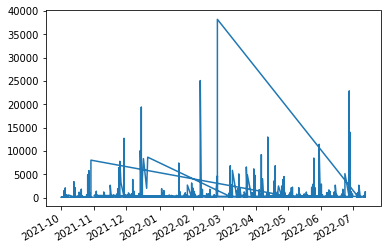

In [ ]:
x = pd.to_datetime(dataframe['data']).dt.date
y = dataframe['y']

plt.plot(x,y)
plt.gcf().autofmt_xdate()

plt.show()

In [ ]:
x.min()

datetime.date(2021, 10, 1)

In [ ]:
x.max()

datetime.date(2022, 7, 12)

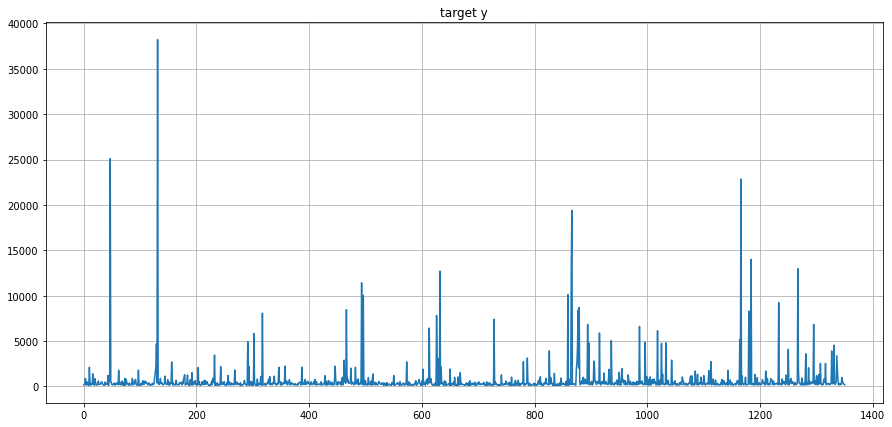

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(dataframe.y)
plt.title('target y')
plt.grid(True)
plt.show()

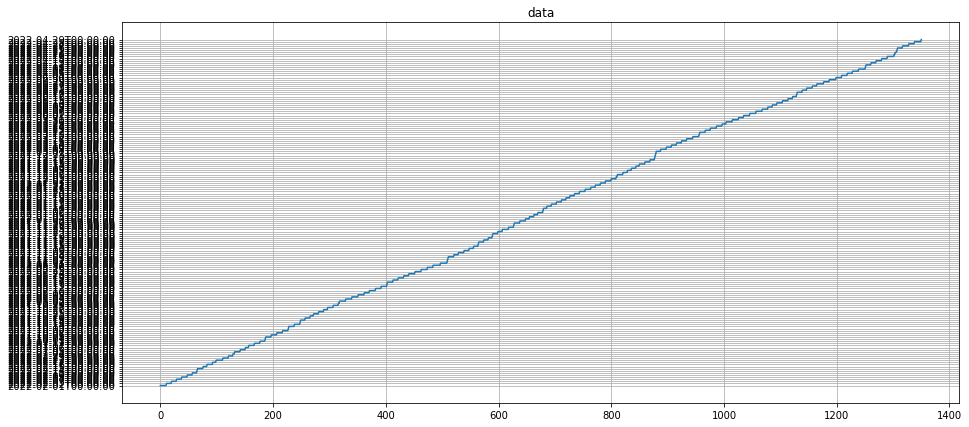

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(dataframe.data)
plt.title('data')
plt.grid(True)
plt.show()

In [ ]:
df_data = pd.read_csv('/content/drive/MyDrive/Projetos_ion/ion_productivity_forecast/datas/dataframe300.csv', index_col=['data'], parse_dates=['data'])
df_data.head()

Unnamed: 0             _id  codvendedor  vltotal  vltabela  \
data                                                                     
2022-02-01           0  203_2022-02-01          203      260       260   
2022-02-01           1  201_2022-02-01          201      367       359   
2022-02-01           2  303_2022-02-01          303      159       159   
2022-02-01           3  106_2022-02-01          106      238       227   
2022-02-01           4  302_2022-02-01          302      111       111   

            codigo01  codigo02 tipometa tipodados  vl_venda  qt_venda   peso  \
data                                                                           
2022-02-01       NaN       NaN       MR        DM         0       NaN  44.88   
2022-02-01    9964.0    4953.0       CF         A        39       6.0    NaN   
2022-02-01   10477.0    3522.0       CF         A        51      25.0  53.46   
2022-02-01       NaN       NaN       MR        DM         0       NaN  60.52   
2022-02-01    3363.0       NaN        P         A        24      24.0  96.08   

            pos_mix  pos_clientes  perc_lucratividade  vl_venda_transmitida  \
data                                                                          
2022-02-01      NaN           NaN            0.312858                  1361   
2022-02-01      1.0           1.0            0.279514                  2299   
2022-02-01      2.0           1.0            0.286859                  1721   
2022-02-01      NaN           NaN            0.326863                  3199   
2022-02-01      1.0           1.0            0.300388                  2121   

            vl_venda_faturada  vl_venda_tabela  vl_venda_custo  vl_devolucao  \
data                                                                           
2022-02-01                860             1353             935             0   
2022-02-01                  0             2273            1656             0   
2022-02-01               1247             1742            1227             0   
2022-02-01                922             3145            2153             0   
2022-02-01               1511             2121            1484             0   

            vl_comissao  vl_st  vl_ipi  vl_outros  vl_venda_nao_faturada  \
data                                                                       
2022-02-01            0      0       0          0                      0   
2022-02-01            0      0       0          0                      0   
2022-02-01            0      0       0          0                      0   
2022-02-01            0      0       0          0                      0   
2022-02-01            0      0       0          0                      0   

            vl_venda_bloqueada  clientes_positivados  \
data                                                   
2022-02-01                   0                   4.0   
2022-02-01                   0                   7.0   
2022-02-01                   0                   9.0   
2022-02-01                   0                  10.0   
2022-02-01                   0                  11.0   

            clientes_positivados_delta  total_pedidos  total_pedidos_prazo  \
data                                                                         
2022-02-01                         4.0           1361                20124   
2022-02-01                         7.0           2299                39589   
2022-02-01                         9.0           1721                19930   
2022-02-01                        10.0           3199                72714   
2022-02-01                        11.0           2121                10916   

            vl_venda_callcenter  vl_titulos_recebidos  vl_lucro  \
data                                                              
2022-02-01                    0                     0         0   
2022-02-01                    0                     0         0   
2022-02-01                    0                     0         0   
2022-02-0

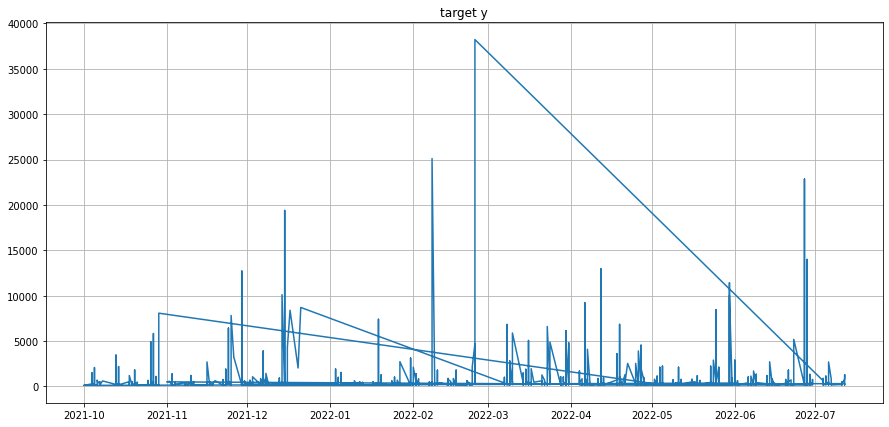

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(df_data.y)
plt.title('target y')
plt.grid(True)
plt.show()

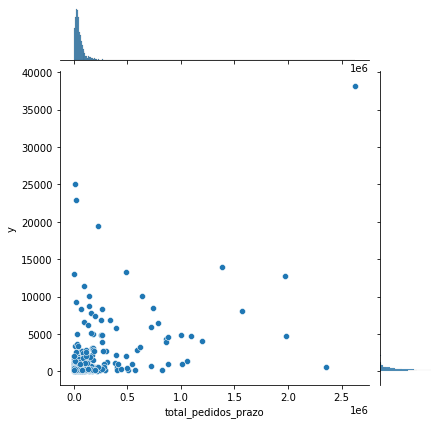

In [ ]:
#Qual a relação entre produtividade (y) e total_pedidos_prazo?

sns.jointplot(x='total_pedidos_prazo', y='y', data=dataframe)

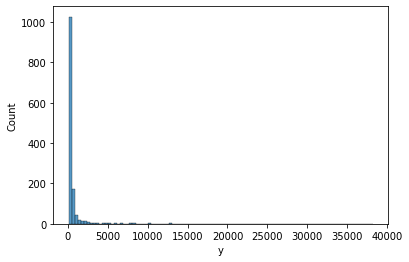

In [ ]:
sns.histplot(x='y', bins=100, data=dataframe)

In [ ]:
# Vendo o valor de venda (produtividade) do vendedor

dataframe.y.min(), dataframe.y.max()

(92, 38221)

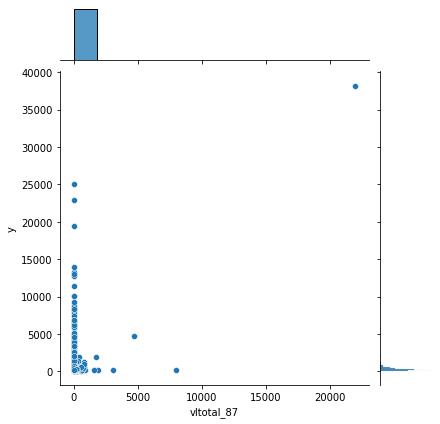

In [ ]:
#Qual a relação entre produtividade (y) e vltotal_87?

sns.jointplot(x='vltotal_87', y='y', data=dataframe)

The `size` parameter has been renamed to `height`; please update your code.


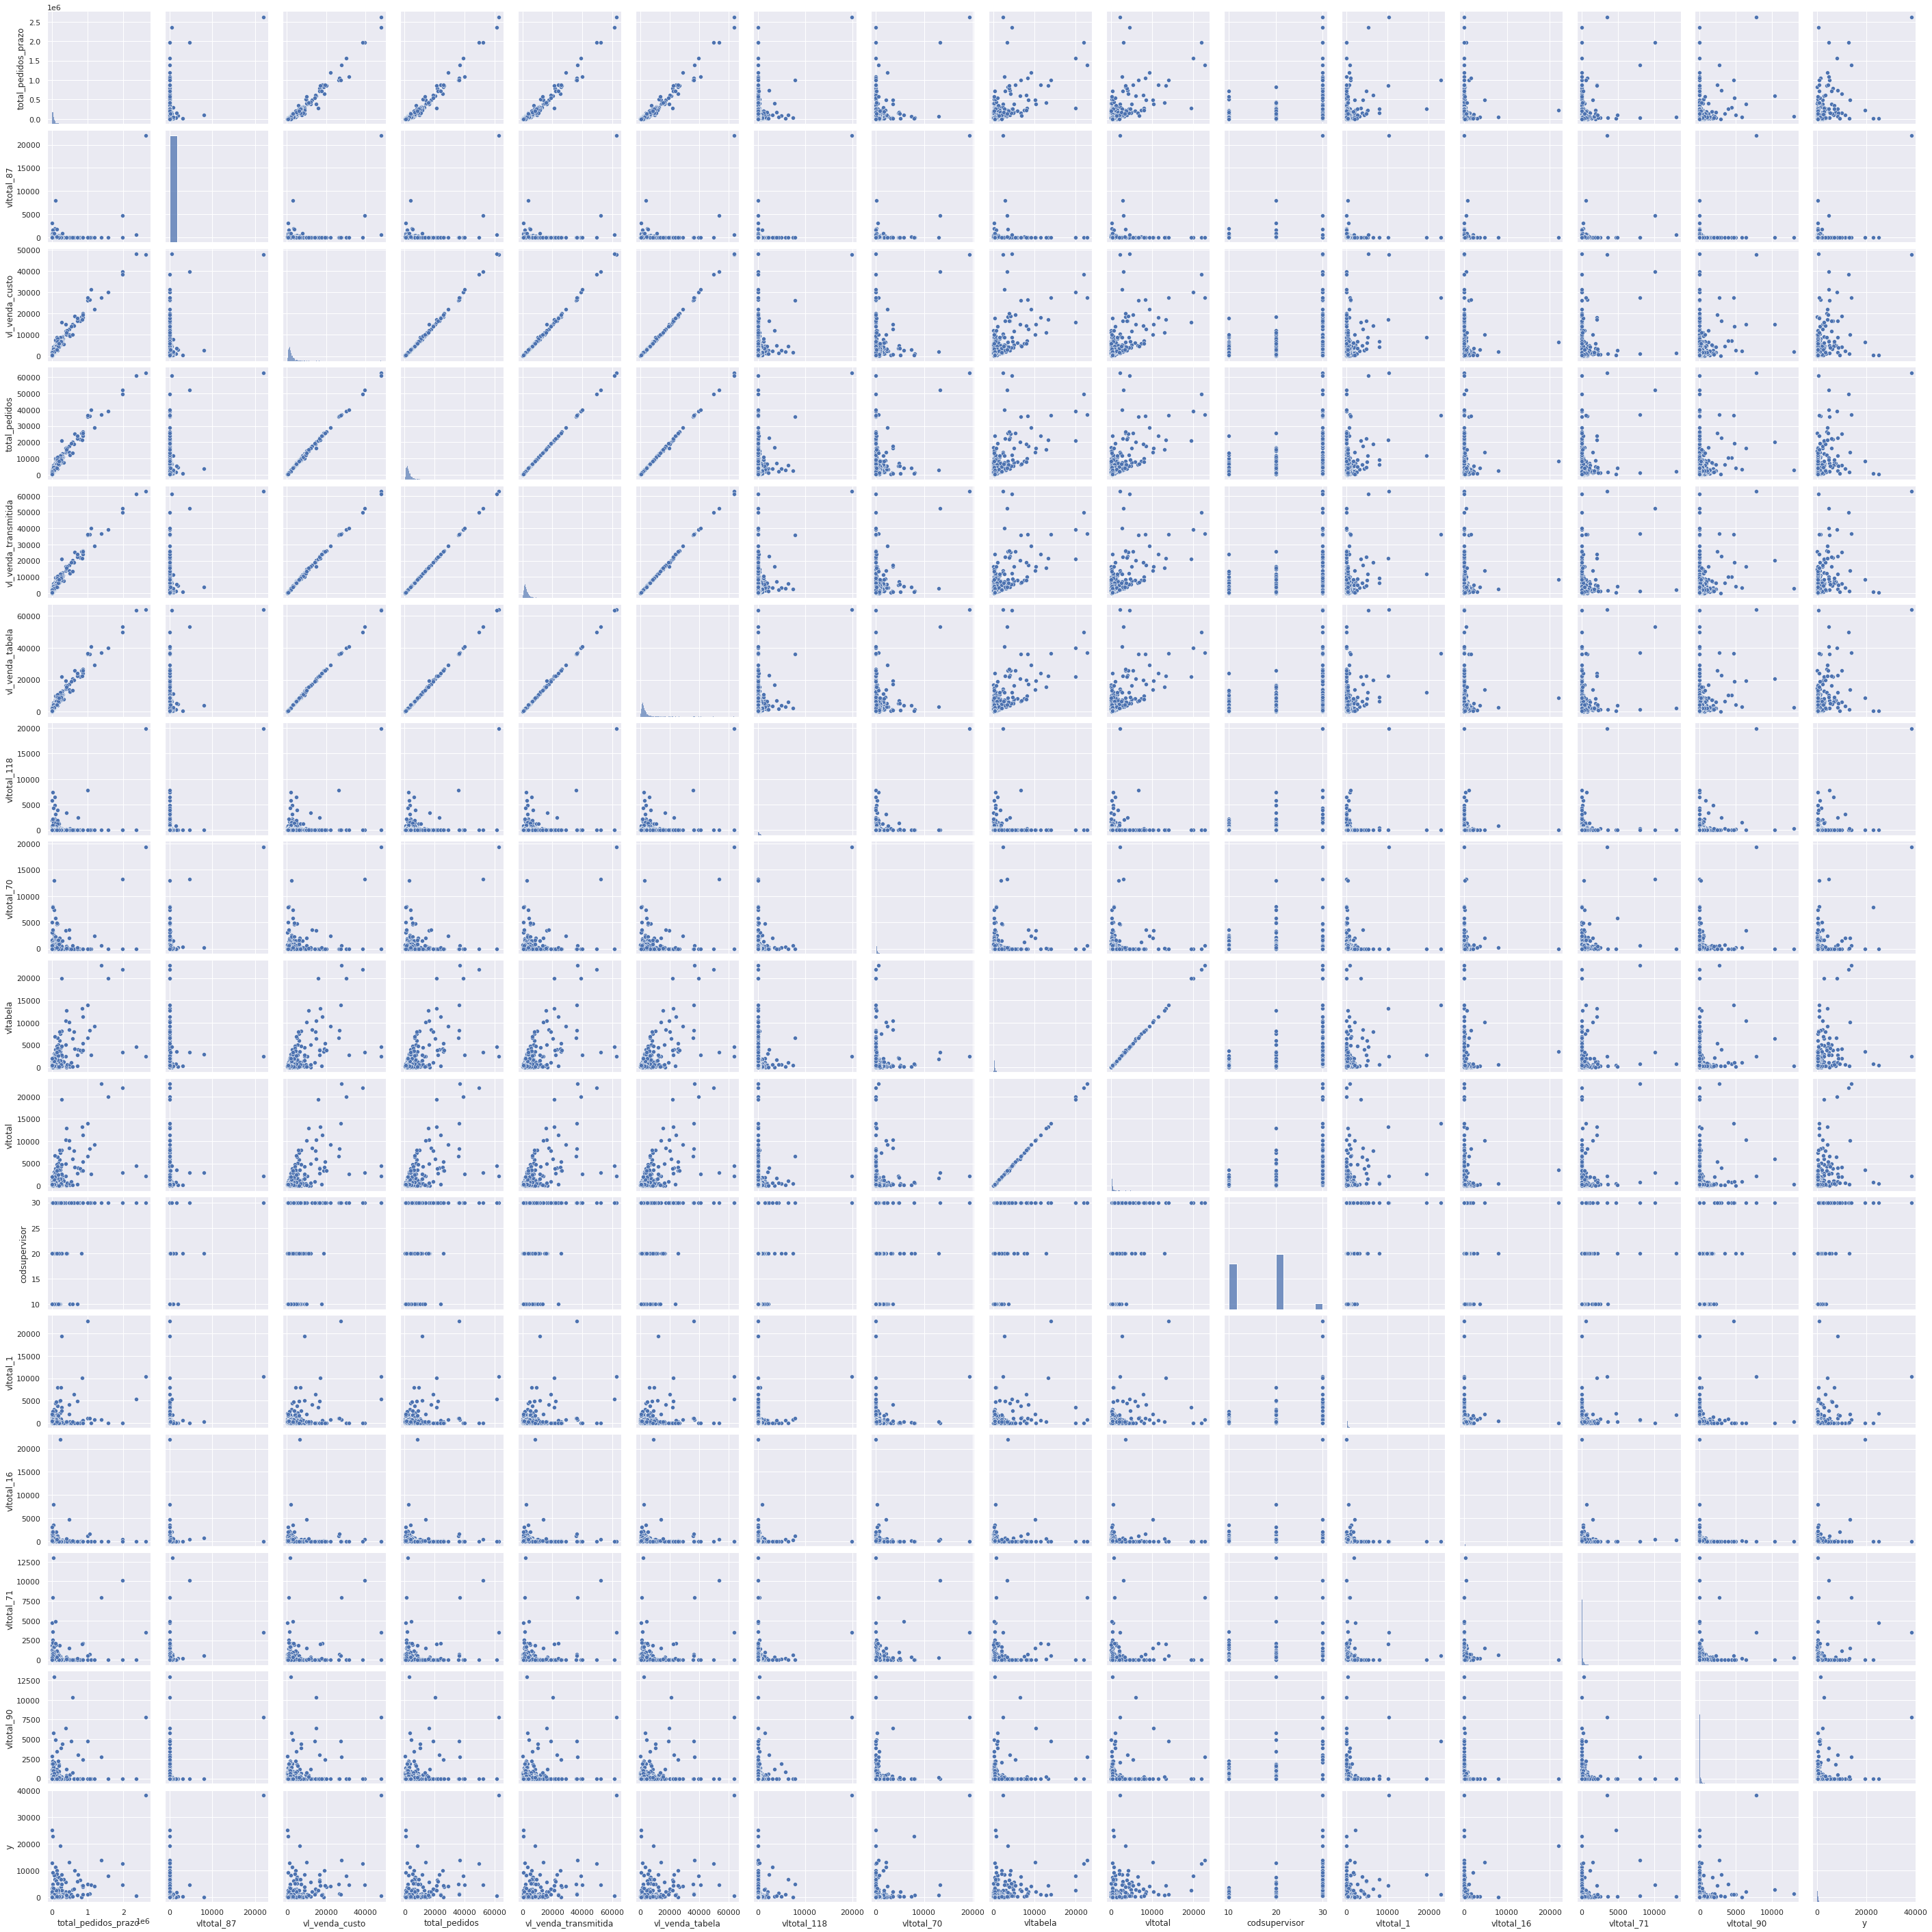

In [ ]:
#scatterplot para colunas selecionadas (em cols) de maior correlação com o target

sns.set()
cols = ['total_pedidos_prazo','vltotal_87','vl_venda_custo','total_pedidos',
'vl_venda_transmitida','vl_venda_tabela','vltotal_118','vltotal_70',
'vltabela','vltotal','codsupervisor','vltotal_1','vltotal_16','vltotal_71',
'vltotal_90','y']
sns.pairplot(dataframe[cols], size = 2.5)
plt.show();

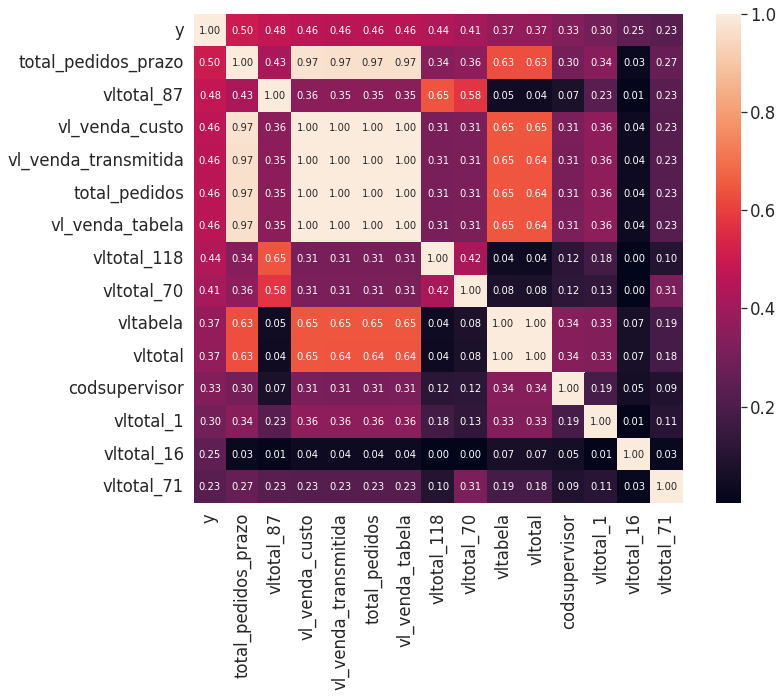

In [ ]:
# Matriz de correlação

corr_matrix = dataframe.corr()
k = 15 #número de variáveis pro heatmap
cols = corr_matrix.nlargest(k, 'y')['y'].index
cm = np.corrcoef(dataframe[cols].values.T)
sns.set(font_scale=1.5)
plt.subplots(figsize=(12,9))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', 
                 annot_kws={'size': 10
}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


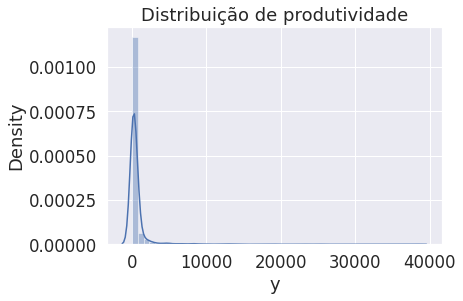

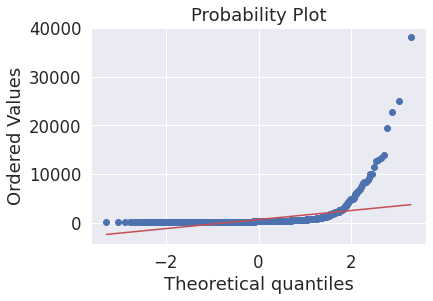

In [ ]:
#distribution plot- histogram
sns.distplot(dataframe['y']).set_title("Distribuição de produtividade")

# probability plot
fig = plt.figure()
res = stats.probplot(dataframe['y'], plot=plt)

Observamos que na distribuição de produtividade (vendas) não é simétrica. Além disso, no gráfico de probabilidade, os valores do target 'y' não segue uma tendência linear

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


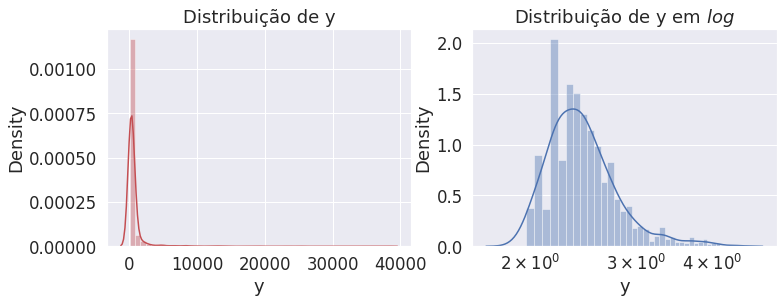

In [ ]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(dataframe['y'],bins=50,color='r',ax=ax)
ax.set_title('Distribuição de y')

ax=f.add_subplot(122)
sns.distplot(np.log10(dataframe['y']),bins=40,color='b',ax=ax)
ax.set_title('Distribuição de y em $log$')
ax.set_xscale('log');

## 2. Pré-processamento

In [ ]:
# Transforma o atributo 'data' no formato de datime

dataframe['data'] = pd.to_datetime(dataframe['data']).dt.date

In [ ]:
df = dataframe.sort_values(by=['data'])
df

Output hidden; open in https://colab.research.google.com to view.

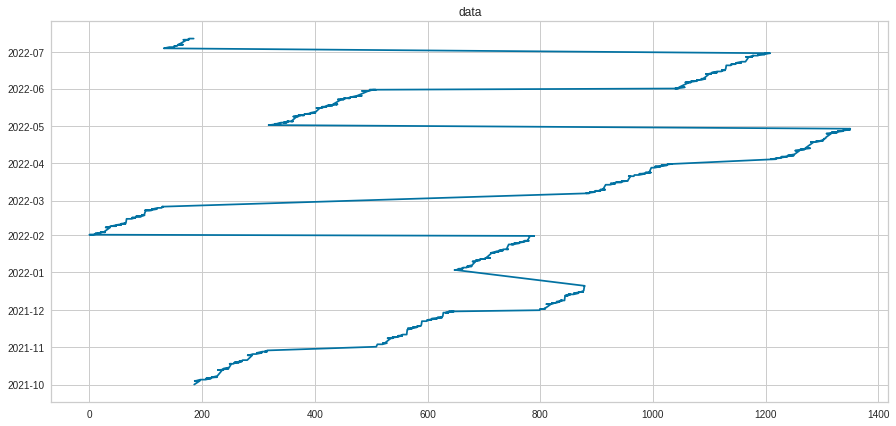

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(df.data)
plt.title('data')
plt.grid(True)
plt.show()

In [ ]:
# Remove colunas com dados nulos

# Identifica colunas que tem mais que 25% de dados nulos
null_cols = df.isna().sum() >= df.shape[0] * 0.25
cols_to_remove = null_cols[null_cols == True]
cols_to_remove = list(cols_to_remove.keys()[cols_to_remove])

# removing these columns
df = df.drop(cols_to_remove, axis=1)

In [ ]:
df.shape

(1351, 156)

In [ ]:
df.isnull().sum().sort_values(ascending = False)[:15]

clientes_positivados_delta    42
vltotal_73                     0
vltotal_66                     0
vltotal_67                     0
vltotal_68                     0
vltotal_69                     0
vltotal_70                     0
vltotal_71                     0
vltotal_72                     0
vltotal_74                     0
vltotal_64                     0
vltotal_75                     0
vltotal_76                     0
vltotal_77                     0
vltotal_78                     0
dtype: int64

In [ ]:
# Exclui linhas que tem valores nulos

df = df.dropna(axis=0)
df.shape

(1309, 156)

In [ ]:
df.head()

_id  codvendedor  vltotal  vltabela        data  vl_venda  \
186  205_2021-10-01          205        0        41  2021-10-01         0   
196  302_2021-10-04          302      570       582  2021-10-04         0   
195  201_2021-10-04          201      133       129  2021-10-04         0   
194  303_2021-10-04          303      102        98  2021-10-04         0   
193  208_2021-10-04          208     1263      1285  2021-10-04         0   

     perc_lucratividade  vl_venda_transmitida  vl_venda_faturada  \
186            0.285331                  3040                  0   
196            0.286292                  1260                  0   
195            0.319448                  1386                  0   
194            0.287021                  1210                  0   
193            0.300170                  3393                  0   

     vl_venda_tabela  vl_venda_custo  vl_devolucao  vl_comissao  vl_st  \
186             3055            2172             0            0      0   
196             1273             899             0            0      0   
195             1337             943             0            0      0   
194             1200             862             0            0      0   
193             3466            2375             0            0      0   

     vl_ipi  vl_outros  vl_venda_nao_faturada  vl_venda_bloqueada  \
186       0          0                      0                   0   
196       0          0                      0                   0   
195       0          0                      0                   0   
194       0          0                      0                   0   
193       0          0                      0                   0   

     clientes_positivados  clientes_positivados_delta  total_pedidos  \
186                  15.0                        15.0           3040   
196                   7.0                         3.0           1260   
195                  12.0                         7.0           1386   
194                  17.0                         7.0           1210   
193                  18.0                         9.0           3393   

     total_pedidos_prazo  vl_venda_callcenter  vl_titulos_recebidos  vl_lucro  \
186                49096                    0                     0         0   
196                27067                    0                     0         0   
195                19187                    0                     0         0   
194                16768                    0                     0         0   
193                76140                    0                     0         0   

     vl_venda_lucro  vl_comissao_venda  vl_vales  vl_venda_tabela_faturada  \
186               0                  0         0                         0   
196               0                  0         0                         0   
195               0                  0         0                         0   
194               0                  0         0                         0   
193               0                  0         0                         0   

     codcidade  codsupervisor  codcliprinc  uf  codibge    y  vltotal_1  \
186      10576             20         2271  RS  4319406  110          0   
196      10196             20         6639  RS  4301602  251          0   
195      10578             20         8420  RS  4319604  491          0   
194      10196             20         2245  RS  4301602  211          0   
193      10443             20         2064  RS  4313037  145          0   

     vltotal_2  vltotal_3  vltotal_4  vltotal_5  vltotal_6  vltotal_7  \
186        125        397        155          0          0          0   
196          0          0       1500        119        174        150   
195          0          0        208          0          0          0   
194          0          0        136        139        108          0   
193          0          0          0        103        209        204   

     

In [ ]:
df_dataa = df.set_index(['data'])
df_dataa.head()

_id  codvendedor  vltotal  vltabela  vl_venda  \
data                                                                   
2021-10-01  205_2021-10-01          205        0        41         0   
2021-10-04  302_2021-10-04          302      570       582         0   
2021-10-04  201_2021-10-04          201      133       129         0   
2021-10-04  303_2021-10-04          303      102        98         0   
2021-10-04  208_2021-10-04          208     1263      1285         0   

            perc_lucratividade  vl_venda_transmitida  vl_venda_faturada  \
data                                                                      
2021-10-01            0.285331                  3040                  0   
2021-10-04            0.286292                  1260                  0   
2021-10-04            0.319448                  1386                  0   
2021-10-04            0.287021                  1210                  0   
2021-10-04            0.300170                  3393                  0   

            vl_venda_tabela  vl_venda_custo  vl_devolucao  vl_comissao  vl_st  \
data                                                                            
2021-10-01             3055            2172             0            0      0   
2021-10-04             1273             899             0            0      0   
2021-10-04             1337             943             0            0      0   
2021-10-04             1200             862             0            0      0   
2021-10-04             3466            2375             0            0      0   

            vl_ipi  vl_outros  vl_venda_nao_faturada  vl_venda_bloqueada  \
data                                                                       
2021-10-01       0          0                      0                   0   
2021-10-04       0          0                      0                   0   
2021-10-04       0          0                      0                   0   
2021-10-04       0          0                      0                   0   
2021-10-04       0          0                      0                   0   

            clientes_positivados  clientes_positivados_delta  total_pedidos  \
data                                                                          
2021-10-01                  15.0                        15.0           3040   
2021-10-04                   7.0                         3.0           1260   
2021-10-04                  12.0                         7.0           1386   
2021-10-04                  17.0                         7.0           1210   
2021-10-04                  18.0                         9.0           3393   

            total_pedidos_prazo  vl_venda_callcenter  vl_titulos_recebidos  \
data                                                                         
2021-10-01                49096                    0                     0   
2021-10-04                27067                    0                     0   
2021-10-04                19187                    0                     0   
2021-10-04                16768                    0                     0   
2021-10-04                76140                    0                     0   

            vl_lucro  vl_venda_lucro  vl_comissao_venda  vl_vales  \
data                                                                
2021-10-01         0               0                  0         0   
2021-10-04         0               0                  0         0   
2021-10-04         0               0                  0         0   
2021-10-04         0               0                  0         0   
2021-10-04         0               0                  0         0   

            vl_venda_tabela_faturada  codcidade  codsupervisor  codcliprinc  \
data                                                                          
2021-10-01                         0      10576             20         2271   
2021-10-04                         0      10196             20       

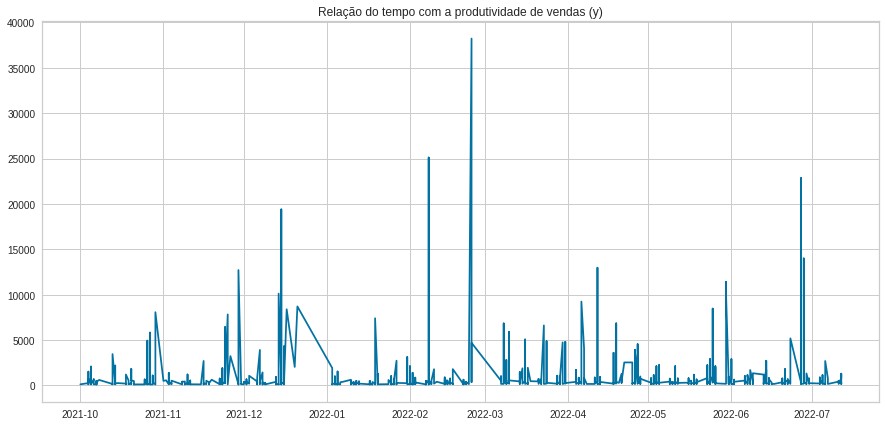

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(df_dataa.y)
plt.title('Relação do tempo com a produtividade de vendas (y)')
plt.grid(True)
plt.show()

### Separa treino e teste

In [ ]:
X = df[df.columns.difference(['y','_id','tipometa','tipodados','uf'])]
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, shuffle=False, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((981, 153), (328, 153), (981,), (328,))

## Modelo Baseline

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# R2 para Regressão Linear

regressor.score(X_train, y_train)

0.8347927099479253

In [ ]:
regressor.score(X_test, y_test)

-0.729719495973203

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

In [ ]:
regressor.coef_

Text(0, 0.5, 'y predito')

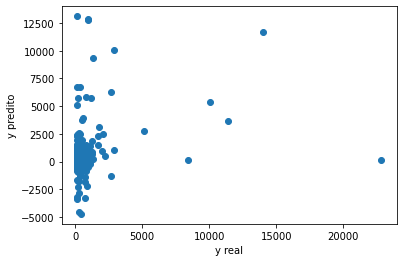

In [ ]:
#  Diagrama de dispersão (scatterplot) dos valores reais de teste em relação aos valores preditos.

plt.scatter(y_test, y_pred)
plt.xlabel('y real')
plt.ylabel('y predito')

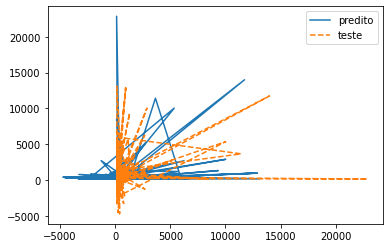

In [ ]:
plt.plot(y_pred,y_test, label = "predito") 
plt.plot(y_test,y_pred, label = "teste", linestyle="--") 
plt.legend() 
plt.show()

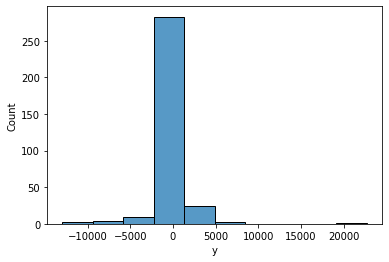

In [ ]:
absolute_error = y_test - y_pred

sns.histplot(absolute_error, bins=10)

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


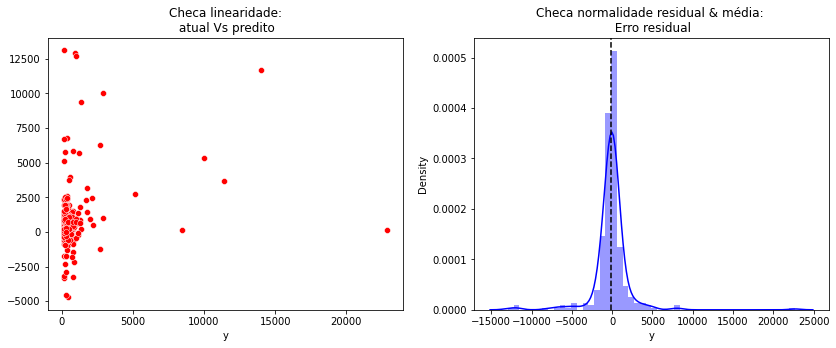

In [ ]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,y_pred,ax=ax,color='r')
ax.set_title('Checa linearidade:\n atual Vs predito')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y_test - y_pred),ax=ax,color='b')
ax.axvline((y_test - y_pred).mean(),color='k',linestyle='--')
ax.set_title('Checa normalidade residual & média: \n Erro residual');

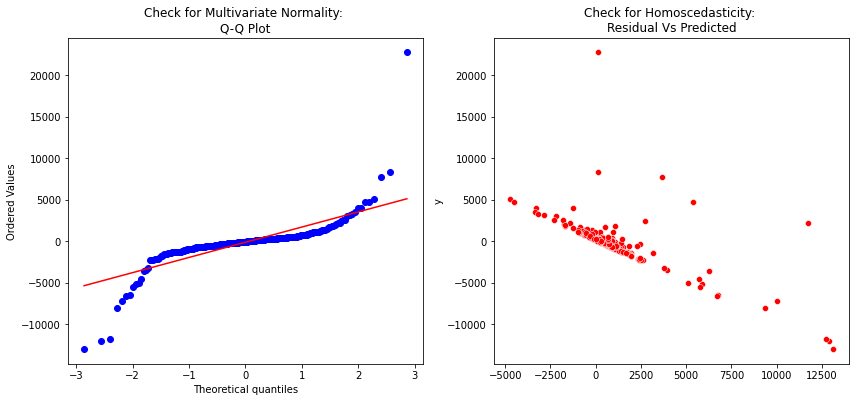

In [ ]:
# Check para normalidade multivariada

f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred),fit=True,plot=ax[0])
ax[0].set_title('Check para normalidade multivariada: \nQ-Q Plot')

#Check for Homoscedasticity
"""
Os dados são homocedásticos, o que significa que os resíduos são iguais 
ao longo da linha de regressão.
Podemos olhar para o gráfico de dispersão de valor ajustado Vs residual.
Se o gráfico heterocedástico exibiria um padrão de forma de funil.
"""
sns.scatterplot(y = (y_test - y_pred), x= y_pred, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R:', metrics.r2_score(y_test,y_pred))

MAE: 1085.2318608879443
MSE: 5437033.777561876
RMSE: 2331.7447925452466
R: -0.729719495973203


In [ ]:
# R_square 
sse = np.sum((y_pred- y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_square = 1 - (sse/sst)
print(R_square)

-0.729719495973203


In [ ]:
explainer = shap.Explainer(regressor.predict, X_test)
shap_values = explainer(X_test)

Permutation explainer: 329it [00:16,  8.57it/s]


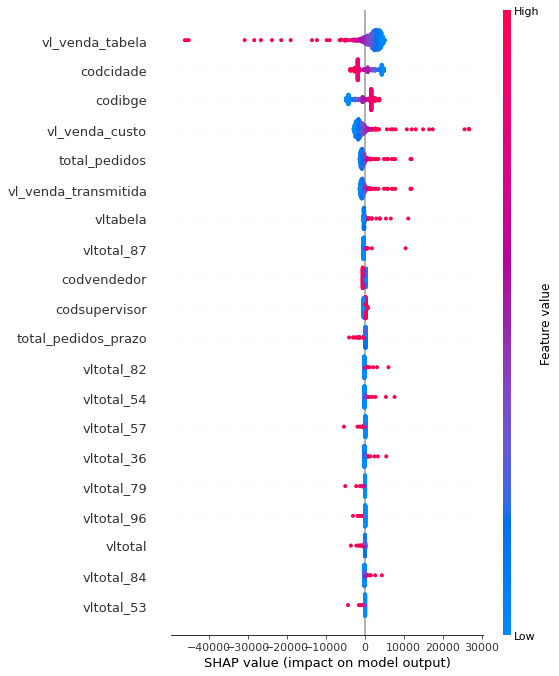

In [ ]:
shap.summary_plot(shap_values)

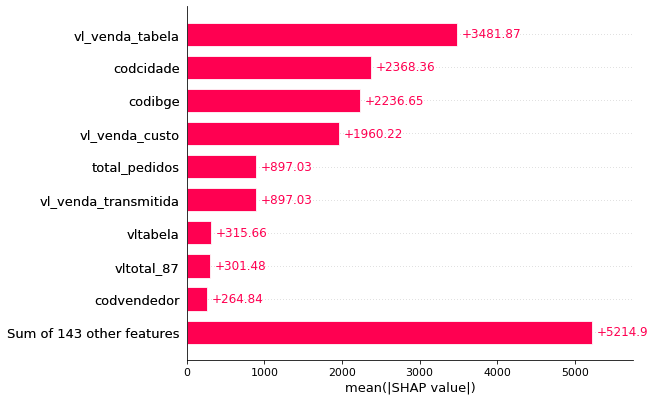

In [ ]:
shap.plots.bar(shap_values)

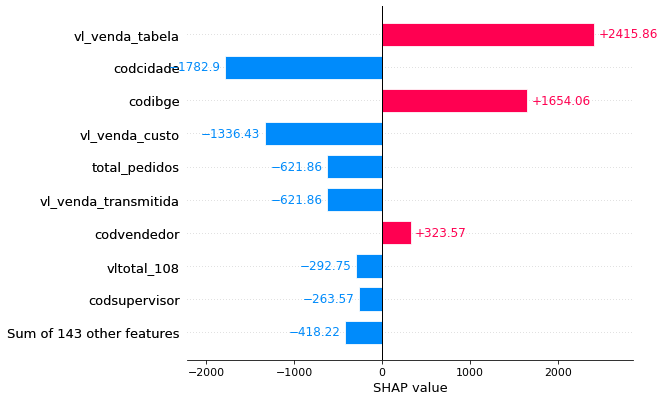

In [ ]:
shap.plots.bar(shap_values[0])

### **Regressão Linear para 1 vendedor**

In [ ]:
#Pegando somente o vendedor 303

df_303 = dataframe[dataframe['codvendedor'] == 303]
df_303.head()

_id  codvendedor  vltotal  vltabela  codigo01  codigo02  \
2   303_2022-02-01          303      159       159   10477.0    3522.0   
19  303_2022-02-02          303      276       280   10034.0    4599.0   
23  303_2022-02-03          303      109       108    2993.0    4599.0   
30  303_2022-02-07          303      353       354    2847.0       NaN   
44  303_2022-02-08          303      275       280    3276.0       NaN   

                   data tipometa tipodados  vl_venda  ...  vltotal_112  \
2   2022-02-01T00:00:00       CF         A        51  ...            0   
19  2022-02-02T00:00:00       CF         A       110  ...          100   
23  2022-02-03T00:00:00       CF         A        22  ...          416   
30  2022-02-07T00:00:00        P         A        21  ...          315   
44  2022-02-08T00:00:00        P         A        21  ...          122   

    vltotal_113  vltotal_114  vltotal_115  vltotal_116  vltotal_117  \
2             0            0            0            0          201   
19            0            0            0            0            0   
23          100            0            0            0            0   
30            0            0            0          416          100   
44          315            0            0            0          416   

    vltotal_118  vltotal_119  vltotal_120  vltotal_121  
2           242          211          102            0  
19          201          242          211          102  
23            0          201          242          211  
30            0            0            0            0  
44          100            0            0            0  

[5 rows x 166 columns]

In [ ]:
df_303 = df_303.sort_values(by=['data'])

In [ ]:
df_303['data'] = pd.to_datetime(df_303['data'])

In [ ]:
X = df_303[['total_pedidos']]
y = df_303['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, shuffle=False, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((99, 1), (34, 1), (99,), (34,))

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# R2 para Regressão Linear

regressor.score(X_train, y_train)

0.00011546171352505574

In [ ]:
regressor.score(X_test, y_test)

-0.0015977797657247272

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([252.56830153, 250.89117229, 252.01419699, 251.84233569,
       252.27495207, 251.05414421, 251.48379746, 249.8511151 ,
       250.34003087, 251.75936817, 256.71075151, 249.40368309,
       253.57280121, 252.03493887, 251.02747608, 252.23050518,
       253.06314355, 252.86757725, 250.71634786, 253.35945614,
       256.15368385, 249.96371389, 253.61132184, 249.71184819,
       254.07949573, 252.5297809 , 250.28373148, 256.74927215,
       250.15335394, 251.50157622, 250.30151024, 254.11505324,
       253.28834112, 255.58476368])

In [ ]:
regressor.coef_

array([-0.00296313])

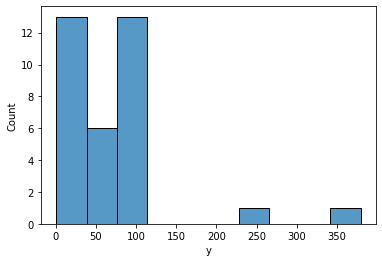

In [ ]:
absolute_error = abs(y_test - y_pred)

sns.histplot(absolute_error, bins=10)

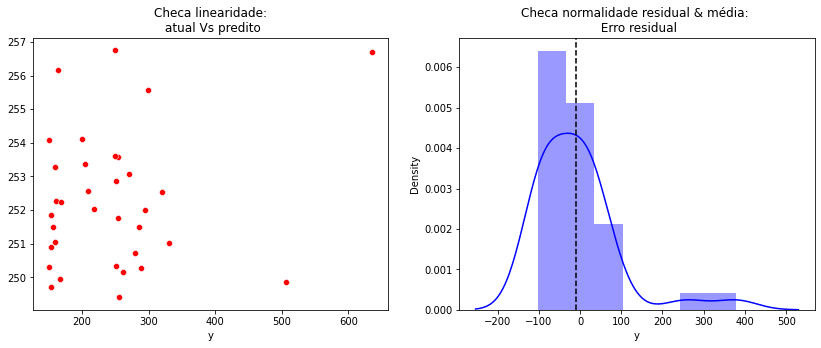

In [ ]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,y_pred,ax=ax,color='r')
ax.set_title('Checa linearidade:\n atual Vs predito')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y_test - y_pred),ax=ax,color='b')
ax.axvline((y_test - y_pred).mean(),color='k',linestyle='--')
ax.set_title('Checa normalidade residual & média: \n Erro residual');

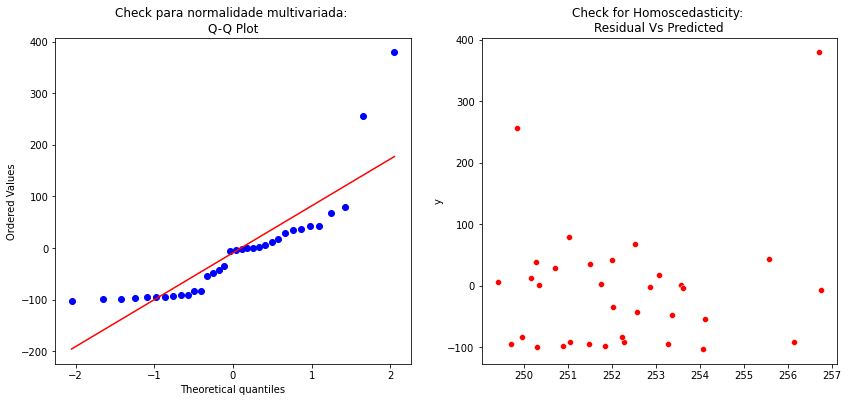

In [ ]:
# Check para normalidade multivariada

f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred),fit=True,plot=ax[0])
ax[0].set_title('Check para normalidade multivariada: \nQ-Q Plot')

#Check for Homoscedasticity
"""
Os dados são homocedásticos, o que significa que os resíduos são iguais 
ao longo da linha de regressão.
Podemos olhar para o gráfico de dispersão de valor ajustado Vs residual.
Se o gráfico heterocedástico exibiria um padrão de forma de funil.
"""
sns.scatterplot(y = (y_test - y_pred), x= y_pred, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R:', metrics.r2_score(y_test,y_pred))

MAE: 68.41380294956335
MSE: 10069.176849281483
RMSE: 100.34528812695433
R: -0.0015977797657247272


In [ ]:
# R_square 
sse = np.sum((y_pred- y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_square = 1 - (sse/sst)
print(R_square)

-0.04487631123210689


In [ ]:
import pickle
 
# Save the trained model as a pickle string.
saved_model = pickle.dumps(regressor)
 
# Load the pickled model
regre_from_pickle = pickle.loads(saved_model)

**Testando outro vendedor**

In [ ]:
dataframe['codvendedor'].value_counts()

303    133
302    133
102    130
106    129
101    124
209    123
203    121
208    112
205    103
201     91
109     49
207     47
104     30
103     26
Name: codvendedor, dtype: int64

In [ ]:
#Pegando somente o vendedor 302

df_302 = dataframe[dataframe['codvendedor'] == 302]
df_302.head()

Unnamed: 0             _id  codvendedor  vltotal  vltabela  codigo01  \
4            4  302_2022-02-01          302      111       111    3363.0   
16          16  302_2022-02-02          302      142       142       NaN   
24          24  302_2022-02-03          302     1385      1388   10629.0   
33          33  302_2022-02-07          302      481       465    8741.0   
49          49  302_2022-02-09          302        0        20    3136.0   

    codigo02                 data tipometa tipodados  vl_venda  qt_venda  \
4        NaN  2022-02-01T00:00:00        P         A        24      24.0   
16       NaN  2022-02-02T00:00:00       MR         A      1600     461.0   
24    3662.0  2022-02-03T00:00:00       CF         A        62      30.0   
33    3212.0  2022-02-07T00:00:00       CF         A       170      92.0   
49       NaN  2022-02-09T00:00:00        P         A        28      20.0   

      peso  pos_mix  pos_clientes  perc_lucratividade  vl_venda_transmitida  \
4   96.080      1.0           1.0            0.300388                  2121   
16   4.214     33.0           2.0            0.279736                  1600   
24   5.040      3.0           1.0            0.308098                  8568   
33     NaN      8.0           1.0            0.300047                  4949   
49     NaN      NaN           1.0            0.282029                 16590   

    vl_venda_faturada  vl_venda_tabela  vl_venda_custo  vl_devolucao  \
4                1511             2121            1484             0   
16                609             1603            1152           356   
24                130             8415            5928             0   
33                  0             4981            3464             0   
49                  0            16705           11911             0   

    vl_comissao  vl_st  vl_ipi  vl_outros  vl_venda_nao_faturada  \
4             0      0       0          0                      0   
16            0      0       0          0                      0   
24            0      0       0          0                      0   
33            0      0       0          0                      0   
49            0      0       0          0                      0   

    vl_venda_bloqueada  clientes_positivados  clientes_positivados_delta  \
4                    0                  11.0                        11.0   
16                   0                  13.0                         2.0   
24                   0                  19.0                         6.0   
33                   0                  39.0                         6.0   
49                   0                  60.0                        13.0   

    total_pedidos  total_pedidos_prazo  vl_venda_callcenter  \
4            2121                10916                    0   
16           1600                40828                    0   
24           8568               227359                    0   
33           4949                97527                    0   
49          16590               405609                    0   

    vl_titulos_recebidos  vl_lucro  vl_venda_lucro  vl_comissao_venda  \
4                      0         0               0                  0   
16                     0         0               0                  0   
24                     0         0               0                  0   
33                     0         0               0                  0   
49                     0         0               0                  0   

    vl_vales  vl_venda_tabela_faturada  codbairro  codcidade  codpais  \
4          0                         0        NaN      10196      NaN   
16         0                         0        NaN      10167      NaN   
24         0                         0        NaN      10167      NaN   
33         0                         0        NaN      10196      NaN   
49         0                         0        NaN      10243      NaN   

    codsupervisor  codcliprinc  uf  codibge     y  vltotal_

In [ ]:
df_302 = df_302.sort_values(by=['data'])

In [ ]:
df_302['data'] = pd.to_datetime(df_302['data'])

In [ ]:
X_302 = df_303[['total_pedidos']]
y_302 = df_303['y']

In [ ]:
# Use the loaded pickled model to make predictions
predic_302 = regre_from_pickle.predict(X_302)

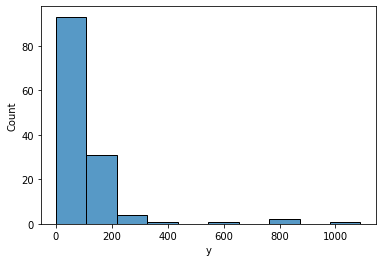

In [ ]:
absolute_error = abs(predic_302 - y_302)

sns.histplot(absolute_error, bins=10)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_302, predic_302))
print('MSE:', metrics.mean_squared_error(y_302, predic_302))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_302, predic_302)))
print('R:', metrics.r2_score(y_302, predic_302))

MAE: 107.55341324414589
MSE: 32096.537673986502
RMSE: 179.15506600145724
R: 0.0005218343409029158


### **Regressão Linear com o valor y anterior**

In [ ]:
df_303y = df_303[['data','y', 'vltotal_1','vltotal']]
df_303y = df_303y.sort_values(by=['data'])
df_303y.index = pd.Index(range(133))

In [ ]:
df_303y

data     y  vltotal_1  vltotal
0    2021-10-04T00:00:00   211          0      102
1    2021-10-05T00:00:00   242        102      211
2    2021-10-06T00:00:00   201        211      242
3    2021-10-07T00:00:00   187        242      201
4    2021-10-13T00:00:00   416          0      100
5    2021-10-14T00:00:00   203        100      416
6    2021-10-18T00:00:00   122          0      315
7    2021-10-19T00:00:00   232        315      122
8    2021-10-21T00:00:00   103          0        0
9    2021-10-25T00:00:00   161          0      127
10   2021-10-26T00:00:00   105        127      161
11   2021-10-27T00:00:00   121        161      105
12   2021-10-28T00:00:00   211        105      121
13   2021-11-03T00:00:00   206          0      102
14   2021-11-04T00:00:00   260        102      206
15   2021-11-08T00:00:00   200          0      182
16   2021-11-09T00:00:00   111        182      200
17   2021-11-10T00:00:00   118        200      111
18   2021-11-11T00:00:00   305        111      118
19   2021-11-16T00:00:00   104          0      201
20   2021-11-17T00:00:00   135        201      104
21   2021-11-18T00:00:00   345        104      135
22   2021-11-22T00:00:00   166          0      296
23   2021-11-23T00:00:00   107        296      166
24   2021-11-24T00:00:00   222        166      107
25   2021-11-25T00:00:00   105        107      222
26   2021-11-29T00:00:00   100          0      121
27   2021-11-30T00:00:00   232        121      100
28   2021-12-01T00:00:00   162        100      232
29   2021-12-02T00:00:00   107        232      162
30   2021-12-06T00:00:00   420          0      305
31   2021-12-07T00:00:00   256        305      420
32   2021-12-08T00:00:00   100        420      256
33   2021-12-09T00:00:00   121        256      100
34   2021-12-13T00:00:00   100          0      105
35   2021-12-14T00:00:00   221        105      100
36   2021-12-15T00:00:00   201        100      221
37   2021-12-16T00:00:00   107        221      201
38   2022-01-03T00:00:00   302          0      111
39   2022-01-04T00:00:00   221        111      302
40   2022-01-05T00:00:00  1033        302      221
41   2022-01-06T00:00:00   340        221     1033
42   2022-01-10T00:00:00   107          0      204
43   2022-01-11T00:00:00   107        204      107
44   2022-01-12T00:00:00   496        107      107
45   2022-01-13T00:00:00   290        107      496
46   2022-01-17T00:00:00   120          0      164
47   2022-01-18T00:00:00   110        164      120
48   2022-01-20T00:00:00   248          0        0
49   2022-01-24T00:00:00   206          0      108
50   2022-01-25T00:00:00   257        108      206
51   2022-01-26T00:00:00   112        206      257
52   2022-01-27T00:00:00   105        257      112
53   2022-01-31T00:00:00   159          0      111
54   2022-02-01T00:00:00   276        111      159
55   2022-02-02T00:00:00   109        159      276
56   2022-02-03T00:00:00   150        276      109
57   2022-02-07T00:00:00   275          0      353
58   2022-02-08T00:00:00   101        353      275
59   2022-02-09T00:00:00   157        275      101
60   2022-02-10T00:00:00   329        101      157
61   2022-02-14T00:00:00   144          0      116
62   2022-02-15T00:00:00   363        116      144
63   2022-02-16T00:00:00   226        144      363
64   2022-02-21T00:00:00   114          0      206
65   2022-02-22T00:00:00   367        206      114
66   2022-03-07T00:00:00   269          0      398
67   2022-03-08T00:00:00   278        398      269
68   2022-03-09T00:00:00   155        269      278
69   2022-03-10T00:00:00   253        278      155
70   2022-03-14T00:00:00   519          0      503
71   2022-03-15T00:00:00   286        503      519
72   2022-03-16T00:00:00   419        519      286
73   2022-03-17T00:00:00   155        286      419
74   2022-03-21T00:00:00   161          0      158
75   2022-03-22T00:00:00   289        158      161
76   2022-03-28T00:00:00  1063          0      156
77   2022-03-29T00:00:00   303        156 

In [ ]:
X = df_303y[['vltotal_1']]
y = df_303y['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, shuffle=False, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((99, 1), (34, 1), (99,), (34,))

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# R2 para Regressão Linear

regressor.score(X_train, y_train)

0.002888853121573276

In [ ]:
regressor.score(X_test, y_test)

-0.008004696248526733

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([252.37427821, 263.71472043, 242.99317942, 255.52110249,
       260.44914806, 242.99317942, 259.08354507, 252.43365226,
       252.25553013, 242.99317942, 256.47108718, 258.07418634,
       280.75507077, 242.99317942, 261.04288849, 255.93672079,
       262.58661361, 242.99317942, 242.99317942, 257.89606421,
       259.61791146, 242.99317942, 259.91478168, 252.9086446 ,
       242.99317942, 257.89606421, 251.95865991, 261.99287318,
       242.99317942, 253.14614077, 258.54917869, 259.97415572,
       242.99317942, 266.32717832])

In [ ]:
regressor.coef_

array([0.05937404])

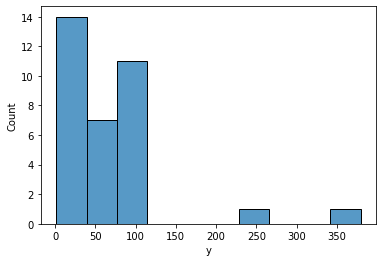

In [ ]:
absolute_error = abs(y_test - y_pred)

sns.histplot(absolute_error, bins=10)

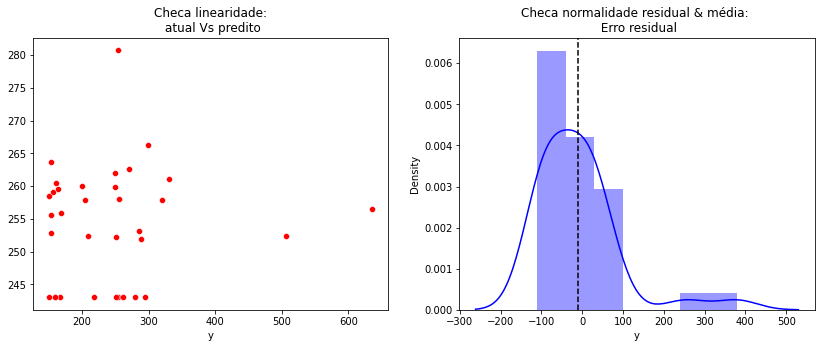

In [ ]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,y_pred,ax=ax,color='r')
ax.set_title('Checa linearidade:\n atual Vs predito')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y_test - y_pred),ax=ax,color='b')
ax.axvline((y_test - y_pred).mean(),color='k',linestyle='--')
ax.set_title('Checa normalidade residual & média: \n Erro residual');

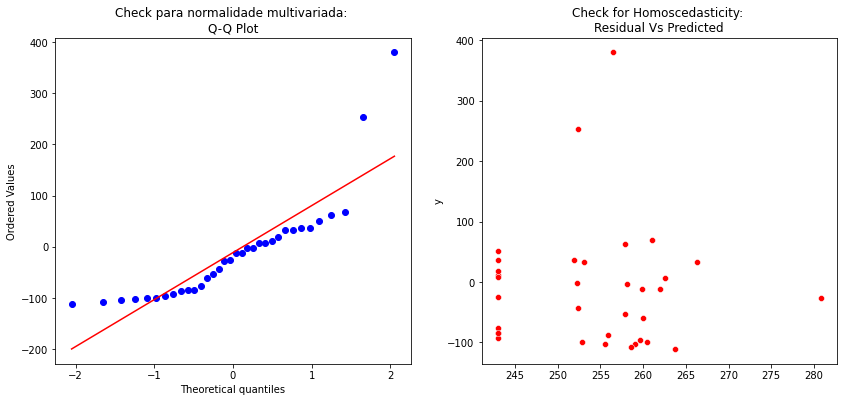

In [ ]:
# Check para normalidade multivariada

f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred),fit=True,plot=ax[0])
ax[0].set_title('Check para normalidade multivariada: \nQ-Q Plot')

#Check for Homoscedasticity
"""
Os dados são homocedásticos, o que significa que os resíduos são iguais 
ao longo da linha de regressão.
Podemos olhar para o gráfico de dispersão de valor ajustado Vs residual.
Se o gráfico heterocedástico exibiria um padrão de forma de funil.
"""
sns.scatterplot(y = (y_test - y_pred), x= y_pred, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R:', metrics.r2_score(y_test,y_pred))
print('MAPE', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('Accuracy:', abs(1-(metrics.mean_absolute_percentage_error(y_test, y_pred)))*100)

MAE: 68.99253383030135
MSE: 10395.521118424975
RMSE: 101.95842838345918
R: -0.0071679176250432075
MAPE 0.3091864675225539
Accuracy: 69.0813532477446


#### **Criando janela do dia anterior:**

In [ ]:
y=df_303y['y']

In [ ]:
# Define uma janela de 1 elemento
window = 1

In [ ]:
# Obtem os 3 primeiros valores da serie
history = [y.values[i] for i in range(window)]

In [ ]:
# imprime a variável history
history

[211]

In [ ]:
# Obtem todos os valores após os tres primeiros.
# range(3, tamanho_da_serie)

test = [y.values[i] for i in range(window, len(y.values))]

In [ ]:
# serie original
y.values

array([ 211,  242,  201,  187,  416,  203,  122,  232,  103,  161,  105,
        121,  211,  206,  260,  200,  111,  118,  305,  104,  135,  345,
        166,  107,  222,  105,  100,  232,  162,  107,  420,  256,  100,
        121,  100,  221,  201,  107,  302,  221, 1033,  340,  107,  107,
        496,  290,  120,  110,  248,  206,  257,  112,  105,  159,  276,
        109,  150,  275,  101,  157,  329,  144,  363,  226,  114,  367,
        269,  278,  155,  253,  519,  286,  419,  155,  161,  289, 1063,
        303,  158,  247,  305,  842,  181,  555,  153,  383,  159,  184,
        351,  178,  220, 1345,  155,  263,  347,  150,  328,  158,  349,
        209,  153,  294,  153,  161,  159,  156,  506,  251,  254,  636,
        255,  254,  218,  330,  169,  270,  251,  280,  205,  164,  167,
        249,  154,  151,  320,  288,  250,  262,  286,  151,  200,  159,
        299])

In [ ]:
df_reg = pd.DataFrame({'y_':y.iloc[:132] ,
                   'y1':test})
df_reg

y_    y1
0     211   242
1     242   201
2     201   187
3     187   416
4     416   203
5     203   122
6     122   232
7     232   103
8     103   161
9     161   105
10    105   121
11    121   211
12    211   206
13    206   260
14    260   200
15    200   111
16    111   118
17    118   305
18    305   104
19    104   135
20    135   345
21    345   166
22    166   107
23    107   222
24    222   105
25    105   100
26    100   232
27    232   162
28    162   107
29    107   420
30    420   256
31    256   100
32    100   121
33    121   100
34    100   221
35    221   201
36    201   107
37    107   302
38    302   221
39    221  1033
40   1033   340
41    340   107
42    107   107
43    107   496
44    496   290
45    290   120
46    120   110
47    110   248
48    248   206
49    206   257
50    257   112
51    112   105
52    105   159
53    159   276
54    276   109
55    109   150
56    150   275
57    275   101
58    101   157
59    157   329
60    329   144
61    144   363
62    363   226
63    226   114
64    114   367
65    367   269
66    269   278
67    278   155
68    155   253
69    253   519
70    519   286
71    286   419
72    419   155
73    155   161
74    161   289
75    289  1063
76   1063   303
77    303   158
78    158   247
79    247   305
80    305   842
81    842   181
82    181   555
83    555   153
84    153   383
85    383   159
86    159   184
87    184   351
88    351   178
89    178   220
90    220  1345
91   1345   155
92    155   263
93    263   347
94    347   150
95    150   328
96    328   158
97    158   349
98    349   209
99    209   153
100   153   294
101   294   153
102   153   161
103   161   159
104   159   156
105   156   506
106   506   251
107   251   254
108   254   636
109   636   255
110   255   254
111   254   218
112   218   330
113   330   169
114   169   270
115   270   251
116   251   280
117   280   205
118   205   164
119   164   167
120   167   249
121   249   154
122   154   151
123   151   320
124   320   288
125   288   250
126   250   262
127   262   286
128   286   151
129   151   200
130   200   159
131   159   299

In [ ]:
X = df_reg[['y_']]
y = df_reg['y1']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, shuffle=False, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((99, 1), (33, 1), (99,), (33,))

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# R2 para Regressão Linear

regressor.score(X_train, y_train)

6.293687680458682e-06

In [ ]:
regressor.score(X_test, y_test)

-0.0071679176250432075

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([252.72563551, 252.86612701, 252.51238949, 252.86612701,
       252.8460568 , 252.85107435, 252.85860068, 251.98052881,
       252.62026689, 252.61274056, 251.65438783, 252.61023178,
       252.61274056, 252.70305652, 252.42207352, 252.82598658,
       252.57260013, 252.62026689, 252.54751236, 252.73567062,
       252.83853047, 252.83100414, 252.62528444, 252.86361824,
       252.87114457, 252.44716129, 252.52744215, 252.62277566,
       252.59267034, 252.5324597 , 252.87114457, 252.7482145 ,
       252.85107435])

In [ ]:
X_test.median(), y_test.median()

(y_    249.0
 dtype: float64, 250.0)

In [ ]:
regressor.coef_

array([-0.00250878])

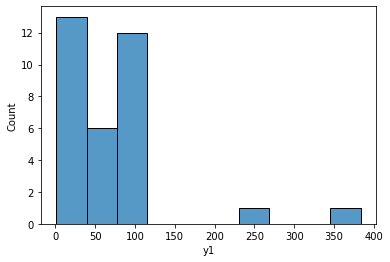

In [ ]:
absolute_error = abs(y_test - y_pred)

sns.histplot(absolute_error, bins=10)

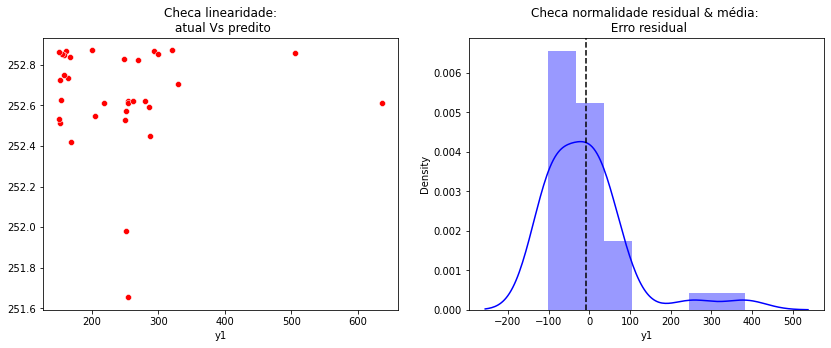

In [ ]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,y_pred,ax=ax,color='r')
ax.set_title('Checa linearidade:\n atual Vs predito')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y_test - y_pred),ax=ax,color='b')
ax.axvline((y_test - y_pred).mean(),color='k',linestyle='--')
ax.set_title('Checa normalidade residual & média: \n Erro residual');

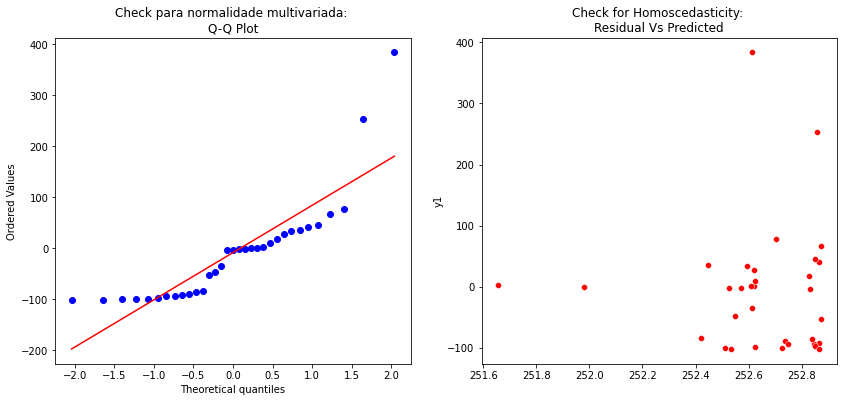

In [ ]:
# Check para normalidade multivariada

f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred),fit=True,plot=ax[0])
ax[0].set_title('Check para normalidade multivariada: \nQ-Q Plot')

#Check for Homoscedasticity
"""
Os dados são homocedásticos, o que significa que os resíduos são iguais 
ao longo da linha de regressão.
Podemos olhar para o gráfico de dispersão de valor ajustado Vs residual.
Se o gráfico heterocedástico exibiria um padrão de forma de funil.
"""
sns.scatterplot(y = (y_test - y_pred), x= y_pred, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R:', metrics.r2_score(y_test,y_pred))

MAE: 68.99253383030135
MSE: 10395.521118424975
RMSE: 101.95842838345918
R: -0.0071679176250432075


In [ ]:
MAPE = np.mean(100 * (np.abs(y_test-y_pred)/y_test))
acc = 100 - MAPE
print(f'Acurácia de {acc:.2f}')

Acurácia de 69.08


## **Séries Temporais**

In [ ]:
dataframe['data'] = pd.to_datetime(dataframe['data']).dt.date
dataframe = dataframe.sort_values(by=['data'])
type(dataframe['data'])

pandas.core.series.Series

In [ ]:
dataframe.head()

Unnamed: 0             _id  codvendedor  vltotal  vltabela  codigo01  \
186         186  205_2021-10-01          205        0        41       NaN   
196         196  302_2021-10-04          302      570       582       NaN   
195         195  201_2021-10-04          201      133       129       NaN   
194         194  303_2021-10-04          303      102        98       NaN   
193         193  208_2021-10-04          208     1263      1285       NaN   

     codigo02        data tipometa tipodados  vl_venda  qt_venda  peso  \
186       NaN  2021-10-01      NaN       NaN         0       NaN   NaN   
196       NaN  2021-10-04      NaN       NaN         0       NaN   NaN   
195       NaN  2021-10-04      NaN       NaN         0       NaN   NaN   
194       NaN  2021-10-04      NaN       NaN         0       NaN   NaN   
193       NaN  2021-10-04      NaN       NaN         0       NaN   NaN   

     pos_mix  pos_clientes  perc_lucratividade  vl_venda_transmitida  \
186      NaN           NaN            0.285331                  3040   
196      NaN           NaN            0.286292                  1260   
195      NaN           NaN            0.319448                  1386   
194      NaN           NaN            0.287021                  1210   
193      NaN           NaN            0.300170                  3393   

     vl_venda_faturada  vl_venda_tabela  vl_venda_custo  vl_devolucao  \
186                  0             3055            2172             0   
196                  0             1273             899             0   
195                  0             1337             943             0   
194                  0             1200             862             0   
193                  0             3466            2375             0   

     vl_comissao  vl_st  vl_ipi  vl_outros  vl_venda_nao_faturada  \
186            0      0       0          0                      0   
196            0      0       0          0                      0   
195            0      0       0          0                      0   
194            0      0       0          0                      0   
193            0      0       0          0                      0   

     vl_venda_bloqueada  clientes_positivados  clientes_positivados_delta  \
186                   0                  15.0                        15.0   
196                   0                   7.0                         3.0   
195                   0                  12.0                         7.0   
194                   0                  17.0                         7.0   
193                   0                  18.0                         9.0   

     total_pedidos  total_pedidos_prazo  vl_venda_callcenter  \
186           3040                49096                    0   
196           1260                27067                    0   
195           1386                19187                    0   
194           1210                16768                    0   
193           3393                76140                    0   

     vl_titulos_recebidos  vl_lucro  vl_venda_lucro  vl_comissao_venda  \
186                     0         0               0                  0   
196                     0         0               0                  0   
195                     0         0               0                  0   
194                     0         0               0                  0   
193                     0         0               0                  0   

     vl_vales  vl_venda_tabela_faturada  codbairro  codcidade  codpais  \
186         0                         0        NaN      10576      NaN   
196         0                         0        NaN      10196      NaN   
195         0                         0        NaN      10578      NaN   
194         0                         0        NaN      10196      NaN   
193         0                         0        NaN      10443      NaN   

     codsupervisor  codcliprinc  uf  codibge    y  vltotal_1  vltotal_2 

In [ ]:
dataframe.codvendedor.value_counts()

302    133
303    133
102    130
106    129
101    124
209    123
203    121
208    112
205    103
201     91
109     49
207     47
104     30
103     26
Name: codvendedor, dtype: int64

In [ ]:
dataframe.codvendedor = dataframe.codvendedor.values.astype(str)

Text(0, 0.5, 'Vendas')

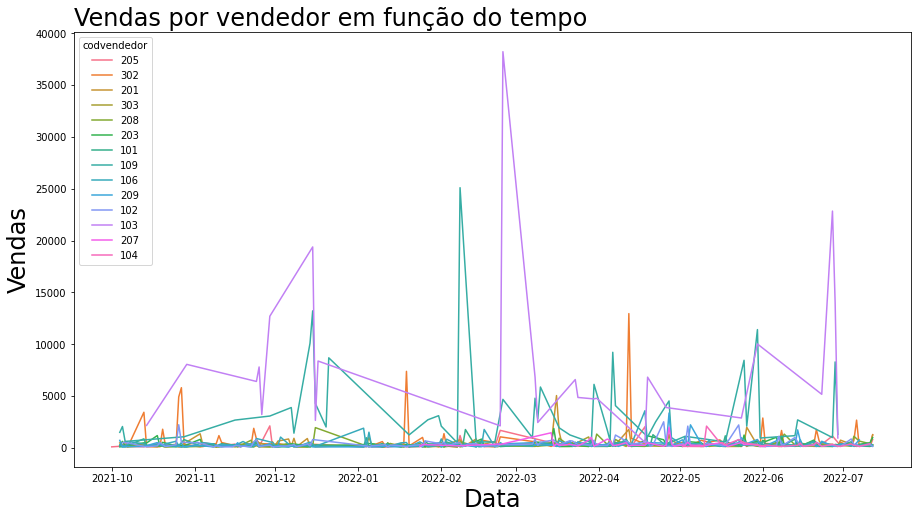

In [ ]:
plt.figure(figsize=(15,8))
fig = sns.lineplot(x='data',y='y',hue='codvendedor',data=dataframe)
fig.set_title('Vendas por vendedor em função do tempo', loc='left',fontsize=24)
fig.set_xlabel('Data',fontsize=24)
fig.set_ylabel('Vendas',fontsize=24)

In [ ]:
#Pegando somente o vendedor 303

df_303 = dataframe[dataframe['codvendedor'] == 303]
df_303.head()

Unnamed: 0             _id  codvendedor  vltotal  vltabela  codigo01  \
2            2  303_2022-02-01          303      159       159   10477.0   
19          19  303_2022-02-02          303      276       280   10034.0   
23          23  303_2022-02-03          303      109       108    2993.0   
30          30  303_2022-02-07          303      353       354    2847.0   
44          44  303_2022-02-08          303      275       280    3276.0   

    codigo02                 data tipometa tipodados  vl_venda  qt_venda  \
2     3522.0  2022-02-01T00:00:00       CF         A        51      25.0   
19    4599.0  2022-02-02T00:00:00       CF         A       110      20.0   
23    4599.0  2022-02-03T00:00:00       CF         A        22       6.0   
30       NaN  2022-02-07T00:00:00        P         A        21      12.0   
44       NaN  2022-02-08T00:00:00        P         A        21       1.0   

       peso  pos_mix  pos_clientes  perc_lucratividade  vl_venda_transmitida  \
2    53.460      2.0           1.0            0.286859                  1721   
19   23.058      2.0           1.0            0.296441                  2168   
23  223.250      1.0           1.0            0.238347                  1964   
30      NaN      NaN           1.0            0.247425                  1586   
44   26.860      NaN           1.0            0.281073                  1811   

    vl_venda_faturada  vl_venda_tabela  vl_venda_custo  vl_devolucao  \
2                1247             1742            1227             0   
19                473             2181            1525           121   
23               3414             1973            1496             0   
30                  0             1590            1193             0   
44                336             1809            1302             0   

    vl_comissao  vl_st  vl_ipi  vl_outros  vl_venda_nao_faturada  \
2             0      0       0          0                      0   
19            0      0       0          0                      0   
23            0      0       0          0                      0   
30            0      0       0          0                      0   
44            0      0       0          0                      0   

    vl_venda_bloqueada  clientes_positivados  clientes_positivados_delta  \
2                    0                   9.0                         9.0   
19                   0                  17.0                         8.0   
23                   0                  25.0                         8.0   
30                   0                  44.0                         9.0   
44                   0                  51.0                         7.0   

    total_pedidos  total_pedidos_prazo  vl_venda_callcenter  \
2            1721                19930                    0   
19           2168                38599                    0   
23           1964                20973                    0   
30           1586                15881                    0   
44           1811                33274                    0   

    vl_titulos_recebidos  vl_lucro  vl_venda_lucro  vl_comissao_venda  \
2                      0         0               0                  0   
19                     0         0               0                  0   
23                     0         0               0                  0   
30                     0         0               0                  0   
44                     0         0               0                  0   

    vl_vales  vl_venda_tabela_faturada  codbairro  codcidade  codpais  \
2          0                         0        NaN      10196      NaN   
19         0                         0        NaN      10196      NaN   
23         0                         0        NaN      10196      NaN   
30         0                         0        NaN      10196      NaN   
44         0                         0        NaN      10196      NaN   

    codsupervisor  codcliprinc  uf  codibge    y  vlt

In [ ]:
df_303.shape

(133, 167)

In [ ]:
df_303['aceleracao_vendas'] = df_303['y'].diff()
df_303.head()

Unnamed: 0             _id codvendedor  vltotal  vltabela  codigo01  \
194         194  303_2021-10-04         303      102        98       NaN   
199         199  303_2021-10-05         303      211       209       NaN   
211         211  303_2021-10-06         303      242       245       NaN   
221         221  303_2021-10-07         303      201       196       NaN   
231         231  303_2021-10-13         303      100        99       NaN   

     codigo02        data tipometa tipodados  vl_venda  qt_venda     peso  \
194       NaN  2021-10-04      NaN       NaN         0       NaN      NaN   
199       NaN  2021-10-05      NaN       NaN         0       NaN  120.420   
211       NaN  2021-10-06      NaN       NaN         0       NaN      NaN   
221       NaN  2021-10-07      NaN       NaN         0       NaN  316.742   
231       NaN  2021-10-13      NaN       NaN         0       NaN   31.860   

     pos_mix  pos_clientes  perc_lucratividade  vl_venda_transmitida  \
194      NaN           NaN            0.287021                  1210   
199      NaN           NaN            0.330498                  1830   
211      NaN           NaN            0.332928                  2214   
221      NaN           NaN            0.303973                  2019   
231      NaN           NaN            0.300461                  2716   

     vl_venda_faturada  vl_venda_tabela  vl_venda_custo  vl_devolucao  \
194                  0             1200             862             0   
199               1104             1855            1225             0   
211                  0             2219            1477             0   
221               3954             2009            1405           259   
231                623             2730            1900             0   

     vl_comissao  vl_st  vl_ipi  vl_outros  vl_venda_nao_faturada  \
194            0      0       0          0                      0   
199            0      0       0          0                      0   
211            0      0       0          0                      0   
221            0      0       0          0                      0   
231            0      0       0          0                      0   

     vl_venda_bloqueada  clientes_positivados  clientes_positivados_delta  \
194                   0                  17.0                         7.0   
199                   0                  24.0                         7.0   
211                   0                  31.0                         7.0   
221                   0                  42.0                        11.0   
231                   0                  69.0                         8.0   

     total_pedidos  total_pedidos_prazo  vl_venda_callcenter  \
194           1210                16768                    0   
199           1830                41091                    0   
211           2214                52712                    0   
221           2019                23518                    0   
231           2716                37284                    0   

     vl_titulos_recebidos  vl_lucro  vl_venda_lucro  vl_comissao_venda  \
194                     0         0               0                  0   
199                     0         0               0                  0   
211                     0         0               0                  0   
221                     0         0               0                  0   
231                     0         0               0                  0   

     vl_vales  vl_venda_tabela_faturada  codbairro  codcidade  codpais  \
194         0                         0        NaN      10196      NaN   
199         0                         0        NaN      10196      NaN   
211         0                         0        NaN      10196      NaN   
221         0                         0        NaN      10196      NaN   
231         0                         0        NaN      10196      NaN   

     codsupervisor  codcliprinc  uf  codibge    y  vltotal_1

In [ ]:
def plotar_barra(titulo,xlabel,ylabel,x,y,dataset):
    plt.figure(figsize=(15,6))
    ax = plt.bar(dataset[x],dataset[y])
    plt.title(titulo,loc='left',fontsize=20)
    plt.xlabel(xlabel,fontsize=20)
    plt.ylabel(ylabel,fontsize=20,rotation=90)

In [ ]:
def plotar_linha(titulo,xlabel,ylabel,x,y,dataset,hue):
    ax = sns.lineplot(x=x, y=y, hue=hue, data=dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo,loc='left',fontsize=20)
    ax.set_xlabel(xlabel,fontsize=20)
    ax.set_ylabel(ylabel,fontsize=20,rotation=90)

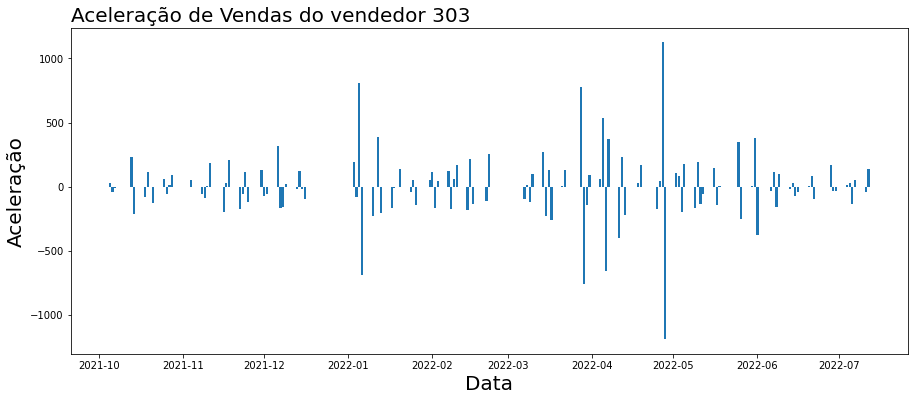

In [ ]:
plotar_barra('Aceleração de Vendas do vendedor 303','Data','Aceleração','data','aceleracao_vendas',df_303)

In [ ]:
df_303['media_vendas'] = df_303.y.rolling(window=7,center=False).mean()
df_303['media_vendas14'] = df_303.y.rolling(window=14,center=False).mean()
df_303.head(10)

Unnamed: 0             _id codvendedor  vltotal  vltabela  codigo01  \
194         194  303_2021-10-04         303      102        98       NaN   
199         199  303_2021-10-05         303      211       209       NaN   
211         211  303_2021-10-06         303      242       245       NaN   
221         221  303_2021-10-07         303      201       196       NaN   
231         231  303_2021-10-13         303      100        99       NaN   
244         244  303_2021-10-14         303      416       472       NaN   
251         251  303_2021-10-18         303      315       315       NaN   
264         264  303_2021-10-19         303      122       125       NaN   
280         280  303_2021-10-21         303        0        11       NaN   
281         281  303_2021-10-25         303      127       127       NaN   

     codigo02        data tipometa tipodados  vl_venda  qt_venda     peso  \
194       NaN  2021-10-04      NaN       NaN         0       NaN      NaN   
199       NaN  2021-10-05      NaN       NaN         0       NaN  120.420   
211       NaN  2021-10-06      NaN       NaN         0       NaN      NaN   
221       NaN  2021-10-07      NaN       NaN         0       NaN  316.742   
231       NaN  2021-10-13      NaN       NaN         0       NaN   31.860   
244       NaN  2021-10-14      NaN       NaN         0       NaN      NaN   
251       NaN  2021-10-18      NaN       NaN         0       NaN      NaN   
264       NaN  2021-10-19      NaN       NaN         0       NaN  103.000   
280       NaN  2021-10-21      NaN       NaN         0       NaN   74.700   
281       NaN  2021-10-25      NaN       NaN         0       NaN      NaN   

     pos_mix  pos_clientes  perc_lucratividade  vl_venda_transmitida  \
194      NaN           NaN            0.287021                  1210   
199      NaN           NaN            0.330498                  1830   
211      NaN           NaN            0.332928                  2214   
221      NaN           NaN            0.303973                  2019   
231      NaN           NaN            0.300461                  2716   
244      NaN           NaN            0.292762                  2150   
251      NaN           NaN            0.321374                  2041   
264      NaN           NaN            0.314182                  1252   
280      NaN           NaN            0.301806                  1418   
281      NaN           NaN            0.262431                  1985   

     vl_venda_faturada  vl_venda_tabela  vl_venda_custo  vl_devolucao  \
194                  0             1200             862             0   
199               1104             1855            1225             0   
211                  0             2219            1477             0   
221               3954             2009            1405           259   
231                623             2730            1900             0   
244                  0             2220            1520             0   
251                  0             2040            1385             0   
264               2041             1288             858             0   
280               2251             1437             990           473   
281                  0             2074            1464             0   

     vl_comissao  vl_st  vl_ipi  vl_outros  vl_venda_nao_faturada  \
194            0      0       0          0                      0   
199            0      0       0          0                      0   
211            0      0       0          0                      0   
221            0      0       0          0                      0   
231            0      0       0          0                      0   
244            0      0       0          0                      0   
251            0      0       0          0                      0   
264            0      0       0          0                      0   
280            0      0       0          0                      0   
281            0      0       0  

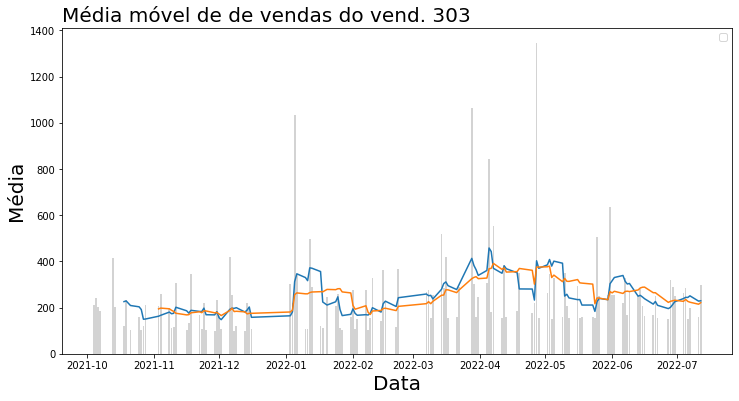

In [ ]:
plotar_linha('Média móvel de vendas do vend. 303','Data','Média','data','media_vendas',df_303,None)
plotar_linha('Média móvel de de vendas do vend. 303','Data','Média','data','media_vendas14',df_303,None)
plt.bar(df_303['data'],df_303['y'],color='lightgrey')
plt.legend()

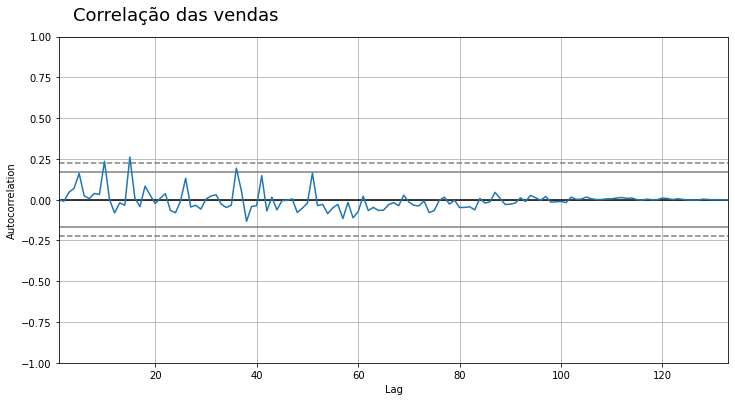

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas',fontsize=18,x=0.26,y=0.95)
autocorrelation_plot(df_303['y'])
ax = ax

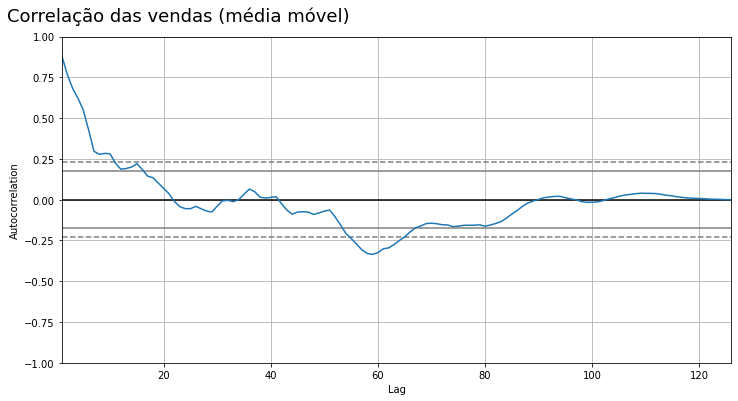

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas (média móvel)',fontsize=18,x=0.26,y=0.95)
autocorrelation_plot(df_303['media_vendas'][7:])
ax=ax

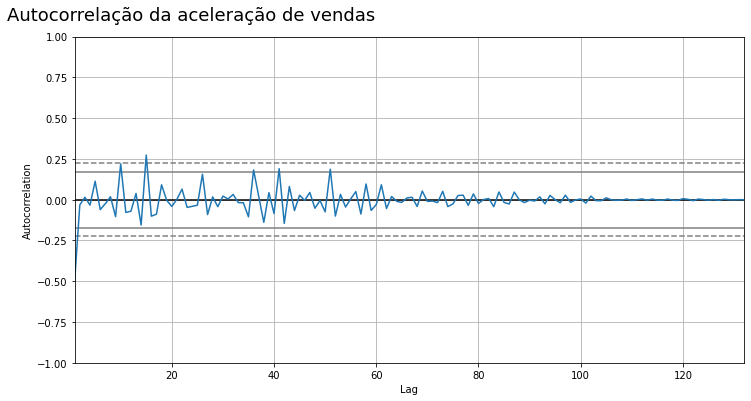

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Autocorrelação da aceleração de vendas',fontsize=18,x=0.26,y=0.95)
autocorrelation_plot(df_303['aceleracao_vendas'][1:])
ax=ax

In [ ]:
df_303['mes'] = pd.to_datetime(df_303['data'])
df_303['mês'] = pd.to_datetime(df_303['data']).dt.month_name()
df_303['dia_da_semana'] = df_303['mes'].dt.day_name()
df_303.head()

Unnamed: 0             _id codvendedor  vltotal  vltabela  codigo01  \
194         194  303_2021-10-04         303      102        98       NaN   
199         199  303_2021-10-05         303      211       209       NaN   
211         211  303_2021-10-06         303      242       245       NaN   
221         221  303_2021-10-07         303      201       196       NaN   
231         231  303_2021-10-13         303      100        99       NaN   

     codigo02        data tipometa tipodados  vl_venda  qt_venda     peso  \
194       NaN  2021-10-04      NaN       NaN         0       NaN      NaN   
199       NaN  2021-10-05      NaN       NaN         0       NaN  120.420   
211       NaN  2021-10-06      NaN       NaN         0       NaN      NaN   
221       NaN  2021-10-07      NaN       NaN         0       NaN  316.742   
231       NaN  2021-10-13      NaN       NaN         0       NaN   31.860   

     pos_mix  pos_clientes  perc_lucratividade  vl_venda_transmitida  \
194      NaN           NaN            0.287021                  1210   
199      NaN           NaN            0.330498                  1830   
211      NaN           NaN            0.332928                  2214   
221      NaN           NaN            0.303973                  2019   
231      NaN           NaN            0.300461                  2716   

     vl_venda_faturada  vl_venda_tabela  vl_venda_custo  vl_devolucao  \
194                  0             1200             862             0   
199               1104             1855            1225             0   
211                  0             2219            1477             0   
221               3954             2009            1405           259   
231                623             2730            1900             0   

     vl_comissao  vl_st  vl_ipi  vl_outros  vl_venda_nao_faturada  \
194            0      0       0          0                      0   
199            0      0       0          0                      0   
211            0      0       0          0                      0   
221            0      0       0          0                      0   
231            0      0       0          0                      0   

     vl_venda_bloqueada  clientes_positivados  clientes_positivados_delta  \
194                   0                  17.0                         7.0   
199                   0                  24.0                         7.0   
211                   0                  31.0                         7.0   
221                   0                  42.0                        11.0   
231                   0                  69.0                         8.0   

     total_pedidos  total_pedidos_prazo  vl_venda_callcenter  \
194           1210                16768                    0   
199           1830                41091                    0   
211           2214                52712                    0   
221           2019                23518                    0   
231           2716                37284                    0   

     vl_titulos_recebidos  vl_lucro  vl_venda_lucro  vl_comissao_venda  \
194                     0         0               0                  0   
199                     0         0               0                  0   
211                     0         0               0                  0   
221                     0         0               0                  0   
231                     0         0               0                  0   

     vl_vales  vl_venda_tabela_faturada  codbairro  codcidade  codpais  \
194         0                         0        NaN      10196      NaN   
199         0                         0        NaN      10196      NaN   
211         0                         0        NaN      10196      NaN   
221         0                         0        NaN      10196      NaN   
231         0                         0        NaN      10196      NaN   

     codsupervisor  codcliprinc  uf  codibge    y  vltotal_1

In [ ]:
meses = {'January' :1, 'February':2, 'March': 3,'April':4,'May': 5,
         'June':6,'July':7,'August':8,'September':9,'October':10,
         'November':11,'December':12}

In [ ]:
df_303['mês'] = df_303['mês'].map(meses)

In [ ]:
dias_traduzidos = {'Monday':'Segunda','Tuesday':'Terça','Wednesday':'Quarta',
                  'Thursday':'Quinta','Friday':'Sexta','Saturday':'Sabado',
                  'Sunday':'Domingo'}
df_303['dia_da_semana'] = df_303['dia_da_semana'].map(dias_traduzidos)

In [ ]:
df_303.head()

Unnamed: 0             _id codvendedor  vltotal  vltabela  codigo01  \
194         194  303_2021-10-04         303      102        98       NaN   
199         199  303_2021-10-05         303      211       209       NaN   
211         211  303_2021-10-06         303      242       245       NaN   
221         221  303_2021-10-07         303      201       196       NaN   
231         231  303_2021-10-13         303      100        99       NaN   

     codigo02        data tipometa tipodados  vl_venda  qt_venda     peso  \
194       NaN  2021-10-04      NaN       NaN         0       NaN      NaN   
199       NaN  2021-10-05      NaN       NaN         0       NaN  120.420   
211       NaN  2021-10-06      NaN       NaN         0       NaN      NaN   
221       NaN  2021-10-07      NaN       NaN         0       NaN  316.742   
231       NaN  2021-10-13      NaN       NaN         0       NaN   31.860   

     pos_mix  pos_clientes  perc_lucratividade  vl_venda_transmitida  \
194      NaN           NaN            0.287021                  1210   
199      NaN           NaN            0.330498                  1830   
211      NaN           NaN            0.332928                  2214   
221      NaN           NaN            0.303973                  2019   
231      NaN           NaN            0.300461                  2716   

     vl_venda_faturada  vl_venda_tabela  vl_venda_custo  vl_devolucao  \
194                  0             1200             862             0   
199               1104             1855            1225             0   
211                  0             2219            1477             0   
221               3954             2009            1405           259   
231                623             2730            1900             0   

     vl_comissao  vl_st  vl_ipi  vl_outros  vl_venda_nao_faturada  \
194            0      0       0          0                      0   
199            0      0       0          0                      0   
211            0      0       0          0                      0   
221            0      0       0          0                      0   
231            0      0       0          0                      0   

     vl_venda_bloqueada  clientes_positivados  clientes_positivados_delta  \
194                   0                  17.0                         7.0   
199                   0                  24.0                         7.0   
211                   0                  31.0                         7.0   
221                   0                  42.0                        11.0   
231                   0                  69.0                         8.0   

     total_pedidos  total_pedidos_prazo  vl_venda_callcenter  \
194           1210                16768                    0   
199           1830                41091                    0   
211           2214                52712                    0   
221           2019                23518                    0   
231           2716                37284                    0   

     vl_titulos_recebidos  vl_lucro  vl_venda_lucro  vl_comissao_venda  \
194                     0         0               0                  0   
199                     0         0               0                  0   
211                     0         0               0                  0   
221                     0         0               0                  0   
231                     0         0               0                  0   

     vl_vales  vl_venda_tabela_faturada  codbairro  codcidade  codpais  \
194         0                         0        NaN      10196      NaN   
199         0                         0        NaN      10196      NaN   
211         0                         0        NaN      10196      NaN   
221         0                         0        NaN      10196      NaN   
231         0                         0        NaN      10196      NaN   

     codsupervisor  codcliprinc  uf  codibge    y  vltotal_1

In [ ]:
agrupados_303 = df_303.groupby('dia_da_semana')['y','media_vendas','aceleracao_vendas'].mean().round()

In [ ]:
agrupados_303['dia_da_semana'] = agrupados_303.index
agrupados_303.head(7)

y  media_vendas  aceleracao_vendas dia_da_semana
dia_da_semana                                                      
Quarta         271.0         254.0                5.0        Quarta
Quinta         225.0         246.0              -52.0        Quinta
Segunda        231.0         254.0                3.0       Segunda
Terça          271.0         250.0               39.0         Terça

In [ ]:
agrupados_303 = agrupados_303.reindex(['Domingo','Segunda','Terça','Quarta','Quinta','Sexta',
                                    'Sabado'])

<AxesSubplot:xlabel='dia_da_semana', ylabel='y'>

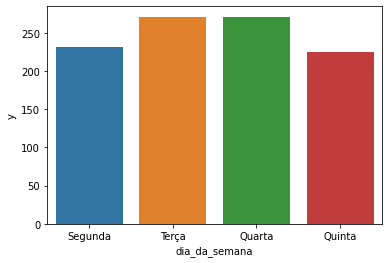

In [ ]:
# Quantidade de vendas por dia da semana

sns.barplot(agrupados_303['dia_da_semana'],agrupados_303.y)

In [ ]:
agrupado_303 = df_303.groupby('mês')['y','media_vendas','aceleracao_vendas','dia_da_semana'].mean().round()

In [ ]:
agrupado_303['mês'] = agrupado_303.index
agrupado_303.head(7)

y  media_vendas  aceleracao_vendas  mês
mês                                             
1    263.0         262.0                3.0    1
2    218.0         193.0               17.0    2
3    325.0         305.0               -9.0    3
4    385.0         358.0               -7.0    4
5    266.0         282.0               28.0    5
6    234.0         258.0              -23.0    6
7    226.0         239.0                8.0    7

<AxesSubplot:xlabel='mês', ylabel='y'>

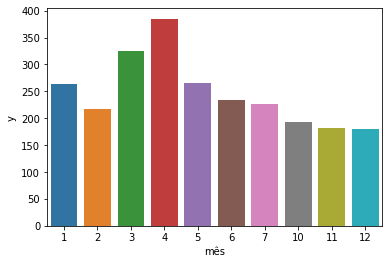

In [ ]:
# Quantidade de vendas por mês

sns.barplot(agrupado_303['mês'],agrupado_303.y)

In [ ]:
def criar_features(df,label=None):
    df = df.copy()
    df['diasemana'] = df['mes'].dt.dayofweek
    df['mês'] = df['mes'].dt.month
    df['diamês'] = df['mes'].dt.day
    
    X = df[['diasemana','mês','diamês']]
    
    if label:
        y = df[label]
        return X,y
    return X

In [ ]:
X, y = criar_features(df_303,label='y')

In [ ]:
df_final = pd.concat([X,y],axis=1)

In [ ]:
df_final.head(10)

diasemana  mês  diamês    y
194          0   10       4  211
199          1   10       5  242
211          2   10       6  201
221          3   10       7  187
231          2   10      13  416
244          3   10      14  203
251          0   10      18  122
264          1   10      19  232
280          3   10      21  103
281          0   10      25  161

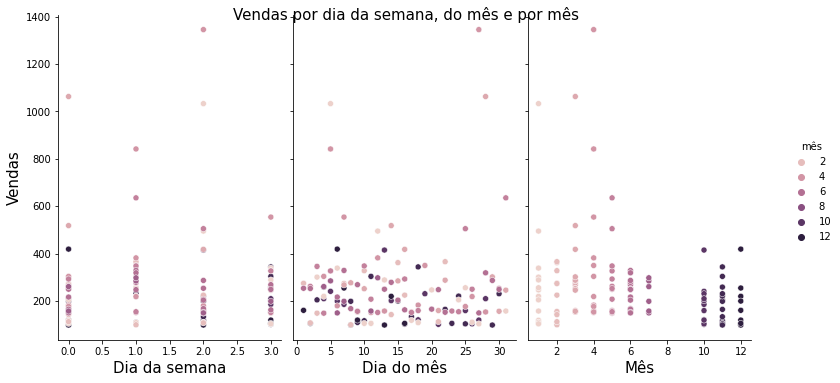

In [ ]:
g = sns.pairplot(df_final.dropna(),
                hue='mês',
                x_vars=['diasemana','diamês','mês'],
                y_vars='y')

g.fig.set_size_inches(12,6)
g.axes[0,0].set_xlabel('Dia da semana',fontsize=15)
g.axes[0,1].set_xlabel('Dia do mês',fontsize=15)
g.axes[0,2].set_xlabel('Mês',fontsize=15)
g.axes[0,0].set_ylabel('Vendas',fontsize=15)

plt.suptitle('Vendas por dia da semana, do mês e por mês',fontsize=15)
plt.show()

In [ ]:
df_303['data'] = pd.to_datetime(df_303['data'], format='%Y-%m-%d')
df_303 = df_303.sort_values(by=['data'])
df_303.index = df_303['data']
df_303.head()

Unnamed: 0             _id  codvendedor  vltotal  vltabela  \
data                                                                     
2021-10-04         194  303_2021-10-04          303      102        98   
2021-10-05         199  303_2021-10-05          303      211       209   
2021-10-06         211  303_2021-10-06          303      242       245   
2021-10-07         221  303_2021-10-07          303      201       196   
2021-10-13         231  303_2021-10-13          303      100        99   

            codigo01  codigo02       data tipometa tipodados  vl_venda  \
data                                                                     
2021-10-04       NaN       NaN 2021-10-04      NaN       NaN         0   
2021-10-05       NaN       NaN 2021-10-05      NaN       NaN         0   
2021-10-06       NaN       NaN 2021-10-06      NaN       NaN         0   
2021-10-07       NaN       NaN 2021-10-07      NaN       NaN         0   
2021-10-13       NaN       NaN 2021-10-13      NaN       NaN         0   

            qt_venda     peso  pos_mix  pos_clientes  perc_lucratividade  \
data                                                                       
2021-10-04       NaN      NaN      NaN           NaN            0.287021   
2021-10-05       NaN  120.420      NaN           NaN            0.330498   
2021-10-06       NaN      NaN      NaN           NaN            0.332928   
2021-10-07       NaN  316.742      NaN           NaN            0.303973   
2021-10-13       NaN   31.860      NaN           NaN            0.300461   

            vl_venda_transmitida  vl_venda_faturada  vl_venda_tabela  \
data                                                                   
2021-10-04                  1210                  0             1200   
2021-10-05                  1830               1104             1855   
2021-10-06                  2214                  0             2219   
2021-10-07                  2019               3954             2009   
2021-10-13                  2716                623             2730   

            vl_venda_custo  vl_devolucao  vl_comissao  vl_st  vl_ipi  \
data                                                                   
2021-10-04             862             0            0      0       0   
2021-10-05            1225             0            0      0       0   
2021-10-06            1477             0            0      0       0   
2021-10-07            1405           259            0      0       0   
2021-10-13            1900             0            0      0       0   

            vl_outros  vl_venda_nao_faturada  vl_venda_bloqueada  \
data                                                               
2021-10-04          0                      0                   0   
2021-10-05          0                      0                   0   
2021-10-06          0                      0                   0   
2021-10-07          0                      0                   0   
2021-10-13          0                      0                   0   

            clientes_positivados  clientes_positivados_delta  total_pedidos  \
data                                                                          
2021-10-04                  17.0                         7.0           1210   
2021-10-05                  24.0                         7.0           1830   
2021-10-06                  31.0                         7.0           2214   
2021-10-07                  42.0                        11.0           2019   
2021-10-13                  69.0                         8.0           2716   

            total_pedidos_prazo  vl_venda_callcenter  vl_titulos_recebidos  \
data                                                                         
2021-10-04                16768                    0                     0   
2021-10-05                41091                    0                     0   
2021-10-06                52712                    0                     0   
2021-10-07

In [ ]:
y = df_303['y']
type(y)

pandas.core.series.Series

In [ ]:
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [ ]:
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p,d,q))]
seasonal_pdq

[(0, 0, 0, 7),
 (0, 0, 1, 7),
 (0, 1, 0, 7),
 (0, 1, 1, 7),
 (1, 0, 0, 7),
 (1, 0, 1, 7),
 (1, 1, 0, 7),
 (1, 1, 1, 7)]

In [ ]:
import statsmodels.api as sm
aic_list = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX(y,
                                       order=param,
                                       seasonal_order=param_seasonal,
                                        initialization='approximate_diffuse')
        results = mod.fit()
        aic_list.append('ARIMA{}x{} - AIC{}'.format(param, param_seasonal, results.aic))

In [ ]:
aic_list

['ARIMA(0, 0, 0)x(0, 0, 0, 7) - AIC1905.3550781475979',
 'ARIMA(0, 0, 0)x(0, 0, 1, 7) - AIC1883.5653398955947',
 'ARIMA(0, 0, 0)x(0, 1, 0, 7) - AIC1759.1670002605406',
 'ARIMA(0, 0, 0)x(0, 1, 1, 7) - AIC1696.5586532053858',
 'ARIMA(0, 0, 0)x(1, 0, 0, 7) - AIC1847.5435969082898',
 'ARIMA(0, 0, 0)x(1, 0, 1, 7) - AIC1808.6568559064876',
 'ARIMA(0, 0, 0)x(1, 1, 0, 7) - AIC1734.340872731827',
 'ARIMA(0, 0, 0)x(1, 1, 1, 7) - AIC1698.5487781446736',
 'ARIMA(0, 0, 1)x(0, 0, 0, 7) - AIC1869.7691625700998',
 'ARIMA(0, 0, 1)x(0, 0, 1, 7) - AIC1869.0798764097358',
 'ARIMA(0, 0, 1)x(0, 1, 0, 7) - AIC1761.0087580027825',
 'ARIMA(0, 0, 1)x(0, 1, 1, 7) - AIC1701.9406837157626',
 'ARIMA(0, 0, 1)x(1, 0, 0, 7) - AIC1847.427934034229',
 'ARIMA(0, 0, 1)x(1, 0, 1, 7) - AIC1814.0486449967452',
 'ARIMA(0, 0, 1)x(1, 1, 0, 7) - AIC1735.299757441626',
 'ARIMA(0, 0, 1)x(1, 1, 1, 7) - AIC1703.9384509556878',
 'ARIMA(0, 1, 0)x(0, 0, 0, 7) - AIC1838.8759047177132',
 'ARIMA(0, 1, 0)x(0, 0, 1, 7) - AIC1858.56808138767

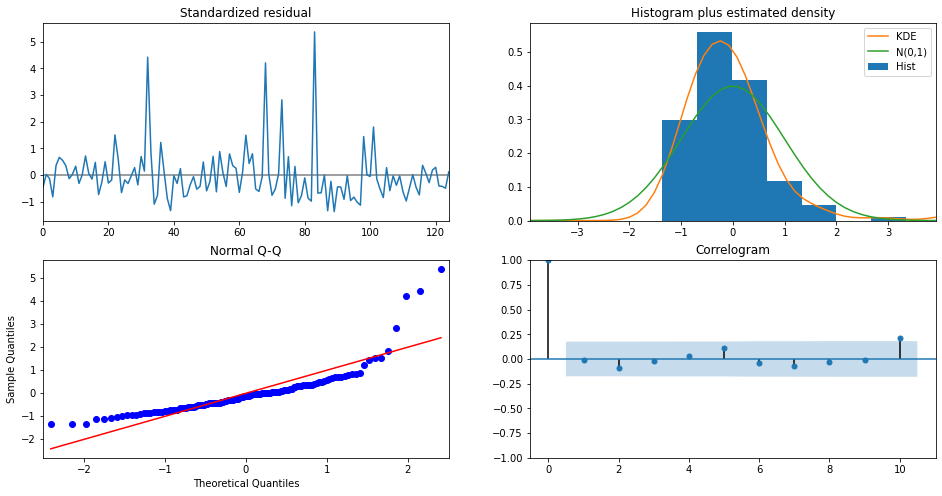

In [ ]:
mod = sm.tsa.statespace.SARIMAX(y, order=(1,1,1), seasonal_order = (0,1,1,7))
results = mod.fit()
results.plot_diagnostics(figsize=(16,8))
plt.show()

In [ ]:
df_303['data'].min()

Timestamp('2021-10-04 00:00:00')

In [ ]:
df_303['data'].max()

Timestamp('2022-07-12 00:00:00')

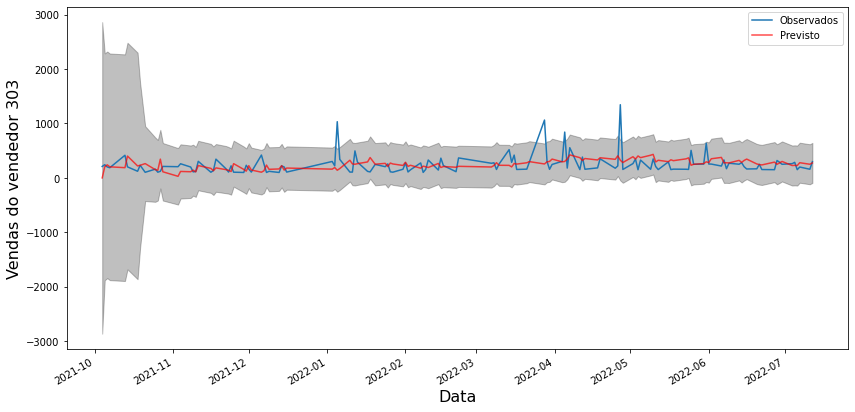

In [ ]:
plt.figure(figsize=(14,7))
pred = results.get_prediction(start=pd.to_datetime('2021-10-04'),dynamic=False)
pred_ci = pred.conf_int()
ax = y['2021':].plot(label='Observados')
pred.predicted_mean.plot(ax=ax, label='Previsto', color='r', alpha=0.7)
ax.fill_between(pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1], color='k',alpha=0.25)
plt.legend()
ax.set_xlabel('Data',fontsize=16)
ax.set_ylabel('Vendas do vendedor 303',fontsize=16)
plt.show()

In [ ]:
pred_arima = pred.predicted_mean

In [ ]:
pred_arima = pd.DataFrame(pred_arima) 
pred_arima['data'] = pred_arima.index
type(pred_arima)

pandas.core.frame.DataFrame

In [ ]:
y_t = pd.DataFrame(y) 
y_t['data'] = y_t.index

In [ ]:
y_t.dtypes

y                int64
data    datetime64[ns]
dtype: object

In [ ]:
y_t.shape, pred_arima.shape

((133, 2), (133, 2))

In [ ]:
pred_arima.index = pd.Index(range(133))
pred_arima

0       data
0      0.000000 2021-10-04
1    203.933484 2021-10-05
2    240.129248 2021-10-06
3    203.603289 2021-10-07
4    187.870756 2021-10-13
5    401.305136 2021-10-14
6    220.045388 2021-10-18
7    231.374306 2021-10-19
8    262.851726 2021-10-21
9    151.776683 2021-10-25
10   141.087167 2021-10-26
11   344.768065 2021-10-27
12   112.367753 2021-10-28
13    29.389300 2021-11-03
14   118.738992 2021-11-04
15   113.317299 2021-11-08
16   142.381107 2021-11-09
17   110.760707 2021-11-10
18   226.816965 2021-11-11
19   175.236924 2021-11-16
20   132.448639 2021-11-17
21   183.848516 2021-11-18
22   151.940651 2021-11-22
23   139.192307 2021-11-23
24   117.585411 2021-11-24
25   261.756758 2021-11-25
26   156.351896 2021-11-29
27   124.584987 2021-11-30
28   224.365304 2021-12-01
29   144.805162 2021-12-02
30   104.916846 2021-12-06
31   131.253961 2021-12-07
32   235.514101 2021-12-08
33   157.692639 2021-12-09
34   164.761251 2021-12-13
35   224.698559 2021-12-14
36   143.337311 2021-12-15
37   181.055564 2021-12-16
38   160.940214 2022-01-03
39   190.296572 2022-01-04
40   140.944945 2022-01-05
41   171.694008 2022-01-06
42   324.828618 2022-01-10
43   257.308447 2022-01-11
44   251.053181 2022-01-12
45   261.330791 2022-01-13
46   293.716815 2022-01-17
47   373.975027 2022-01-18
48   251.629005 2022-01-20
49   267.295378 2022-01-24
50   208.952043 2022-01-25
51   272.716395 2022-01-26
52   256.333949 2022-01-27
53   229.080744 2022-01-31
54   287.566886 2022-02-01
55   211.966580 2022-02-02
56   231.965683 2022-02-03
57   178.430934 2022-02-07
58   215.615745 2022-02-08
59   205.375643 2022-02-09
60   191.319725 2022-02-10
61   265.510571 2022-02-14
62   191.648281 2022-02-15
63   208.766351 2022-02-16
64   196.339328 2022-02-21
65   212.790841 2022-02-22
66   200.542268 2022-03-07
67   227.985620 2022-03-08
68   279.549048 2022-03-09
69   231.989554 2022-03-10
70   230.484090 2022-03-14
71   201.979896 2022-03-15
72   264.677917 2022-03-16
73   253.936067 2022-03-17
74   278.320848 2022-03-21
75   299.315472 2022-03-22
76   256.174589 2022-03-28
77   295.280434 2022-03-29
78   302.315055 2022-03-30
79   345.971024 2022-03-31
80   295.499358 2022-04-04
81   302.496988 2022-04-05
82   346.668175 2022-04-06
83   423.108121 2022-04-07
84   371.702811 2022-04-11
85   320.328896 2022-04-12
86   356.162820 2022-04-13
87   329.489847 2022-04-18
88   370.209003 2022-04-19
89   341.719034 2022-04-25
90   405.330372 2022-04-26
91   324.986937 2022-04-27
92   282.608318 2022-04-28
93   389.164605 2022-05-02
94   346.365878 2022-05-03
95   403.339055 2022-05-04
96   371.993018 2022-05-05
97   417.013791 2022-05-09
98   432.554046 2022-05-10
99   293.125333 2022-05-11
100  324.237258 2022-05-12
101  298.364573 2022-05-16
102  332.664384 2022-05-17
103  316.510451 2022-05-18
104  349.927415 2022-05-23
105  368.545008 2022-05-24
106  232.630747 2022-05-25
107  249.916780 2022-05-26
108  262.941663 2022-05-30
109  295.521036 2022-05-31
110  282.385031 2022-06-01
111  351.784186 2022-06-02
112  376.532698 2022-06-06
113  276.773782 2022-06-07
114  278.456443 2022-06-08
115  275.030200 2022-06-09
116  322.297236 2022-06-13
117  285.167226 2022-06-14
118  321.156872 2022-06-15
119  345.883605 2022-06-16
120  256.330609 2022-06-20
121  245.461856 2022-06-21
122  238.520804 2022-06-22
123  290.221091 2022-06-27
124  250.078996 2022-06-28
125  274.990442 2022-06-29
126  302.440848 2022-06-30
127  227.373304 2022-07-04
128  230.486180 2022-07-05
129  227.132051 2022-07-06
130  279.108114 2022-07-07
131  250.818058 2022-07-11
132  275.837843 2022-07-12

In [ ]:
pred_arima[0]

0        0.000000
1      203.933484
2      240.129248
3      203.603289
4      187.870756
5      401.305136
6      220.045388
7      231.374306
8      262.851726
9      151.776683
10     141.087167
11     344.768065
12     112.367753
13      29.389300
14     118.738992
15     113.317299
16     142.381107
17     110.760707
18     226.816965
19     175.236924
20     132.448639
21     183.848516
22     151.940651
23     139.192307
24     117.585411
25     261.756758
26     156.351896
27     124.584987
28     224.365304
29     144.805162
30     104.916846
31     131.253961
32     235.514101
33     157.692639
34     164.761251
35     224.698559
36     143.337311
37     181.055564
38     160.940214
39     190.296572
40     140.944945
41     171.694008
42     324.828618
43     257.308447
44     251.053181
45     261.330791
46     293.716815
47     373.975027
48     251.629005
49     267.295378
50     208.952043
51     272.716395
52     256.333949
53     229.080744
54     287.566886
55     211

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_t['y'], pred_arima[0]))
print('MSE:', metrics.mean_squared_error(y_t['y'], pred_arima[0]))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_t['y'], pred_arima[0])))
print('R:', metrics.r2_score(y_t['y'], pred_arima[0]))
print('MAPE', metrics.mean_absolute_percentage_error(y_t['y'], pred_arima[0]))
print('Accuracy:', abs(1-(metrics.mean_absolute_percentage_error(y_t['y'], pred_arima[0])))*100)

MAE: 124.31103764235468
MSE: 36900.56972849733
RMSE: 192.09521006130612
R: -0.14907452382023023
MAPE 0.5644166421619647
Accuracy: 43.55833578380353


### **Pycaret com séries temporais**

In [ ]:
df_303 = df_303.sort_values(by=['data'])

In [ ]:
df_ = df_303[['y', 'data']]
df_.index = pd.Index(range(133))
df_

y                 data
0     211  2021-10-04T00:00:00
1     242  2021-10-05T00:00:00
2     201  2021-10-06T00:00:00
3     187  2021-10-07T00:00:00
4     416  2021-10-13T00:00:00
5     203  2021-10-14T00:00:00
6     122  2021-10-18T00:00:00
7     232  2021-10-19T00:00:00
8     103  2021-10-21T00:00:00
9     161  2021-10-25T00:00:00
10    105  2021-10-26T00:00:00
11    121  2021-10-27T00:00:00
12    211  2021-10-28T00:00:00
13    206  2021-11-03T00:00:00
14    260  2021-11-04T00:00:00
15    200  2021-11-08T00:00:00
16    111  2021-11-09T00:00:00
17    118  2021-11-10T00:00:00
18    305  2021-11-11T00:00:00
19    104  2021-11-16T00:00:00
20    135  2021-11-17T00:00:00
21    345  2021-11-18T00:00:00
22    166  2021-11-22T00:00:00
23    107  2021-11-23T00:00:00
24    222  2021-11-24T00:00:00
25    105  2021-11-25T00:00:00
26    100  2021-11-29T00:00:00
27    232  2021-11-30T00:00:00
28    162  2021-12-01T00:00:00
29    107  2021-12-02T00:00:00
30    420  2021-12-06T00:00:00
31    256  2021-12-07T00:00:00
32    100  2021-12-08T00:00:00
33    121  2021-12-09T00:00:00
34    100  2021-12-13T00:00:00
35    221  2021-12-14T00:00:00
36    201  2021-12-15T00:00:00
37    107  2021-12-16T00:00:00
38    302  2022-01-03T00:00:00
39    221  2022-01-04T00:00:00
40   1033  2022-01-05T00:00:00
41    340  2022-01-06T00:00:00
42    107  2022-01-10T00:00:00
43    107  2022-01-11T00:00:00
44    496  2022-01-12T00:00:00
45    290  2022-01-13T00:00:00
46    120  2022-01-17T00:00:00
47    110  2022-01-18T00:00:00
48    248  2022-01-20T00:00:00
49    206  2022-01-24T00:00:00
50    257  2022-01-25T00:00:00
51    112  2022-01-26T00:00:00
52    105  2022-01-27T00:00:00
53    159  2022-01-31T00:00:00
54    276  2022-02-01T00:00:00
55    109  2022-02-02T00:00:00
56    150  2022-02-03T00:00:00
57    275  2022-02-07T00:00:00
58    101  2022-02-08T00:00:00
59    157  2022-02-09T00:00:00
60    329  2022-02-10T00:00:00
61    144  2022-02-14T00:00:00
62    363  2022-02-15T00:00:00
63    226  2022-02-16T00:00:00
64    114  2022-02-21T00:00:00
65    367  2022-02-22T00:00:00
66    269  2022-03-07T00:00:00
67    278  2022-03-08T00:00:00
68    155  2022-03-09T00:00:00
69    253  2022-03-10T00:00:00
70    519  2022-03-14T00:00:00
71    286  2022-03-15T00:00:00
72    419  2022-03-16T00:00:00
73    155  2022-03-17T00:00:00
74    161  2022-03-21T00:00:00
75    289  2022-03-22T00:00:00
76   1063  2022-03-28T00:00:00
77    303  2022-03-29T00:00:00
78    158  2022-03-30T00:00:00
79    247  2022-03-31T00:00:00
80    305  2022-04-04T00:00:00
81    842  2022-04-05T00:00:00
82    181  2022-04-06T00:00:00
83    555  2022-04-07T00:00:00
84    153  2022-04-11T00:00:00
85    383  2022-04-12T00:00:00
86    159  2022-04-13T00:00:00
87    184  2022-04-18T00:00:00
88    351  2022-04-19T00:00:00
89    178  2022-04-25T00:00:00
90    220  2022-04-26T00:00:00
91   1345  2022-04-27T00:00:00
92    155  2022-04-28T00:00:00
93    263  2022-05-02T00:00:00
94    347  2022-05-03T00:00:00
95    150  2022-05-04T00:00:00
96    328  2022-05-05T00:00:00
97    158  2022-05-09T00:00:00
98    349  2022-05-10T00:00:00
99    209  2022-05-11T00:00:00
100   153  2022-05-12T00:00:00
101   294  2022-05-16T00:00:00
102   153  2022-05-17T00:00:00
103   161  2022-05-18T00:00:00
104   159  2022-05-23T00:00:00
105   156  2022-05-24T00:00:00
106   506  2022-05-25T00:00:00
107   251  2022-05-26T00:00:00
108   254  2022-05-30T00:00:00
109   636  2022-05-31T00:00:00
110   255  2022-06-01T00:00:00
111   254  2022-06-02T00:00:00
112   218  2022-06-06T00:00:00
113   330  2022-06-07T00:00:00
114   169  2022-06-08T00:00:00
115   270  2022-06-09T00:00:00
116   251  2022-06-13T00:00:00
117   280  2022-06-14T00:00:00
118   205  2022-06-15T00:00:00
119   164  2022-06-16T00:00:00
120   167  2022-06-20T00:00:00
121   249  2022-06-21T00:00:00
122   154  2022-06-22T00:00:00
123   151  2022-06-27T00:00:00
124   320  2022-06-28T00:00:00
125   288  2022-06-29T00:00:00
126   250  2022-06-30T00:00:00
127   262  2022-07-04T00:00:00
128   286

In [ ]:
# create 12 month moving average
df_['7dias'] = df_['y'].rolling(7).mean()

fig = px.line(df_, x="data", y=["y", "7dias"])
fig.show()

In [ ]:
df_['data'] = pd.to_datetime(df_['data'])

In [ ]:
df_.dtypes

y                int64
data    datetime64[ns]
dtype: object

In [ ]:
type(df_)

pandas.core.frame.DataFrame

In [ ]:
df_train = (df_.loc[:99])
df_test = (df_.loc[99:])
df_train.shape, df_test.shape

((100, 2), (34, 2))

In [ ]:
df_1 = df_train.copy()
df_1.index = df_train['data']
df_1.drop(columns= ['data'], inplace = True)

<AxesSubplot:xlabel='data'>

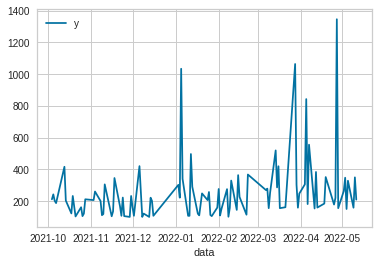

In [ ]:
df_1.plot()

<AxesSubplot:xlabel='data'>

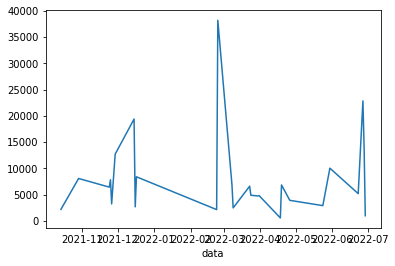

In [ ]:
cod_103 = dataframe[dataframe['codvendedor'] == '103']
cod_103.index = cod_103['data']
cod_103y = cod_103['y']
cod_103y.plot()

In [ ]:
y_ = df_1['y']
y_

data
2021-10-04    211
2021-10-05    242
2021-10-06    201
2021-10-07    187
2021-10-13    416
             ... 
2022-05-04    150
2022-05-05    328
2022-05-09    158
2022-05-10    349
2022-05-11    209
Name: y, Length: 100, dtype: int64

In [ ]:
y_ = y_.asfreq('D')

In [ ]:
y_.isnull().sum()

120

In [ ]:
y_.median()

206.0

In [ ]:
y_ = y_.fillna(value=206)

In [ ]:
time_series = setup(y_, session_id = 42)
time_series

INFO:logs:PyCaret TSForecastingExperiment
INFO:logs:Logging name: ts-default-name
INFO:logs:ML Usecase: MLUsecase.TIME_SERIES
INFO:logs:version 3.0.0
INFO:logs:Initializing setup()
INFO:logs:self.USI: b7ab
INFO:logs:self.variable_keys: {'fold_generator', '_all_models_internal', 'y_train_transformed', 'USI', 'idx', 'exp_name_log', 'n_jobs_param', 'html_param', 'pipeline', 'display_container', 'master_model_container', 'X_test_transformed', 'memory', 'experiment__', 'variable_keys', 'X_train_transformed', 'seasonal_period', 'data', '_available_plots', 'enforce_exogenous', 'X', '_all_metrics', '_gpu_n_jobs_param', 'gpu_param', 'y', 'fh', 'seasonality_present', 'X_train', 'primary_sp_to_use', 'enforce_pi', 'approach_type', 'exogenous_present', 'all_sp_values', 'index_type', 'exp_id', '_all_models', 'X_transformed', 'y_test_transformed', 'seed', 'y_train', 'fold_param', 'y_test', 'log_plots_param', 'logging_param', 'y_transformed', 'X_test', 'fold_groups_param_full', '_ml_usecase', 'strictl

Description                    Value
0                    session_id                       42
1                        Target                        y
2                      Approach               Univariate
3           Exogenous Variables              Not Present
4                    Data shape                 (220, 1)
5              Train data shape                 (219, 1)
6               Test data shape                   (1, 1)
7                Fold Generator  ExpandingWindowSplitter
8                   Fold Number                        3
9   Enforce Prediction Interval                    False
10    Seasonal Period(s) Tested                        7
11          Seasonality Present                    False
12       Seasonalities Detected                      [1]
13          Primary Seasonality                        1
14     Target Strictly Positive                     True
15           Target White Noise                      Yes
16                Recommended d                        1
17       Recommended Seasonal D                        0
18               Missing Values                        0
19                   Preprocess                     True
20                     CPU Jobs                       -1
21                      Use GPU                    False
22               Log Experiment                    False
23              Experiment Name          ts-default-name
24                          USI                     b7ab

INFO:logs:setup() successfully completed in 0.33s...............


In [ ]:
check_stats()

Test   Test Name    Data             Property  \
0        Summary  Statistics  Actual               Length   
1        Summary  Statistics  Actual                 Mean   
2        Summary  Statistics  Actual               Median   
3        Summary  Statistics  Actual   Standard Deviation   
4        Summary  Statistics  Actual             Variance   
5        Summary  Statistics  Actual             Kurtosis   
6        Summary  Statistics  Actual             Skewness   
7        Summary  Statistics  Actual    # Distinct Values   
8    White Noise   Ljung-Box  Actual       Test Statictic   
9    White Noise   Ljung-Box  Actual       Test Statictic   
10   White Noise   Ljung-Box  Actual              p-value   
11   White Noise   Ljung-Box  Actual              p-value   
12   White Noise   Ljung-Box  Actual          White Noise   
13   White Noise   Ljung-Box  Actual          White Noise   
14  Stationarity         ADF  Actual         Stationarity   
15  Stationarity         ADF  Actual              p-value   
16  Stationarity         ADF  Actual       Test Statistic   
17  Stationarity         ADF  Actual    Critical Value 1%   
18  Stationarity         ADF  Actual    Critical Value 5%   
19  Stationarity         ADF  Actual   Critical Value 10%   
20  Stationarity        KPSS  Actual   Trend Stationarity   
21  Stationarity        KPSS  Actual              p-value   
22  Stationarity        KPSS  Actual       Test Statistic   
23  Stationarity        KPSS  Actual   Critical Value 10%   
24  Stationarity        KPSS  Actual    Critical Value 5%   
25  Stationarity        KPSS  Actual  Critical Value 2.5%   
26  Stationarity        KPSS  Actual    Critical Value 1%   
27     Normality     Shapiro  Actual            Normality   
28     Normality     Shapiro  Actual              p-value   

                     Setting         Value  
0                                    220.0  
1                                    227.0  
2                                    206.0  
3                               135.909754  
4                             18471.461187  
5                                33.435733  
6                                  5.16432  
7                                     79.0  
8   {'alpha': 0.05, 'K': 24}     34.456855  
9   {'alpha': 0.05, 'K': 48}     61.330266  
10  {'alpha': 0.05, 'K': 24}      0.076871  
11  {'alpha': 0.05, 'K': 48}      0.093689  
12  {'alpha': 0.05, 'K': 24}          True  
13  {'alpha': 0.05, 'K': 48}          True  
14           {'alpha': 0.05}          True  
15           {'alpha': 0.05}           0.0  
16           {'alpha': 0.05}    -14.378583  
17           {'alpha': 0.05}     -3.460567  
18           {'alpha': 0.05}      -2.87483  
19           {'alpha': 0.05}     -2.573853  
20           {'alpha': 0.05}          True  
21           {'alpha': 0.05}           0.1  
22           {'alpha': 0.05}      0.055704  
23           {'alpha': 0.05}         0.119  
24           {'alpha': 0.05}         0.146  
25           {'alpha': 0.05}         0.176  
26           {'alpha': 0.05}         0.216  
27           {'alpha': 0.05}         False  
28           {'alpha': 0.05}           0.0

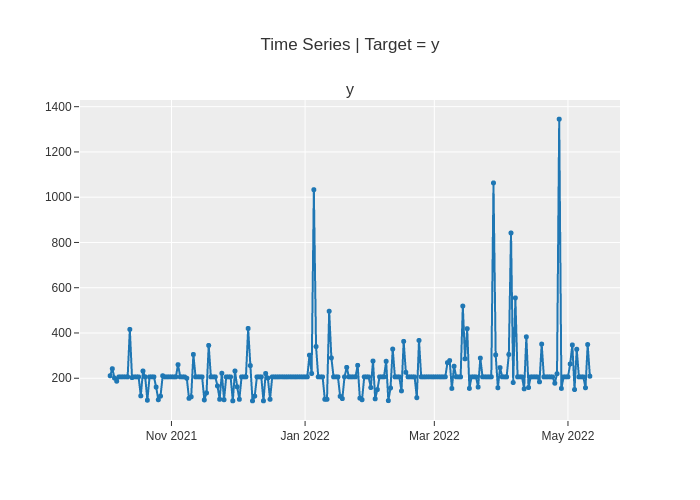

INFO:logs:Visual Rendered Successfully


In [ ]:
plot_model(plot = 'ts')

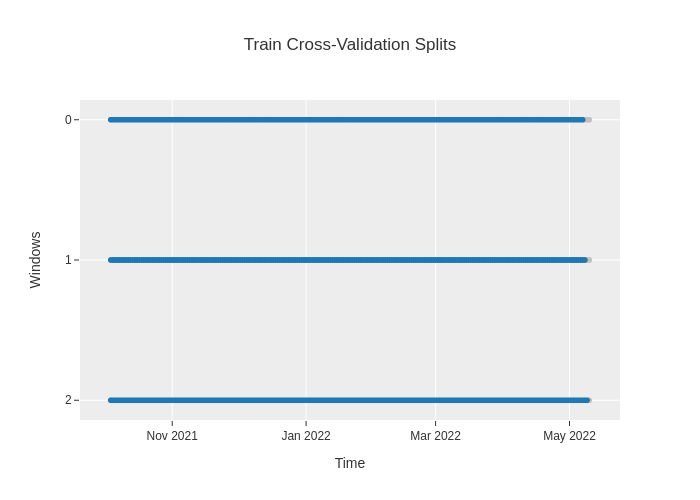

INFO:logs:Visual Rendered Successfully


In [ ]:
plot_model(plot = 'cv')

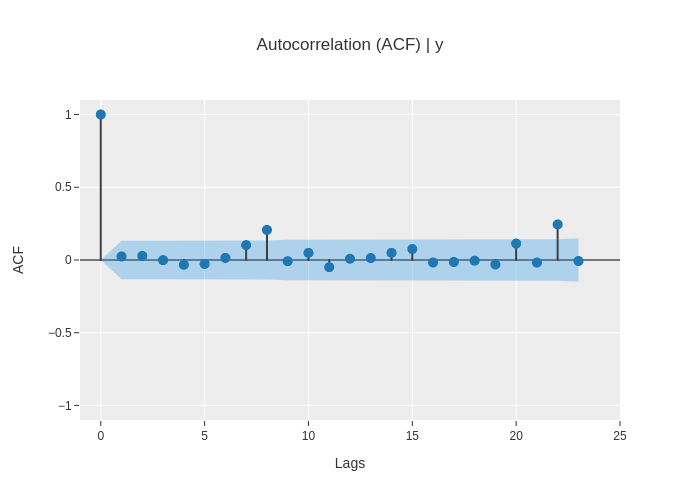

INFO:logs:Visual Rendered Successfully


In [ ]:
plot_model(plot = 'acf')

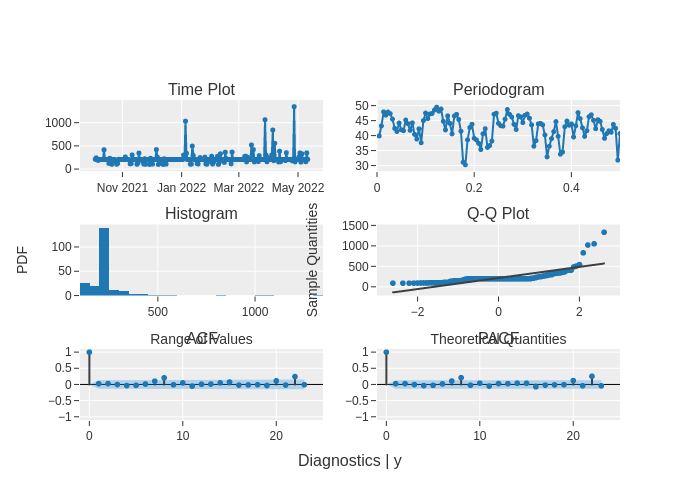

INFO:logs:Visual Rendered Successfully


In [ ]:
plot_model(plot = 'diagnostics')

In [ ]:
melhor = compare_models()

Model      MAE  \
dt_cds_dt        Decision Tree w/ Cond. Deseasonalize & Detrending  62.4483   
xgboost_cds_dt   Extreme Gradient Boosting w/ Cond. Deseasonali...  66.5867   
grand_means                                 Grand Means Forecaster  70.7503   
arima                                                        ARIMA  70.9993   
rf_cds_dt        Random Forest w/ Cond. Deseasonalize & Detrending  74.4503   
et_cds_dt          Extra Trees w/ Cond. Deseasonalize & Detrending  78.2865   
huber_cds_dt             Huber w/ Cond. Deseasonalize & Detrending  79.9111   
auto_arima                                              Auto ARIMA  84.4972   
knn_cds_dt         K Neighbors w/ Cond. Deseasonalize & Detrending  86.0591   
theta                                             Theta Forecaster  85.9274   
llar_cds_dt      Lasso Least Angular Regressor w/ Cond. Deseaso...  86.8325   
br_cds_dt        Bayesian Ridge w/ Cond. Deseasonalize & Detren...  86.8423   
polytrend                              Polynomial Trend Forecaster  86.8818   
lr_cds_dt               Linear w/ Cond. Deseasonalize & Detrending  87.0257   
en_cds_dt          Elastic Net w/ Cond. Deseasonalize & Detrending  87.0255   
lasso_cds_dt             Lasso w/ Cond. Deseasonalize & Detrending  87.0253   
lar_cds_dt       Least Angular Regressor w/ Cond. Deseasonalize...  87.0257   
ridge_cds_dt             Ridge w/ Cond. Deseasonalize & Detrending  87.0257   
omp_cds_dt       Orthogonal Matching Pursuit w/ Cond. Deseasona...  87.0257   
catboost_cds_dt  CatBoost Regressor w/ Cond. Deseasonalize & De...  87.0341   
lightgbm_cds_dt  Light Gradient Boosting w/ Cond. Deseasonalize...  88.1147   
croston                                                    Croston  88.4454   
ets                                                            ETS  89.2761   
exp_smooth                                   Exponential Smoothing  90.3066   
gbr_cds_dt       Gradient Boosting w/ Cond. Deseasonalize & Det...  93.5902   
ada_cds_dt            AdaBoost w/ Cond. Deseasonalize & Detrending  99.3498   
par_cds_dt       Passive Aggressive w/ Cond. Deseasonalize & De...   168.86   

                    RMSE    MAPE   SMAPE    MASE   RMSSE  TT (Sec)  
dt_cds_dt        62.4483  0.2351  0.2543  0.7215  0.3284    0.0700  
xgboost_cds_dt   66.5867  0.2556  0.2738   0.769  0.3501    0.5800  
grand_means      70.7503  0.2961  0.2934  0.8167  0.3718    0.0200  
arima            70.9993  0.2958  0.2944  0.8196  0.3732    0.1867  
rf_cds_dt        74.4503  0.3032  0.3092  0.8594  0.3913    0.3067  
et_cds_dt        78.2865   0.303  0.3278   0.904  0.4116    0.2367  
huber_cds_dt     79.9111  0.3635  0.3311  0.9218  0.4198    0.0667  
auto_arima       84.4972  0.4026  0.3478  0.9744  0.4437    2.3367  
knn_cds_dt       86.0591  0.4393  0.3522  0.9919  0.4518    0.1333  
theta            85.9274  0.4182  0.3526  0.9907  0.4512    0.0667  
llar_cds_dt      86.8325  0.4265  0.3556  1.0011  0.4559    0.0600  
br_cds_dt        86.8423  0.4266  0.3556  1.0012   0.456    0.0633  
polytrend        86.8818  0.4269  0.3558  1.0016  0.4562    0.0333  
lr_cds_dt        87.0257  0.4287  0.3562  1.0033  0.4569    0.1333  
en_cds_dt        87.0255  0.4287  0.3562  1.0033  0.4569    0.0633  
lasso_cds_dt     87.0253  0.4287  0.3562  1.0033  0.4569    0.0667  
lar_cds_dt       87.0257  0.4287  0.3562  1.0033  0.4569    0.0667  
ridge_cds_dt     87.0257  0.4287  0.3562  1.0033  0.4569    0.0733  
omp_cds_dt       87.0257  0.4287  0.3562  1.0033  0.4569    0.0700  
catboost_cds_dt  87.0341  0.3978  0.3586  1.0039  0.4571    0.8033  
lightgbm_cds_dt  88.1147  0.4307   0.359  1.0162  0.4628    0.2767  
croston          88.4454  0.4174  0.3626  1.0199  0.4645    0.0233  
ets              89.2761  0.4404   0.364  1.0292  0.4687    0.0633  
exp_smooth       90.3066  0.4285  0.3692  1.0413  0.4742    0.0400  
gbr_cds_dt       93.5902  0.4155   0.386  1.0796  0.4916    0.0933  
ada_cds_dt       99.3498  0.5065   0.396  1.1451  0.52

INFO:logs:master_model_container: 29
INFO:logs:display_container: 2
INFO:logs:BaseCdsDtForecaster(regressor=DecisionTreeRegressor(random_state=42),
                    window_length=1)
INFO:logs:compare_models() successfully completed......................................


In [ ]:
melhor

BaseCdsDtForecaster(regressor=DecisionTreeRegressor(random_state=42),
                    window_length=1)

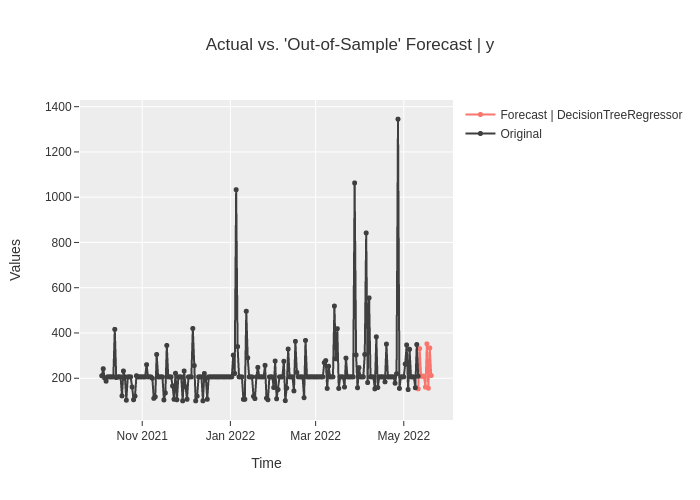

INFO:logs:Visual Rendered Successfully


In [ ]:
plot_model(melhor, plot = 'forecast', data_kwargs = {'fh': 10})

In [ ]:
prediction_holdout = predict_model(melhor);

INFO:logs:Preparing display monitor


Model      MAE     RMSE    MAPE   SMAPE    MASE  RMSSE
0  DecisionTreeRegressor  56.0603  56.0603  0.2682  0.3098  0.6444  0.295

In [ ]:
# generate predictions on the original dataset
predictions = predict_model(melhor)
predictions

INFO:logs:Preparing display monitor


Model      MAE     RMSE    MAPE   SMAPE    MASE  RMSSE
0  DecisionTreeRegressor  56.0603  56.0603  0.2682  0.3098  0.6444  0.295

y_pred
2022-05-11  152.9397

In [ ]:
final_best = finalize_model(melhor)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(self=<pycaret.time_series.forecasting.oop.TSForecastingExperiment object at 0x7fe1aa950210>, estimator=BaseCdsDtForecaster(regressor=DecisionTreeRegressor(random_state=42),
                    window_length=1), fit_kwargs=None, groups=None, model_only=True, experiment_custom_tags=None, display=None)
INFO:logs:Finalizing BaseCdsDtForecaster(regressor=DecisionTreeRegressor(random_state=42),
                    window_length=1)
INFO:logs:Initializing create_model()
INFO:logs:create_model(self=<pycaret.time_series.forecasting.oop.TSForecastingExperiment object at 0x7fe1aa950210>, estimator=BaseCdsDtForecaster(regressor=DecisionTreeRegressor(random_state=42),
                    window_length=1), fold=None, round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=True, probability_threshold=None, experiment_custom_tags=None, verbose=False, system=False, add_to_model_list=False, metrics=None, display=None

In [ ]:
save_model(final_best, 'my_best_model')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=BaseCdsDtForecaster(regressor=DecisionTreeRegressor(random_state=42),
                    window_length=1), model_name=my_best_model, prep_pipe_=None, verbose=True, use_case=MLUsecase.TIME_SERIES, kwargs={})
INFO:logs:Adding model into prep_pipe
INFO:logs:my_best_model.pkl saved in current working directory
INFO:logs:BaseCdsDtForecaster(regressor=DecisionTreeRegressor(random_state=42),
                    window_length=1)
INFO:logs:save_model() successfully completed......................................


Transformation Pipeline and Model Successfully Saved


(BaseCdsDtForecaster(regressor=DecisionTreeRegressor(random_state=42),
                     window_length=1),
 'my_best_model.pkl')

In [ ]:
loaded_model = load_model('my_best_model')

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=my_best_model, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded


In [ ]:
pred = predict_model(loaded_model, fh = 34)

In [ ]:
pred['data'] = pred.index

In [ ]:
pred.index = pd.Index(range(34))
pred

In [ ]:
df_test.index = pd.Index(range(34))
df_test

In [ ]:
df_test.dtypes

y                int64
data    datetime64[ns]
dtype: object

In [ ]:
pred.dtypes

y_pred           float64
data      datetime64[ns]
dtype: object

In [ ]:
df_test['data'] = pd.to_datetime(df_test['data'])
pred['data'] = pred['data'].dt.strftime('%Y-%m-%d')

In [ ]:
pred['data'] = pd.to_datetime(pred['data'])

In [ ]:
pred.shape, df_test.shape

((34, 2), (34, 2))

In [ ]:
novo = pd.merge(df_test, pred, how = 'outer', on = ['data'])
novo

y       data    y_pred
0   209.0 2022-05-11       NaN
1   153.0 2022-05-12  208.0601
2   294.0 2022-05-16  211.0601
3   153.0 2022-05-17  210.1202
4   161.0 2022-05-18  210.1202
5   159.0 2022-05-23  212.1803
6   156.0 2022-05-24  164.1803
7   506.0 2022-05-25  355.1803
8   251.0 2022-05-26  215.1803
9   254.0 2022-05-30  357.2404
10  636.0 2022-05-31  217.2404
11  255.0 2022-06-01  216.3005
12  254.0 2022-06-02  216.3005
13  218.0 2022-06-06  218.3606
14  330.0 2022-06-07  218.3606
15  169.0 2022-06-08  170.3606
16  270.0 2022-06-09  361.3606
17  251.0 2022-06-13  172.4208
18  280.0 2022-06-14  363.4208
19  205.0 2022-06-15       NaN
20  164.0 2022-06-16       NaN
21  167.0 2022-06-20       NaN
22  249.0 2022-06-21       NaN
23  154.0 2022-06-22       NaN
24  151.0 2022-06-27       NaN
25  320.0 2022-06-28       NaN
26  288.0 2022-06-29       NaN
27  250.0 2022-06-30       NaN
28  262.0 2022-07-04       NaN
29  286.0 2022-07-05       NaN
30  151.0 2022-07-06       NaN
31  200.0 2022-07-07       NaN
32  159.0 2022-07-11       NaN
33  299.0 2022-07-12       NaN
34    NaN 2022-05-13  208.0601
35    NaN 2022-05-14  160.0601
36    NaN 2022-05-15  351.0601
37    NaN 2022-05-19  162.1202
38    NaN 2022-05-20  353.1202
39    NaN 2022-05-21  213.1202
40    NaN 2022-05-22  212.1803
41    NaN 2022-05-27  214.2404
42    NaN 2022-05-28  214.2404
43    NaN 2022-05-29  166.2404
44    NaN 2022-06-03  168.3005
45    NaN 2022-06-04  359.3005
46    NaN 2022-06-05  219.3005
47    NaN 2022-06-10  221.3606
48    NaN 2022-06-11  220.4208
49    NaN 2022-06-12  220.4208

In [ ]:
novo['diferenca'] = abs(novo['y'] - novo['y_pred'])

In [ ]:
novo

y       data    y_pred  diferenca
0   209.0 2022-05-11       NaN        NaN
1   153.0 2022-05-12  208.0601    55.0601
2   294.0 2022-05-16  211.0601    82.9399
3   153.0 2022-05-17  210.1202    57.1202
4   161.0 2022-05-18  210.1202    49.1202
5   159.0 2022-05-23  212.1803    53.1803
6   156.0 2022-05-24  164.1803     8.1803
7   506.0 2022-05-25  355.1803   150.8197
8   251.0 2022-05-26  215.1803    35.8197
9   254.0 2022-05-30  357.2404   103.2404
10  636.0 2022-05-31  217.2404   418.7596
11  255.0 2022-06-01  216.3005    38.6995
12  254.0 2022-06-02  216.3005    37.6995
13  218.0 2022-06-06  218.3606     0.3606
14  330.0 2022-06-07  218.3606   111.6394
15  169.0 2022-06-08  170.3606     1.3606
16  270.0 2022-06-09  361.3606    91.3606
17  251.0 2022-06-13  172.4208    78.5792
18  280.0 2022-06-14  363.4208    83.4208
19  205.0 2022-06-15       NaN        NaN
20  164.0 2022-06-16       NaN        NaN
21  167.0 2022-06-20       NaN        NaN
22  249.0 2022-06-21       NaN        NaN
23  154.0 2022-06-22       NaN        NaN
24  151.0 2022-06-27       NaN        NaN
25  320.0 2022-06-28       NaN        NaN
26  288.0 2022-06-29       NaN        NaN
27  250.0 2022-06-30       NaN        NaN
28  262.0 2022-07-04       NaN        NaN
29  286.0 2022-07-05       NaN        NaN
30  151.0 2022-07-06       NaN        NaN
31  200.0 2022-07-07       NaN        NaN
32  159.0 2022-07-11       NaN        NaN
33  299.0 2022-07-12       NaN        NaN
34    NaN 2022-05-13  208.0601        NaN
35    NaN 2022-05-14  160.0601        NaN
36    NaN 2022-05-15  351.0601        NaN
37    NaN 2022-05-19  162.1202        NaN
38    NaN 2022-05-20  353.1202        NaN
39    NaN 2022-05-21  213.1202        NaN
40    NaN 2022-05-22  212.1803        NaN
41    NaN 2022-05-27  214.2404        NaN
42    NaN 2022-05-28  214.2404        NaN
43    NaN 2022-05-29  166.2404        NaN
44    NaN 2022-06-03  168.3005        NaN
45    NaN 2022-06-04  359.3005        NaN
46    NaN 2022-06-05  219.3005        NaN
47    NaN 2022-06-10  221.3606        NaN
48    NaN 2022-06-11  220.4208        NaN
49    NaN 2022-06-12  220.4208        NaN

In [ ]:
novo = novo.dropna()
novo

y       data    y_pred  diferenca
1   153.0 2022-05-12  208.0601    55.0601
2   294.0 2022-05-16  211.0601    82.9399
3   153.0 2022-05-17  210.1202    57.1202
4   161.0 2022-05-18  210.1202    49.1202
5   159.0 2022-05-23  212.1803    53.1803
6   156.0 2022-05-24  164.1803     8.1803
7   506.0 2022-05-25  355.1803   150.8197
8   251.0 2022-05-26  215.1803    35.8197
9   254.0 2022-05-30  357.2404   103.2404
10  636.0 2022-05-31  217.2404   418.7596
11  255.0 2022-06-01  216.3005    38.6995
12  254.0 2022-06-02  216.3005    37.6995
13  218.0 2022-06-06  218.3606     0.3606
14  330.0 2022-06-07  218.3606   111.6394
15  169.0 2022-06-08  170.3606     1.3606
16  270.0 2022-06-09  361.3606    91.3606
17  251.0 2022-06-13  172.4208    78.5792
18  280.0 2022-06-14  363.4208    83.4208

In [ ]:
y_true = novo['y']
y_predict = novo['y_pred']

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_true, y_predict))
print('MSE:', metrics.mean_squared_error(y_true, y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_true, y_predict)))
print('R:', metrics.r2_score(y_true, y_predict))
MAPE = np.mean(100 * (np.abs(y_true-y_predict)/y_true))
acc = 100 - MAPE
print(f'Acurácia de {acc:.2f}')

MAE: 80.96447777777777
MSE: 14744.09724511111
RMSE: 121.4252743258631
R: 0.02498946685106551


<AxesSubplot:xlabel='diferenca', ylabel='Count'>

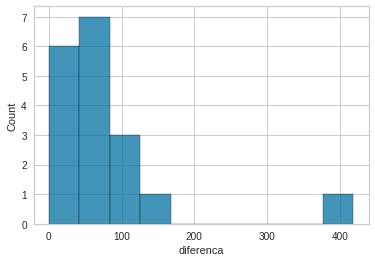

In [ ]:
sns.histplot(novo['diferenca'], bins=10)

Text(0, 0.5, 'y predito')

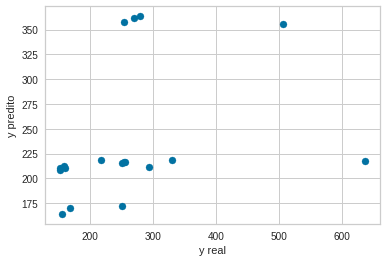

In [ ]:
plt.scatter(y_true, y_predict)
plt.xlabel('y real')
plt.ylabel('y predito')

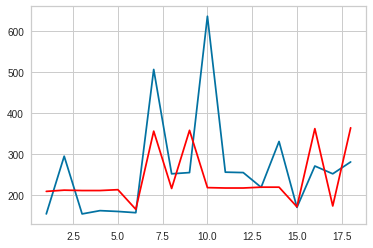

In [ ]:
# plot o valor real (test) e as predições 
plt.plot(y_true) 
plt.plot(y_predict, color='red')
plt.show()

In [ ]:
y_true.median()

252.5

In [ ]:
y_predict.median()

215.7404

### **Prophet**

In [ ]:
df_train.head()

y       data
0  211 2021-10-04
1  242 2021-10-05
2  201 2021-10-06
3  187 2021-10-07
4  416 2021-10-13

In [ ]:
# ds: features temporais
# y: valores a serem preditos

dataframe = df_train.copy()
dataframe['ds'] = dataframe['data']
dataframe = dataframe.drop(columns = ['data'])
dataframe.head()

y         ds
0  211 2021-10-04
1  242 2021-10-05
2  201 2021-10-06
3  187 2021-10-07
4  416 2021-10-13

In [ ]:
# instancia o objeto prophet
model = prophet.Prophet()

NameError: ignored

In [ ]:
# gerando o modelo
model.fit(dataframe)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphdeb3hzb/17s5tg_h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphdeb3hzb/wo9hy4ds.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79313', 'data', 'file=/tmp/tmphdeb3hzb/17s5tg_h.json', 'init=/tmp/tmphdeb3hzb/wo9hy4ds.json', 'output', 'file=/tmp/tmpdbyi42t_/prophet_model-20220812145152.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:51:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:51:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# gerando dados futuros
futuro = model.make_future_dataframe(periods = 33, freq='M')

In [ ]:
futuro

ds
0   2021-10-04
1   2021-10-05
2   2021-10-06
3   2021-10-07
4   2021-10-13
..         ...
128 2024-09-30
129 2024-10-31
130 2024-11-30
131 2024-12-31
132 2025-01-31

[133 rows x 1 columns]

In [ ]:
# prevendo valores para dados futuros
saida = model.predict(futuro)

In [ ]:
# imprime saidas
saida.head()

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2021-10-04  175.642205  -93.365068  380.379777   175.642205   175.642205   
1 2021-10-05  176.446656  -68.634841  434.669360   176.446656   176.446656   
2 2021-10-06  177.251108  -49.745667  439.524510   177.251108   177.251108   
3 2021-10-07  178.055559 -106.859557  385.210945   178.055559   178.055559   
4 2021-10-13  182.882267  -48.542231  439.773800   182.882267   182.882267   

   additive_terms  additive_terms_lower  additive_terms_upper     weekly  \
0      -35.645612            -35.645612            -35.645612 -35.645612   
1       -9.485390             -9.485390             -9.485390  -9.485390   
2       19.264265             19.264265             19.264265  19.264265   
3      -26.843107            -26.843107            -26.843107 -26.843107   
4       19.264265             19.264265             19.264265  19.264265   

   weekly_lower  weekly_upper  multiplicative_terms  \
0    -35.645612    -35.645612                   0.0   
1     -9.485390     -9.485390                   0.0   
2     19.264265     19.264265                   0.0   
3    -26.843107    -26.843107                   0.0   
4     19.264265     19.264265                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper        yhat  
0                         0.0                         0.0  139.996593  
1                         0.0                         0.0  166.961266  
2                         0.0                         0.0  196.515373  
3                         0.0                         0.0  151.212452  
4                         0.0                         0.0  202.146533

In [ ]:
saida[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

ds         yhat  yhat_lower   yhat_upper
126 2024-07-31  1031.894471  789.190385  1269.162199
127 2024-08-31  1055.396759  830.148814  1308.828000
128 2024-09-30  1026.564926  787.242902  1261.350195
129 2024-10-31  1060.563994  839.121855  1299.708631
130 2024-11-30  1129.360861  885.642022  1367.433666
131 2024-12-31  1127.502043  877.748879  1362.005229
132 2025-01-31  1179.753934  941.993715  1422.693205

**Validando o modelo com Prophet**

In [ ]:
df_test.head()

y       data
0  209 2022-05-11
1  153 2022-05-12
2  294 2022-05-16
3  153 2022-05-17
4  161 2022-05-18

In [ ]:
# dataset de validação
validation_df = pd.DataFrame({'ds': df_test['data']})

In [ ]:
# dados temporais
validation_df['ds']

0    2022-05-11
1    2022-05-12
2    2022-05-16
3    2022-05-17
4    2022-05-18
5    2022-05-23
6    2022-05-24
7    2022-05-25
8    2022-05-26
9    2022-05-30
10   2022-05-31
11   2022-06-01
12   2022-06-02
13   2022-06-06
14   2022-06-07
15   2022-06-08
16   2022-06-09
17   2022-06-13
18   2022-06-14
19   2022-06-15
20   2022-06-16
21   2022-06-20
22   2022-06-21
23   2022-06-22
24   2022-06-27
25   2022-06-28
26   2022-06-29
27   2022-06-30
28   2022-07-04
29   2022-07-05
30   2022-07-06
31   2022-07-07
32   2022-07-11
33   2022-07-12
Name: ds, dtype: datetime64[ns]

In [ ]:
# aplicando o modelo do prophet
saida = model.predict(validation_df)

In [ ]:
# imprime as saidas
saida[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

ds        yhat  yhat_lower  yhat_upper
0  2022-05-11  371.907097  125.814664  611.915783
1  2022-05-12  326.612517  106.300281  553.079743
2  2022-05-16  321.061181   91.222852  565.459560
3  2022-05-17  348.034195  107.590869  584.581328
4  2022-05-18  377.596643  133.008633  619.485210
5  2022-05-23  326.750727   86.353446  560.814448
6  2022-05-24  353.723742  123.054291  580.023747
7  2022-05-25  383.286189  152.270679  613.915358
8  2022-05-26  337.991610   99.214024  581.776014
9  2022-05-30  332.440273   78.291832  563.404267
10 2022-05-31  359.413288  129.558191  615.320013
11 2022-06-01  388.975736  142.664664  609.602549
12 2022-06-02  343.681156   94.788161  585.427646
13 2022-06-06  338.129820  106.780892  563.264009
14 2022-06-07  365.102834  124.071938  608.028114
15 2022-06-08  394.665282  149.273572  638.329573
16 2022-06-09  349.370702  117.454467  590.000507
17 2022-06-13  343.819366  100.702390  573.784416
18 2022-06-14  370.792381  138.324385  612.943599
19 2022-06-15  400.354828  160.202776  632.956030
20 2022-06-16  355.060249  121.197405  582.576230
21 2022-06-20  349.508912  102.681402  599.870933
22 2022-06-21  376.481927  136.184889  621.991610
23 2022-06-22  406.044375  174.241075  650.804635
24 2022-06-27  355.198459  132.044878  591.783021
25 2022-06-28  382.171473  147.633390  617.233291
26 2022-06-29  411.733921  166.742718  642.456017
27 2022-06-30  366.439341  124.748155  600.632268
28 2022-07-04  360.888005  124.689408  607.600290
29 2022-07-05  387.861020  156.316804  622.205276
30 2022-07-06  417.423467  169.716411  660.113728
31 2022-07-07  372.128888  132.882556  618.029493
32 2022-07-11  366.577551  135.144187  585.047070
33 2022-07-12  393.550566  163.715761  625.268797

In [ ]:
df_test

y       data
0   209 2022-05-11
1   153 2022-05-12
2   294 2022-05-16
3   153 2022-05-17
4   161 2022-05-18
5   159 2022-05-23
6   156 2022-05-24
7   506 2022-05-25
8   251 2022-05-26
9   254 2022-05-30
10  636 2022-05-31
11  255 2022-06-01
12  254 2022-06-02
13  218 2022-06-06
14  330 2022-06-07
15  169 2022-06-08
16  270 2022-06-09
17  251 2022-06-13
18  280 2022-06-14
19  205 2022-06-15
20  164 2022-06-16
21  167 2022-06-20
22  249 2022-06-21
23  154 2022-06-22
24  151 2022-06-27
25  320 2022-06-28
26  288 2022-06-29
27  250 2022-06-30
28  262 2022-07-04
29  286 2022-07-05
30  151 2022-07-06
31  200 2022-07-07
32  159 2022-07-11
33  299 2022-07-12

In [ ]:
print('MAE:', metrics.mean_absolute_error(df_test.y, saida.yhat))
print('MSE:', metrics.mean_squared_error(df_test.y, saida.yhat))
print('RMSE:', np.sqrt(metrics.mean_squared_error(df_test.y, saida.yhat)))
print('R:', metrics.r2_score(df_test.y, saida.yhat))

MAE: 146.1581990367783
MSE: 25458.705744965337
RMSE: 159.5578445109025
R: -1.5324198324797296


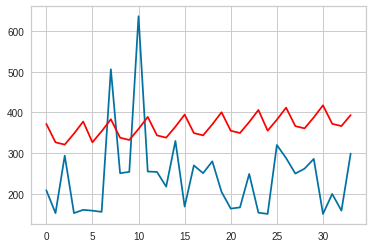

In [ ]:
# plot o valor real (test) e as predições 
plt.plot(df_test.y) 
plt.plot(saida.yhat, color='red')
plt.show()

### **Média móvel**

In [ ]:
df_1.head()

y
data           
2021-10-04  211
2021-10-05  242
2021-10-06  201
2021-10-07  187
2021-10-13  416

In [ ]:
# Define uma janela de 3 elementos
window = 3

In [ ]:
# Obtem os 3 primeiros valores da serie
history = [df_1.values[i] for i in range(window)]

In [ ]:
# imprime a variável history
history

[array([211]), array([242]), array([201])]

In [ ]:
# Obtem todos os valores após os tres primeiros.
# range(3, tamanho_da_serie)

test = [df_1.values[i] for i in range(window, len(df_1.values))]

In [ ]:
# imprime a variável test
# 10 primeiros valores da série após o history


array([416])

In [ ]:
# serie original
df_1.values

array([[ 211],
       [ 242],
       [ 201],
       [ 187],
       [ 416],
       [ 203],
       [ 122],
       [ 232],
       [ 103],
       [ 161],
       [ 105],
       [ 121],
       [ 211],
       [ 206],
       [ 260],
       [ 200],
       [ 111],
       [ 118],
       [ 305],
       [ 104],
       [ 135],
       [ 345],
       [ 166],
       [ 107],
       [ 222],
       [ 105],
       [ 100],
       [ 232],
       [ 162],
       [ 107],
       [ 420],
       [ 256],
       [ 100],
       [ 121],
       [ 100],
       [ 221],
       [ 201],
       [ 107],
       [ 302],
       [ 221],
       [1033],
       [ 340],
       [ 107],
       [ 107],
       [ 496],
       [ 290],
       [ 120],
       [ 110],
       [ 248],
       [ 206],
       [ 257],
       [ 112],
       [ 105],
       [ 159],
       [ 276],
       [ 109],
       [ 150],
       [ 275],
       [ 101],
       [ 157],
       [ 329],
       [ 144],
       [ 363],
       [ 226],
       [ 114],
       [ 367],
       [ 2

In [ ]:
# Define uma variavel chamada X que é a copia da serie de dados
X = df_1.values

# Define a variável window = 3 que será a janela de 3 valroes
window = 3

# Obtem os 3 primeiros valores da serie
history = [X[i] for i in range(window)]

# Obtem todos os valores após os tres primeiros.
test = [X[i] for i in range(window, len(X))]

# cria lista de predições
predicoes = []

# Itera sobre os dados de teste...

for t in range(len(test)):
  # define a variavel length com o tamanho da variável history
  length = len(history)
  
  # define a variável valor_predito com a média dos 3 valores correntes..                                                           
  valor_predito = np.mean([history[i] for i in range(length - window, length)])        
  
  # define a variável valor_real com o valor atual do teste..
  valor_real = test[t]                                                              
  
  # alimenta a lista de predicoes
  predicoes.append(valor_predito)                                                  
  
  # atualiza a lista history com os valores correntes..
  history.append(valor_real)                                                        
  
  # imprime o valor predito e o real...
  print('Valor predito=%f, Valor real=%f' % (valor_predito, valor_real))                 

Valor predito=218.000000, Valor real=187.000000
Valor predito=210.000000, Valor real=416.000000
Valor predito=268.000000, Valor real=203.000000
Valor predito=268.666667, Valor real=122.000000
Valor predito=247.000000, Valor real=232.000000
Valor predito=185.666667, Valor real=103.000000
Valor predito=152.333333, Valor real=161.000000
Valor predito=165.333333, Valor real=105.000000
Valor predito=123.000000, Valor real=121.000000
Valor predito=129.000000, Valor real=211.000000
Valor predito=145.666667, Valor real=206.000000
Valor predito=179.333333, Valor real=260.000000
Valor predito=225.666667, Valor real=200.000000
Valor predito=222.000000, Valor real=111.000000
Valor predito=190.333333, Valor real=118.000000
Valor predito=143.000000, Valor real=305.000000
Valor predito=178.000000, Valor real=104.000000
Valor predito=175.666667, Valor real=135.000000
Valor predito=181.333333, Valor real=345.000000
Valor predito=194.666667, Valor real=166.000000
Valor predito=215.333333, Valor real=107

In [ ]:
predicoes

[218.0,
 210.0,
 268.0,
 268.6666666666667,
 247.0,
 185.66666666666666,
 152.33333333333334,
 165.33333333333334,
 123.0,
 129.0,
 145.66666666666666,
 179.33333333333334,
 225.66666666666666,
 222.0,
 190.33333333333334,
 143.0,
 178.0,
 175.66666666666666,
 181.33333333333334,
 194.66666666666666,
 215.33333333333334,
 206.0,
 165.0,
 144.66666666666666,
 142.33333333333334,
 145.66666666666666,
 164.66666666666666,
 167.0,
 229.66666666666666,
 261.0,
 258.6666666666667,
 159.0,
 107.0,
 147.33333333333334,
 174.0,
 176.33333333333334,
 203.33333333333334,
 210.0,
 518.6666666666666,
 531.3333333333334,
 493.3333333333333,
 184.66666666666666,
 236.66666666666666,
 297.6666666666667,
 302.0,
 173.33333333333334,
 159.33333333333334,
 188.0,
 237.0,
 191.66666666666666,
 158.0,
 125.33333333333333,
 180.0,
 181.33333333333334,
 178.33333333333334,
 178.0,
 175.33333333333334,
 177.66666666666666,
 195.66666666666666,
 210.0,
 278.6666666666667,
 244.33333333333334,
 234.333333333333

In [ ]:
dff = pd.DataFrame(test, columns=['teste'])

In [ ]:
dff['predicoes'] = predicoes

In [ ]:
dff

teste   predicoes
0     187  218.000000
1     416  210.000000
2     203  268.000000
3     122  268.666667
4     232  247.000000
5     103  185.666667
6     161  152.333333
7     105  165.333333
8     121  123.000000
9     211  129.000000
10    206  145.666667
11    260  179.333333
12    200  225.666667
13    111  222.000000
14    118  190.333333
15    305  143.000000
16    104  178.000000
17    135  175.666667
18    345  181.333333
19    166  194.666667
20    107  215.333333
21    222  206.000000
22    105  165.000000
23    100  144.666667
24    232  142.333333
25    162  145.666667
26    107  164.666667
27    420  167.000000
28    256  229.666667
29    100  261.000000
30    121  258.666667
31    100  159.000000
32    221  107.000000
33    201  147.333333
34    107  174.000000
35    302  176.333333
36    221  203.333333
37   1033  210.000000
38    340  518.666667
39    107  531.333333
40    107  493.333333
41    496  184.666667
42    290  236.666667
43    120  297.666667
44    110  302.000000
45    248  173.333333
46    206  159.333333
47    257  188.000000
48    112  237.000000
49    105  191.666667
50    159  158.000000
51    276  125.333333
52    109  180.000000
53    150  181.333333
54    275  178.333333
55    101  178.000000
56    157  175.333333
57    329  177.666667
58    144  195.666667
59    363  210.000000
60    226  278.666667
61    114  244.333333
62    367  234.333333
63    269  235.666667
64    278  250.000000
65    155  304.666667
66    253  234.000000
67    519  228.666667
68    286  309.000000
69    419  352.666667
70    155  408.000000
71    161  286.666667
72    289  245.000000
73   1063  201.666667
74    303  504.333333
75    158  551.666667
76    247  508.000000
77    305  236.000000
78    842  236.666667
79    181  464.666667
80    555  442.666667
81    153  526.000000
82    383  296.333333
83    159  363.666667
84    184  231.666667
85    351  242.000000
86    178  231.333333
87    220  237.666667
88   1345  249.666667
89    155  581.000000
90    263  573.333333
91    347  587.666667
92    150  255.000000
93    328  253.333333
94    158  275.000000
95    349  212.000000
96    209  278.333333

In [ ]:
print('MAE:', metrics.mean_absolute_error(dff['teste'], dff['predicoes']))
print('MSE:', metrics.mean_squared_error(dff['teste'], dff['predicoes']))
print('RMSE:', np.sqrt(metrics.mean_squared_error(dff['teste'], dff['predicoes'])))
print('R:', metrics.r2_score(dff['teste'], dff['predicoes']))    
MAPE = np.mean(100 * (np.abs(dff['teste']-dff['predicoes'])/dff['teste']))
acc = 100 - MAPE
print(f'Acurácia de {acc:.2f}')

MAE: 147.213058419244
MSE: 53488.553264604816
RMSE: 231.2759245243759
R: -0.32212034333842166
Acurácia de 33.93


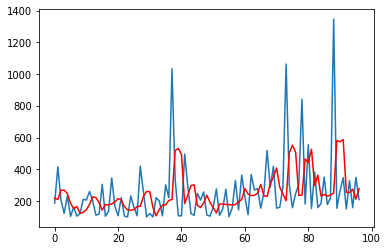

In [ ]:
# plot o valor real (test) e as predições 
plt.plot(test) 
plt.plot(predicoes, color='red')
plt.show()

### **Média móvel 2 dias**

In [ ]:
df_1.head()

y
data           
2021-10-04  211
2021-10-05  242
2021-10-06  201
2021-10-07  187
2021-10-13  416

In [ ]:
# Define uma janela de 2 elementos
window = 2

In [ ]:
# Obtem os 3 primeiros valores da serie
history = [df_1.values[i] for i in range(window)]

In [ ]:
# imprime a variável history
history

[array([211]), array([242])]

In [ ]:
# Obtem todos os valores após os tres primeiros.
# range(3, tamanho_da_serie)

test = [df_1.values[i] for i in range(window, len(df_1.values))]

In [ ]:
# Define uma variavel chamada X que é a copia da serie de dados
X = df_1.values

# Define a variável window = 3 que será a janela de 2 valores
window = 2

# Obtem os 2 primeiros valores da serie
history = [X[i] for i in range(window)]

# Obtem todos os valores após os 2 primeiros.
test = [X[i] for i in range(window, len(X))]

# cria lista de predições
predicoes = []

# Itera sobre os dados de teste...

for t in range(len(test)):
  # define a variavel length com o tamanho da variável history
  length = len(history)
  
  # define a variável valor_predito com a média dos 2 valores correntes..                                                           
  valor_predito = np.mean([history[i] for i in range(length - window, length)])        
  
  # define a variável valor_real com o valor atual do teste..
  valor_real = test[t]                                                              
  
  # alimenta a lista de predicoes
  predicoes.append(valor_predito)                                                  
  
  # atualiza a lista history com os valores correntes..
  history.append(valor_real)                                                        
  
  # imprime o valor predito e o real...
  print('Valor predito=%f, Valor real=%f' % (valor_predito, valor_real))                 

Valor predito=226.500000, Valor real=201.000000
Valor predito=221.500000, Valor real=187.000000
Valor predito=194.000000, Valor real=416.000000
Valor predito=301.500000, Valor real=203.000000
Valor predito=309.500000, Valor real=122.000000
Valor predito=162.500000, Valor real=232.000000
Valor predito=177.000000, Valor real=103.000000
Valor predito=167.500000, Valor real=161.000000
Valor predito=132.000000, Valor real=105.000000
Valor predito=133.000000, Valor real=121.000000
Valor predito=113.000000, Valor real=211.000000
Valor predito=166.000000, Valor real=206.000000
Valor predito=208.500000, Valor real=260.000000
Valor predito=233.000000, Valor real=200.000000
Valor predito=230.000000, Valor real=111.000000
Valor predito=155.500000, Valor real=118.000000
Valor predito=114.500000, Valor real=305.000000
Valor predito=211.500000, Valor real=104.000000
Valor predito=204.500000, Valor real=135.000000
Valor predito=119.500000, Valor real=345.000000
Valor predito=240.000000, Valor real=166

In [ ]:
dff2 = pd.DataFrame(test, columns=['teste'])

In [ ]:
dff2['predicoes'] = predicoes

In [ ]:
dff2

teste  predicoes
0     201      226.5
1     187      221.5
2     416      194.0
3     203      301.5
4     122      309.5
5     232      162.5
6     103      177.0
7     161      167.5
8     105      132.0
9     121      133.0
10    211      113.0
11    206      166.0
12    260      208.5
13    200      233.0
14    111      230.0
15    118      155.5
16    305      114.5
17    104      211.5
18    135      204.5
19    345      119.5
20    166      240.0
21    107      255.5
22    222      136.5
23    105      164.5
24    100      163.5
25    232      102.5
26    162      166.0
27    107      197.0
28    420      134.5
29    256      263.5
30    100      338.0
31    121      178.0
32    100      110.5
33    221      110.5
34    201      160.5
35    107      211.0
36    302      154.0
37    221      204.5
38   1033      261.5
39    340      627.0
40    107      686.5
41    107      223.5
42    496      107.0
43    290      301.5
44    120      393.0
45    110      205.0
46    248      115.0
47    206      179.0
48    257      227.0
49    112      231.5
50    105      184.5
51    159      108.5
52    276      132.0
53    109      217.5
54    150      192.5
55    275      129.5
56    101      212.5
57    157      188.0
58    329      129.0
59    144      243.0
60    363      236.5
61    226      253.5
62    114      294.5
63    367      170.0
64    269      240.5
65    278      318.0
66    155      273.5
67    253      216.5
68    519      204.0
69    286      386.0
70    419      402.5
71    155      352.5
72    161      287.0
73    289      158.0
74   1063      225.0
75    303      676.0
76    158      683.0
77    247      230.5
78    305      202.5
79    842      276.0
80    181      573.5
81    555      511.5
82    153      368.0
83    383      354.0
84    159      268.0
85    184      271.0
86    351      171.5
87    178      267.5
88    220      264.5
89   1345      199.0
90    155      782.5
91    263      750.0
92    347      209.0
93    150      305.0
94    328      248.5
95    158      239.0
96    349      243.0
97    209      253.5

In [ ]:
print('MAE:', metrics.mean_absolute_error(dff2['teste'], dff2['predicoes']))
print('MSE:', metrics.mean_squared_error(dff2['teste'], dff2['predicoes']))
print('RMSE:', np.sqrt(metrics.mean_squared_error(dff2['teste'], dff2['predicoes'])))
print('R:', metrics.r2_score(dff2['teste'], dff2['predicoes']))    
MAPE = np.mean(100 * (np.abs(dff2['teste']-dff2['predicoes'])/dff2['teste']))
acc = 100 - MAPE
print(f'Acurácia de {acc:.2f}')

MAE: 156.75510204081633
MSE: 60548.704081632655
RMSE: 246.06646273239403
R: -0.511020291581177
Acurácia de 29.18


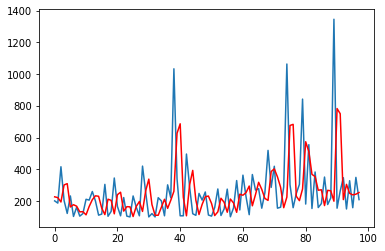

In [ ]:
# plot o valor real (test) e as predições 
plt.plot(test) 
plt.plot(predicoes, color='red')
plt.show()

### Sazonalidade

In [ ]:
df_1.head()

y
data           
2021-10-04  211
2021-10-05  242
2021-10-06  201
2021-10-07  187
2021-10-13  416

In [ ]:
resultados = seasonal_decompose(df_1.y, period=7)
resultados

In [ ]:
def plot_graph(y1, y2, y3, cor1, cor2, cor3, label1, label2, label3):
    plt.figure(figsize=(20, 7))
    plt.plot(y1,color=cor1, label=label1)
    plt.plot(y2, color=cor2, label=label2)
    plt.plot(y3, color=cor3, label=label3)
    plt.legend(fontsize=18)

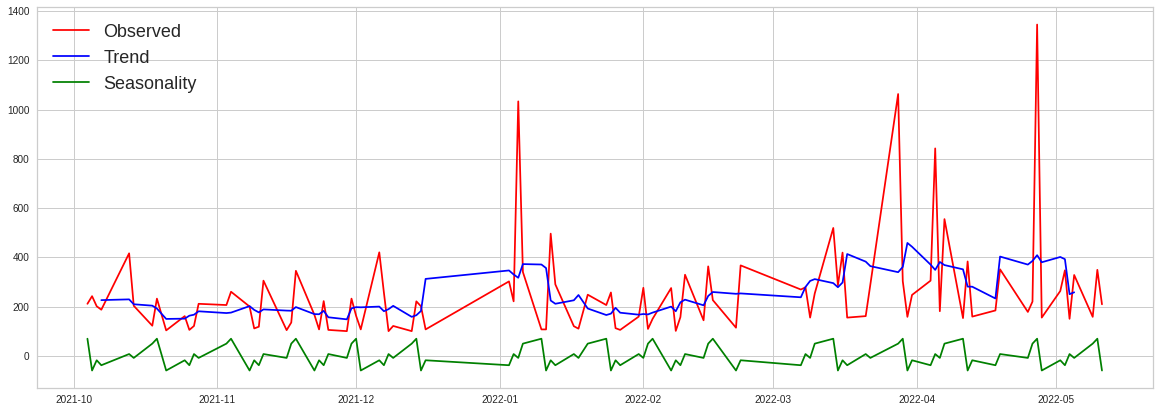

In [ ]:
plot_graph(resultados.observed, resultados.trend, resultados.seasonal, 'red','blue','green',
      'Observed','Trend','Seasonality')

In [ ]:
dataframe['codvendedor'].value_counts()

303    133
302    133
102    130
106    129
101    124
209    123
203    121
208    112
205    103
201     91
109     49
207     47
104     30
103     26
Name: codvendedor, dtype: int64

In [ ]:
df_302 = dataframe[dataframe['codvendedor'] == 302]
df_102 = dataframe[dataframe['codvendedor'] == 102]

In [ ]:
df_302.index = pd.to_datetime(df_302['data'])
df_102.index = pd.to_datetime(df_102['data'])

In [ ]:
df_302.head()

Unnamed: 0             _id  codvendedor  vltotal  vltabela  \
data                                                                     
2021-10-04         196  302_2021-10-04          302      570       582   
2021-10-05         200  302_2021-10-05          302      251       251   
2021-10-06         208  302_2021-10-06          302      270       261   
2021-10-07         222  302_2021-10-07          302      143       143   
2021-10-13         232  302_2021-10-13          302      295       295   

            codigo01  codigo02        data tipometa tipodados  ...  \
data                                                           ...   
2021-10-04       NaN       NaN  2021-10-04      NaN       NaN  ...   
2021-10-05       NaN       NaN  2021-10-05      NaN       NaN  ...   
2021-10-06       NaN       NaN  2021-10-06      NaN       NaN  ...   
2021-10-07       NaN       NaN  2021-10-07      NaN       NaN  ...   
2021-10-13       NaN       NaN  2021-10-13      NaN       NaN  ...   

            vltotal_112  vltotal_113  vltotal_114  vltotal_115  vltotal_116  \
data                                                                          
2021-10-04            0            0            0            0            0   
2021-10-05            0            0            0            0            0   
2021-10-06            0            0            0            0            0   
2021-10-07            0            0            0            0            0   
2021-10-13            0            0            0            0            0   

            vltotal_117  vltotal_118  vltotal_119  vltotal_120  vltotal_121  
data                                                                         
2021-10-04            0            0            0            0            0  
2021-10-05            0            0            0            0            0  
2021-10-06            0            0            0            0            0  
2021-10-07            0            0            0            0            0  
2021-10-13            0            0            0            0            0  

[5 rows x 167 columns]

In [ ]:
resultados_302 = seasonal_decompose(df_302.y, period=7)
resultados_102 = seasonal_decompose(df_102.y, period=7)

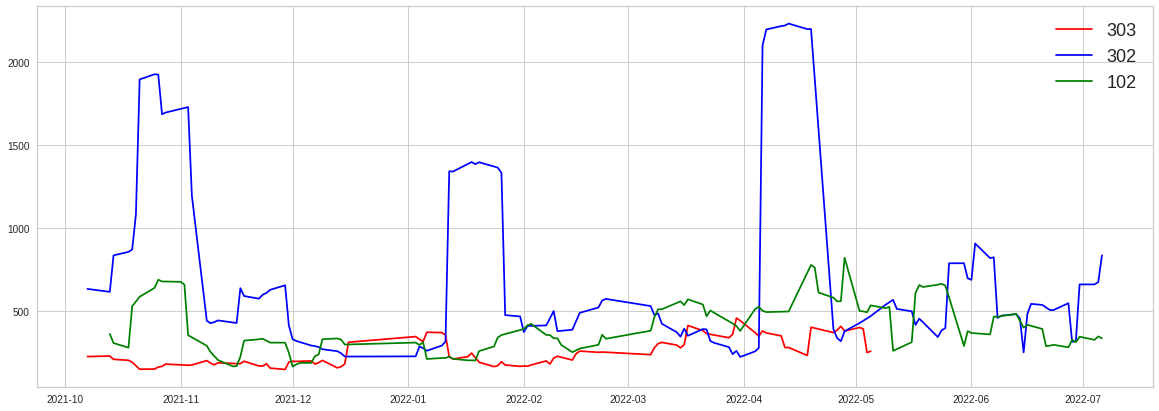

In [ ]:
plot_graph(resultados.trend, resultados_302.trend, resultados_102.trend, 'red', 'blue', 'green',
      '303', '302', '102')

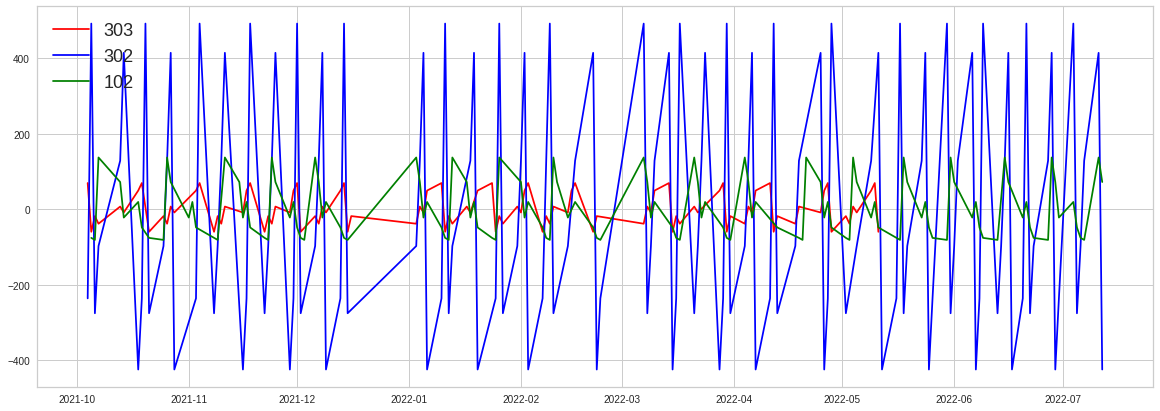

In [ ]:
plot_graph(resultados.seasonal, resultados_302.seasonal, resultados_102.seasonal, 'red', 'blue', 'green','303', '302', '102')

### **LSTM**

In [ ]:
dataset = df_303[['y']]
dataset.head()

y
194  211
199  242
211  201
221  187
231  416

In [ ]:
dataset.shape

(133, 1)

In [ ]:
dataset.index = pd.Index(range(133))
dataset

y
0     211
1     242
2     201
3     187
4     416
5     203
6     122
7     232
8     103
9     161
10    105
11    121
12    211
13    206
14    260
15    200
16    111
17    118
18    305
19    104
20    135
21    345
22    166
23    107
24    222
25    105
26    100
27    232
28    162
29    107
30    420
31    256
32    100
33    121
34    100
35    221
36    201
37    107
38    302
39    221
40   1033
41    340
42    107
43    107
44    496
45    290
46    120
47    110
48    248
49    206
50    257
51    112
52    105
53    159
54    276
55    109
56    150
57    275
58    101
59    157
60    329
61    144
62    363
63    226
64    114
65    367
66    269
67    278
68    155
69    253
70    519
71    286
72    419
73    155
74    161
75    289
76   1063
77    303
78    158
79    247
80    305
81    842
82    181
83    555
84    153
85    383
86    159
87    184
88    351
89    178
90    220
91   1345
92    155
93    263
94    347
95    150
96    328
97    158
98    349
99    209
100   153
101   294
102   153
103   161
104   159
105   156
106   506
107   251
108   254
109   636
110   255
111   254
112   218
113   330
114   169
115   270
116   251
117   280
118   205
119   164
120   167
121   249
122   154
123   151
124   320
125   288
126   250
127   262
128   286
129   151
130   200
131   159
132   299

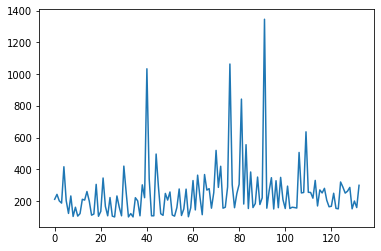

In [ ]:
plt.plot(dataset)
plt.show()

In [ ]:
# fix random seed for reproducibility
tf.random.set_seed(7)

In [ ]:
# load the dataset

dataset = dataset.values
dataset = dataset.astype('float32')

In [ ]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [ ]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

89 44


In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=1000, batch_size=1, verbose=2)

Epoch 1/1000
87/87 - 3s - loss: 0.0266 - 3s/epoch - 36ms/step
Epoch 2/1000
87/87 - 0s - loss: 0.0212 - 174ms/epoch - 2ms/step
Epoch 3/1000
87/87 - 0s - loss: 0.0199 - 165ms/epoch - 2ms/step
Epoch 4/1000
87/87 - 0s - loss: 0.0197 - 203ms/epoch - 2ms/step
Epoch 5/1000
87/87 - 0s - loss: 0.0197 - 230ms/epoch - 3ms/step
Epoch 6/1000
87/87 - 0s - loss: 0.0198 - 183ms/epoch - 2ms/step
Epoch 7/1000
87/87 - 0s - loss: 0.0198 - 174ms/epoch - 2ms/step
Epoch 8/1000
87/87 - 0s - loss: 0.0197 - 169ms/epoch - 2ms/step
Epoch 9/1000
87/87 - 0s - loss: 0.0198 - 167ms/epoch - 2ms/step
Epoch 10/1000
87/87 - 0s - loss: 0.0198 - 167ms/epoch - 2ms/step
Epoch 11/1000
87/87 - 0s - loss: 0.0197 - 192ms/epoch - 2ms/step
Epoch 12/1000
87/87 - 0s - loss: 0.0198 - 184ms/epoch - 2ms/step
Epoch 13/1000
87/87 - 0s - loss: 0.0199 - 178ms/epoch - 2ms/step
Epoch 14/1000
87/87 - 0s - loss: 0.0198 - 157ms/epoch - 2ms/step
Epoch 15/1000
87/87 - 0s - loss: 0.0198 - 167ms/epoch - 2ms/step
Epoch 16/1000
87/87 - 0s - loss: 0.0

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 174.11 RMSE
Test Score: 196.66 RMSE


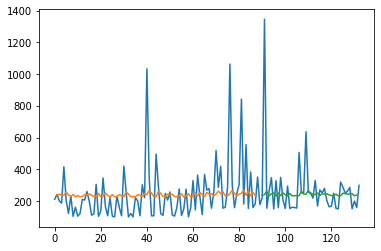

In [ ]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(testY[0], testPredict[:,0]))
print('MSE:', metrics.mean_squared_error(testY[0], testPredict[:,0]))
print('RMSE:', np.sqrt(metrics.mean_squared_error(testY[0], testPredict[:,0])))
print('R:', metrics.r2_score(testY[0], testPredict[:,0]))

MAE: 95.73827964109589
MSE: 38676.121949118366
RMSE: 196.66245688773026
R: -0.02846769633882773


## **Regressão**

### **ANN**

Primeiro rodar as linhas do tópico "regressão lienar com o valor y anterior" com janela de 1

In [ ]:
df_reg

y_    y1
0     211   242
1     242   201
2     201   187
3     187   416
4     416   203
5     203   122
6     122   232
7     232   103
8     103   161
9     161   105
10    105   121
11    121   211
12    211   206
13    206   260
14    260   200
15    200   111
16    111   118
17    118   305
18    305   104
19    104   135
20    135   345
21    345   166
22    166   107
23    107   222
24    222   105
25    105   100
26    100   232
27    232   162
28    162   107
29    107   420
30    420   256
31    256   100
32    100   121
33    121   100
34    100   221
35    221   201
36    201   107
37    107   302
38    302   221
39    221  1033
40   1033   340
41    340   107
42    107   107
43    107   496
44    496   290
45    290   120
46    120   110
47    110   248
48    248   206
49    206   257
50    257   112
51    112   105
52    105   159
53    159   276
54    276   109
55    109   150
56    150   275
57    275   101
58    101   157
59    157   329
60    329   144
61    144   363
62    363   226
63    226   114
64    114   367
65    367   269
66    269   278
67    278   155
68    155   253
69    253   519
70    519   286
71    286   419
72    419   155
73    155   161
74    161   289
75    289  1063
76   1063   303
77    303   158
78    158   247
79    247   305
80    305   842
81    842   181
82    181   555
83    555   153
84    153   383
85    383   159
86    159   184
87    184   351
88    351   178
89    178   220
90    220  1345
91   1345   155
92    155   263
93    263   347
94    347   150
95    150   328
96    328   158
97    158   349
98    349   209
99    209   153
100   153   294
101   294   153
102   153   161
103   161   159
104   159   156
105   156   506
106   506   251
107   251   254
108   254   636
109   636   255
110   255   254
111   254   218
112   218   330
113   330   169
114   169   270
115   270   251
116   251   280
117   280   205
118   205   164
119   164   167
120   167   249
121   249   154
122   154   151
123   151   320
124   320   288
125   288   250
126   250   262
127   262   286
128   286   151
129   151   200
130   200   159
131   159   299

In [ ]:
X = df_reg[['y_']]
y = df_reg['y1']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, shuffle=False, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((99, 1), (33, 1), (99,), (33,))

In [ ]:
# create ANN model
model = Sequential()
 
# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=5, input_dim=1, kernel_initializer='normal', activation='relu'))
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
 
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))
 
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')
 
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 10, epochs = 50, verbose=1)

Epoch 1/50
10/10 [==============================] - 1s 5ms/step - loss: 103452.5938
Epoch 2/50
10/10 [==============================] - 0s 4ms/step - loss: 103430.2422
Epoch 3/50
10/10 [==============================] - 0s 4ms/step - loss: 103402.1719
Epoch 4/50
10/10 [==============================] - 0s 3ms/step - loss: 103371.1250
Epoch 5/50
10/10 [==============================] - 0s 5ms/step - loss: 103336.2656
Epoch 6/50
10/10 [==============================] - 0s 3ms/step - loss: 103293.9531
Epoch 7/50
10/10 [==============================] - 0s 4ms/step - loss: 103255.0469
Epoch 8/50
10/10 [==============================] - 0s 3ms/step - loss: 103217.5156
Epoch 9/50
10/10 [==============================] - 0s 3ms/step - loss: 103178.1328
Epoch 10/50
10/10 [==============================] - 0s 3ms/step - loss: 103141.8984
Epoch 11/50
10/10 [==============================] - 0s 3ms/step - loss: 103104.9297
Epoch 12/50
10/10 [==============================] - 0s 5ms/step - loss: 1

In [ ]:
# Defining a function to find the best parameters for ANN
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20]
    epoch_list  =   [5, 10, 50, 100]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=5, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))

            # Defining the Second layer of the model
            model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))

            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))

            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')

            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)

            MAPE = metrics.mean_absolute_percentage_error(y_test, model.predict(X_test))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)


######################################################
# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

2/2 [==============================] - 0s 14ms/step
1 Parameters: batch_size: 5 - epochs: 5 Accuracy: 99.03376979609618
2/2 [==============================] - 0s 11ms/step
2 Parameters: batch_size: 5 - epochs: 10 Accuracy: 99.15084062038699
2/2 [==============================] - 0s 10ms/step
3 Parameters: batch_size: 5 - epochs: 50 Accuracy: 99.00436648607025
2/2 [==============================] - 0s 7ms/step
4 Parameters: batch_size: 5 - epochs: 100 Accuracy: 99.00875725019603


2/2 [==============================] - 0s 13ms/step
5 Parameters: batch_size: 10 - epochs: 5 Accuracy: 99.00241966530201


2/2 [==============================] - 0s 4ms/step
6 Parameters: batch_size: 10 - epochs: 10 Accuracy: 99.04241988473335
2/2 [==============================] - 0s 6ms/step
7 Parameters: batch_size: 10 - epochs: 50 Accuracy: 99.59958819937577
2/2 [==============================] - 0s 9ms/step
8 Parameters: batch_size: 10 - epochs: 100 Accuracy: 99.60432313239588
2/2 [==============================] - 0s 9ms/step
9 Parameters: batch_size: 15 - epochs: 5 Accuracy: 99.00073084069172
2/2 [==============================] - 0s 6ms/step
10 Parameters: batch_size: 15 - epochs: 10 Accuracy: 99.01001240975916
2/2 [==============================] - 0s 7ms/step
11 Parameters: batch_size: 15 - epochs: 50 Accuracy: 99.5723196588148
2/2 [==============================] - 0s 8ms/step
12 Parameters: batch_size: 15 - epochs: 100 Accuracy: 99.60223386026776
2/2 [==============================] - 0s 9ms/step
13 Parameters: batch_size: 20 - epochs: 5 Accuracy: 99.00127299777142
2/2 [========================

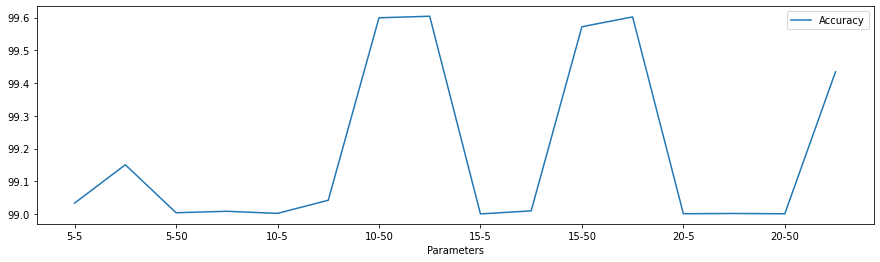

In [ ]:
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line')

In [ ]:
#Treinando com os pelhores parâmetros

# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 20, epochs = 50, verbose=0)
 
# Generating Predictions on testing data
Predictions=model.predict(X_test)

2/2 [==============================] - 0s 8ms/step


In [ ]:
Test_Data=X_test
 
TestingData=pd.DataFrame(data=Test_Data)
TestingData['valor real']=y_test
TestingData['valor predito']=Predictions
TestingData.head()

y_  valor real  valor predito
99   209         153       4.682384
100  153         294       4.682345
101  294         153       4.682385
102  153         161       4.682345
103  161         159       4.682364

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, Predictions))
print('MSE:', metrics.mean_squared_error(y_test, Predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, Predictions)))
print('R:', metrics.r2_score(y_test,Predictions))
print('MAPE', metrics.mean_absolute_percentage_error(y_test, Predictions))
print('Accuracy:', abs(1-(metrics.mean_absolute_percentage_error(y_test, Predictions)))*100)

MAE: 239.40853477246833
MSE: 67637.98378272836
RMSE: 260.0730354779756
R: -5.55309209637085
MAPE 0.9783236404169641
Accuracy: 2.167635958303593


In [ ]:
def make_regression_ann(Optimizer_trial):
    
    model = Sequential()
    model.add(Dense(units=5, input_dim=7, kernel_initializer='normal', activation='relu'))
    model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer=Optimizer_trial)
    return model

In [ ]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
 
# Listing all the parameters to try
Parameter_Trials={'batch_size':[10,20,30],
                      'epochs':[10,20],
                    'Optimizer_trial':['adam', 'rmsprop']
                 }
 
# Creating the regression ANN model
RegModel=KerasRegressor(make_regression_ann, verbose=0)

In [ ]:
from sklearn.metrics import make_scorer
 
# Defining a custom function to calculate accuracy
def Accuracy_Score(orig,pred):
    MAPE = 100*(metrics.mean_absolute_percentage_error(orig, pred))
    print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)
 
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

In [ ]:
# Creating the Grid search space
# See different scoring methods by using sklearn.metrics.SCORERS.keys()
grid_search=GridSearchCV(estimator=RegModel, 
                         param_grid=Parameter_Trials, 
                         scoring=custom_Scoring, 
                         cv=5)

### **Regressão com Decision Tree**

In [ ]:
#Pegando somente o vendedor 303

df_303 = dataframe[dataframe['codvendedor'] == 303]
df_303.head()

Unnamed: 0             _id  codvendedor  vltotal  vltabela  codigo01  \
2            2  303_2022-02-01          303      159       159   10477.0   
19          19  303_2022-02-02          303      276       280   10034.0   
23          23  303_2022-02-03          303      109       108    2993.0   
30          30  303_2022-02-07          303      353       354    2847.0   
44          44  303_2022-02-08          303      275       280    3276.0   

    codigo02                 data tipometa tipodados  vl_venda  qt_venda  \
2     3522.0  2022-02-01T00:00:00       CF         A        51      25.0   
19    4599.0  2022-02-02T00:00:00       CF         A       110      20.0   
23    4599.0  2022-02-03T00:00:00       CF         A        22       6.0   
30       NaN  2022-02-07T00:00:00        P         A        21      12.0   
44       NaN  2022-02-08T00:00:00        P         A        21       1.0   

       peso  pos_mix  pos_clientes  perc_lucratividade  vl_venda_transmitida  \
2    53.460      2.0           1.0            0.286859                  1721   
19   23.058      2.0           1.0            0.296441                  2168   
23  223.250      1.0           1.0            0.238347                  1964   
30      NaN      NaN           1.0            0.247425                  1586   
44   26.860      NaN           1.0            0.281073                  1811   

    vl_venda_faturada  vl_venda_tabela  vl_venda_custo  vl_devolucao  \
2                1247             1742            1227             0   
19                473             2181            1525           121   
23               3414             1973            1496             0   
30                  0             1590            1193             0   
44                336             1809            1302             0   

    vl_comissao  vl_st  vl_ipi  vl_outros  vl_venda_nao_faturada  \
2             0      0       0          0                      0   
19            0      0       0          0                      0   
23            0      0       0          0                      0   
30            0      0       0          0                      0   
44            0      0       0          0                      0   

    vl_venda_bloqueada  clientes_positivados  clientes_positivados_delta  \
2                    0                   9.0                         9.0   
19                   0                  17.0                         8.0   
23                   0                  25.0                         8.0   
30                   0                  44.0                         9.0   
44                   0                  51.0                         7.0   

    total_pedidos  total_pedidos_prazo  vl_venda_callcenter  \
2            1721                19930                    0   
19           2168                38599                    0   
23           1964                20973                    0   
30           1586                15881                    0   
44           1811                33274                    0   

    vl_titulos_recebidos  vl_lucro  vl_venda_lucro  vl_comissao_venda  \
2                      0         0               0                  0   
19                     0         0               0                  0   
23                     0         0               0                  0   
30                     0         0               0                  0   
44                     0         0               0                  0   

    vl_vales  vl_venda_tabela_faturada  codbairro  codcidade  codpais  \
2          0                         0        NaN      10196      NaN   
19         0                         0        NaN      10196      NaN   
23         0                         0        NaN      10196      NaN   
30         0                         0        NaN      10196      NaN   
44         0                         0        NaN      10196      NaN   

    codsupervisor  codcliprinc  uf  codibge    y  vlt

In [ ]:
df_303 = df_303.sort_values(by=['data'])

In [ ]:
df_303['data'] = pd.to_datetime(df_303['data'])

In [ ]:
X = df_303[['vltotal']]
y = df_303['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, shuffle=False, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((99, 1), (34, 1), (99,), (34,))

In [ ]:
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
# predicting a new value
  
y_pred = regressor.predict(X_test)
  
y_pred

array([ 150.        ,  242.        ,  242.        ,  166.        ,
        383.        ,  278.        ,  276.        , 1063.        ,
        519.        ,  105.        ,  100.        ,  178.        ,
        100.        ,  158.        , 1345.        ,  153.        ,
        107.        ,  204.66666667,  100.        ,  155.        ,
        107.        ,  419.        ,  107.        ,  201.        ,
        100.        ,  305.        ,  153.        ,  419.        ,
        107.        ,  158.        ,  419.        ,  305.        ,
        269.        ,  276.        ])

In [ ]:
df_303['total_pedidos_prazo'].dtype

dtype('int64')

In [ ]:
X_train = pd.DataFrame.to_numpy(X_train)
X_train

array([[ 102],
       [ 211],
       [ 242],
       [ 201],
       [ 100],
       [ 416],
       [ 315],
       [ 122],
       [   0],
       [ 127],
       [ 161],
       [ 105],
       [ 121],
       [ 102],
       [ 206],
       [ 182],
       [ 200],
       [ 111],
       [ 118],
       [ 201],
       [ 104],
       [ 135],
       [ 296],
       [ 166],
       [ 107],
       [ 222],
       [ 121],
       [ 100],
       [ 232],
       [ 162],
       [ 305],
       [ 420],
       [ 256],
       [ 100],
       [ 105],
       [ 100],
       [ 221],
       [ 201],
       [ 111],
       [ 302],
       [ 221],
       [1033],
       [ 204],
       [ 107],
       [ 107],
       [ 496],
       [ 164],
       [ 120],
       [   0],
       [ 108],
       [ 206],
       [ 257],
       [ 112],
       [ 111],
       [ 159],
       [ 276],
       [ 109],
       [ 353],
       [ 275],
       [ 101],
       [ 157],
       [ 116],
       [ 144],
       [ 363],
       [ 206],
       [ 114],
       [ 3

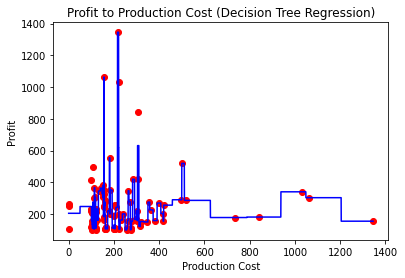

In [ ]:
# arange for creating a range of values 
# from min value of X to max value of X 
# with a difference of 0.01 between two
# consecutive values
X_grid = np.arange(min(X_train), max(X_train), 0.01)
  
# reshape for reshaping the data into 
# a len(X_grid)*1 array, i.e. to make
# a column out of the X_grid values
X_grid = X_grid.reshape((len(X_grid), 1)) 
  
# scatter plot for original data
plt.scatter(X_train, y_train, color = 'red')
  
# plot predicted data
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue') 
  
# specify title
plt.title('Profit to Production Cost (Decision Tree Regression)') 
  
# specify X axis label
plt.xlabel('Production Cost')
  
# specify Y axis label
plt.ylabel('Profit')
  
# show the plot
plt.show()

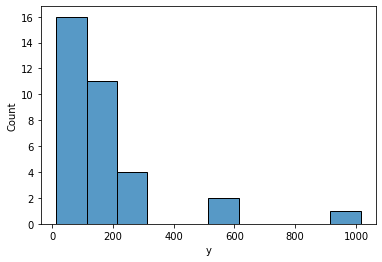

In [ ]:
absolute_error = abs(y_test - y_pred)

sns.histplot(absolute_error, bins=10)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R:', metrics.r2_score(y_test,y_pred))
MAPE = np.mean(100 * (np.abs(y_test-y_pred)/y_test))
acc = 100 - MAPE
print(f'Acurácia de {acc:.2f}')

MAE: 164.77450980392157
MSE: 64284.022875817
RMSE: 253.54294089131528
R: -5.394438746144565
Acurácia de 35.24


### **XGBoost**

In [ ]:
# evaluate an xgboost regression model on the housing dataset
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
import xgboost as xg

In [ ]:
df_reg

y_    y1
0     211   242
1     242   201
2     201   187
3     187   416
4     416   203
5     203   122
6     122   232
7     232   103
8     103   161
9     161   105
10    105   121
11    121   211
12    211   206
13    206   260
14    260   200
15    200   111
16    111   118
17    118   305
18    305   104
19    104   135
20    135   345
21    345   166
22    166   107
23    107   222
24    222   105
25    105   100
26    100   232
27    232   162
28    162   107
29    107   420
30    420   256
31    256   100
32    100   121
33    121   100
34    100   221
35    221   201
36    201   107
37    107   302
38    302   221
39    221  1033
40   1033   340
41    340   107
42    107   107
43    107   496
44    496   290
45    290   120
46    120   110
47    110   248
48    248   206
49    206   257
50    257   112
51    112   105
52    105   159
53    159   276
54    276   109
55    109   150
56    150   275
57    275   101
58    101   157
59    157   329
60    329   144
61    144   363
62    363   226
63    226   114
64    114   367
65    367   269
66    269   278
67    278   155
68    155   253
69    253   519
70    519   286
71    286   419
72    419   155
73    155   161
74    161   289
75    289  1063
76   1063   303
77    303   158
78    158   247
79    247   305
80    305   842
81    842   181
82    181   555
83    555   153
84    153   383
85    383   159
86    159   184
87    184   351
88    351   178
89    178   220
90    220  1345
91   1345   155
92    155   263
93    263   347
94    347   150
95    150   328
96    328   158
97    158   349
98    349   209
99    209   153
100   153   294
101   294   153
102   153   161
103   161   159
104   159   156
105   156   506
106   506   251
107   251   254
108   254   636
109   636   255
110   255   254
111   254   218
112   218   330
113   330   169
114   169   270
115   270   251
116   251   280
117   280   205
118   205   164
119   164   167
120   167   249
121   249   154
122   154   151
123   151   320
124   320   288
125   288   250
126   250   262
127   262   286
128   286   151
129   151   200
130   200   159
131   159   299

In [ ]:
X = df_reg[['y_']]
y = df_reg['y1']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, shuffle=False, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((99, 1), (33, 1), (99,), (33,))

In [ ]:
# Instantiation
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)
 
# Fitting the model
xgb_r.fit(X_train, y_train)
 
# Predict the model
pred = xgb_r.predict(X_test) 
 
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('R:', metrics.r2_score(y_test, pred))
print('MAPE', metrics.mean_absolute_percentage_error(y_test, pred))
print('Accuracy:', abs(1-(metrics.mean_absolute_percentage_error(y_test, pred)))*100)

[14:01:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE: 85.04557800292969
MSE: 16391.005375645887
RMSE: 128.0273618241268
R: -0.5880391722460723
MAPE 0.28665950733140055
Accuracy: 71.33404926685995


In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

xgb1 = XGBRegressor()
parameters = {
              'objective':['reg:squarederror'],
              'learning_rate': [.0001, 0.001, .01],
              'max_depth': [3, 5, 7],
              'min_child_weight': [3,5,7],
              'subsample': [0.1,0.5,1.0],
              'colsample_bytree': [0.1, 0.5, 1.0],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 3,
                        n_jobs = -1,
                        verbose=0)

xgb_grid.fit(X_train, y_train)

xgb_cv = (xgb_grid.best_estimator_)

eval_set = [(X_train, y_train),
            (X_test, y_test)]

fit_model = xgb_cv.fit(X_train,y_train)

pred = fit_model.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('R:', metrics.r2_score(y_test, pred))
MAPE = np.mean(100 * (np.abs(y_test-pred)/y_test))
acc = 100 - MAPE
print(f'Acurácia de {acc:.2f}')


MAE: 68.17683734315814
MSE: 10276.777515954267
RMSE: 101.37444212401007
R: 0.004336531788247666
Acurácia de 69.91


### **SVR**

In [ ]:
# Kernel rbf
from sklearn.svm import SVR
regressor_svr = SVR(kernel = 'rbf', C=10.0, cache_size=200, coef0=0.0, epsilon=0.07, gamma='scale')
regressor_svr.fit(X_train, y_train)

SVR(C=10.0, epsilon=0.07)

In [ ]:
pred = regressor_svr.predict(X_test)

In [ ]:
regressor_svr.score(X_train, y_train)

-0.052919761691590406

In [ ]:
regressor_svr.score(X_test, y_test)

-0.1407569054798774

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('R:', metrics.r2_score(y_test, pred))
MAPE = np.mean(100 * (np.abs(y_test-pred)/y_test))
acc = 100 - MAPE
print(f'Acurácia de {acc:.2f}')

MAE: 74.7691619844596
MSE: 11774.364824754144
RMSE: 108.50974529854055
R: -0.1407569054798774
Acurácia de 72.04


In [ ]:
pred

array([209.88486464, 218.40616625, 194.42586669, 218.40616625,
       217.51724795, 217.75149761, 218.08792998, 205.54403207,
       201.63232864, 201.05741133, 207.47342275, 200.86731571,
       201.05741133, 208.14911469, 191.05572416, 216.5028302 ,
       198.13486146, 201.63232864, 196.47288149, 210.63659445,
       217.1511808 , 216.76781543, 202.01910903, 218.30212622,
       218.60808446, 191.69105946, 195.25933234, 201.8253925 ,
       199.56185969, 195.55216557, 218.60808446, 211.55479368,
       217.75149761])

In [ ]:
y_test.values

array([153, 294, 153, 161, 159, 156, 506, 251, 254, 636, 255, 254, 218,
       330, 169, 270, 251, 280, 205, 164, 167, 249, 154, 151, 320, 288,
       250, 262, 286, 151, 200, 159, 299])

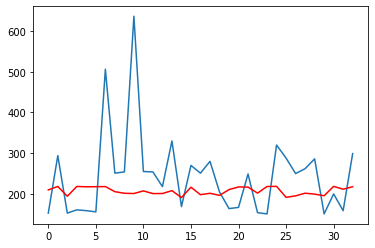

In [ ]:
# plot o valor real (test) e as predições 
plt.plot(y_test.values) 
plt.plot(pred, color='red')
plt.show()

**GridSearch**

In [ ]:
from sklearn.model_selection import GridSearchCV

grid = [
    {'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
     'gamma':['scale', 'auto'],
     'C':[5,10,20,30,40,50],
     'coef0': np.logspace(-3,3,7),
     'epsilon':np.logspace(-3,3,7),
     }
]

regressor_svr = SVR()
regressor_svr_cv=GridSearchCV(regressor_svr,grid,cv=10)
regressor_svr_cv.fit(X_train, y_train)

### **Pycaret Regressão**

In [ ]:
df_reg

In [ ]:
X = df_reg[['y_']]
y = df_reg['y1']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, shuffle=False, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((99, 1), (33, 1), (99,), (33,))

In [ ]:
regscsc = setup(data = df_reg, 
            target ='y_',
            session_id = 0,
            fold=10,
            #remove_multicollinearity = True,
            #multicollinearity_threshold = 0.1,
            normalize = True,
            normalize_method = 'minmax',
            #feature_selection	= True,
            #feature_selection_threshold = 0.99

            )

Description             Value
0                               session_id                 0
1                                   Target                y_
2                            Original Data          (132, 2)
3                           Missing Values             False
4                         Numeric Features                 1
5                     Categorical Features                 0
6                         Ordinal Features             False
7                High Cardinality Features             False
8                  High Cardinality Method              None
9                    Transformed Train Set           (92, 1)
10                    Transformed Test Set           (40, 1)
11                      Shuffle Train-Test              True
12                     Stratify Train-Test             False
13                          Fold Generator             KFold
14                             Fold Number                10
15                                CPU Jobs                -1
16                                 Use GPU             False
17                          Log Experiment             False
18                         Experiment Name  reg-default-name
19                                     USI              e419
20                         Imputation Type            simple
21          Iterative Imputation Iteration              None
22                         Numeric Imputer              mean
23      Iterative Imputation Numeric Model              None
24                     Categorical Imputer          constant
25  Iterative Imputation Categorical Model              None
26           Unknown Categoricals Handling    least_frequent
27                               Normalize              True
28                        Normalize Method            minmax
29                          Transformation             False
30                   Transformation Method              None
31                                     PCA             False
32                              PCA Method              None
33                          PCA Components              None
34                     Ignore Low Variance             False
35                     Combine Rare Levels             False
36                    Rare Level Threshold              None
37                         Numeric Binning             False
38                         Remove Outliers             False
39                      Outliers Threshold              None
40                Remove Multicollinearity             False
41             Multicollinearity Threshold              None
42             Remove Perfect Collinearity              True
43                              Clustering             False
44                    Clustering Iteration              None
45                     Polynomial Features             False
46                       Polynomial Degree              None
47                    Trignometry Features             False
48                    Polynomial Threshold              None
49                          Group Features             False
50                       Feature Selection             False
51                Feature Selection Method           classic
52            Features Selection Threshold              None
53                     Feature Interaction             False
54                           Feature Ratio             False
55                   Interaction Threshold              None
56                        Transform Target             False
57                 Transform Target Method           box-cox

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='y_',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='mea...
                                                  target='y_')),
                ('P_transform', 'passthrough'), ('binn', 'passthrough'),
                ('rem_outliers', 'passthrough'), ('cluster_all', 'passthro

In [ ]:
best_model = compare_models()

Model       MAE         MSE      RMSE  \
par          Passive Aggressive Regressor  100.3837  28682.8755  150.9522   
huber                     Huber Regressor  101.3862  28223.0001  150.6486   
br                         Bayesian Ridge  104.2228  27279.2744  150.5753   
dummy                     Dummy Regressor  104.2228  27279.2737  150.5753   
llar         Lasso Least Angle Regression  104.2228  27279.2740  150.5753   
lasso                    Lasso Regression  104.2228  27279.2740  150.5753   
en                            Elastic Net  104.2267  27280.2788  150.5799   
ridge                    Ridge Regression  104.4241  27327.2519  150.7869   
omp           Orthogonal Matching Pursuit  104.5164  27352.3169  150.9006   
lar                Least Angle Regression  104.5164  27352.3165  150.9006   
lr                      Linear Regression  104.5164  27352.3170  150.9006   
lightgbm  Light Gradient Boosting Machine  108.9587  28719.7311  156.4374   
knn                 K Neighbors Regressor  124.9360  35009.3435  174.6536   
et                  Extra Trees Regressor  146.6607  47034.6081  200.6597   
ada                    AdaBoost Regressor  131.1311  45860.3898  192.8992   
rf                Random Forest Regressor  142.8973  45223.7382  197.2895   
gbr           Gradient Boosting Regressor  143.5794  51872.0935  207.7203   
dt                Decision Tree Regressor  160.0572  59746.3801  225.1987   

              R2   RMSLE    MAPE  TT (Sec)  
par      -0.2101  0.4970  0.4010     0.018  
huber    -0.2303  0.5008  0.4221     0.028  
br       -0.3125  0.5199  0.4976     0.027  
dummy    -0.3125  0.5199  0.4976     0.014  
llar     -0.3125  0.5199  0.4976     0.020  
lasso    -0.3125  0.5199  0.4976     0.025  
en       -0.3127  0.5199  0.4976     0.030  
ridge    -0.3187  0.5204  0.4979     0.024  
omp      -0.3222  0.5207  0.4981     0.026  
lar      -0.3222  0.5207  0.4981     0.026  
lr       -0.3222  0.5207  0.4981     0.538  
lightgbm -0.4933  0.5393  0.5132     0.047  
knn      -1.1184  0.6165  0.6014     0.072  
et       -1.9883  0.6921  0.6899     0.412  
ada      -2.2439  0.6108  0.6772     0.064  
rf       -2.6644  0.6718  0.6918     0.457  
gbr      -3.1743  0.6575  0.6876     0.041  
dt       -3.8132  0.7455  0.7645     0.029

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:PassiveAggressiveRegressor(C=1.0, average=False, early_stopping=False,
                           epsilon=0.1, fit_intercept=True,
                           loss='epsilon_insensitive', max_iter=1000,
                           n_iter_no_change=5, random_state=0, shuffle=True,
                           tol=0.001, validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
par = create_model("par")

MAE         MSE      RMSE      R2   RMSLE    MAPE
Fold                                                        
0     129.3786  71240.5498  266.9093 -0.0871  0.5973  0.3695
1     139.7850  78472.1382  280.1288 -0.1548  0.6048  0.3291
2     116.5961  21273.0456  145.8528 -1.3571  0.4967  0.3220
3      73.2091   8659.1625   93.0546 -0.0030  0.4231  0.3928
4      60.9909   5115.4731   71.5225 -0.1992  0.4366  0.4622
5      87.2462   8579.2364   92.6242 -0.0155  0.4873  0.5265
6      52.5820   3559.2521   59.6595  0.0093  0.3169  0.3063
7     153.7730  54412.3296  233.2645 -0.0851  0.6633  0.5659
8      93.9937  17340.8904  131.6848 -0.1037  0.4785  0.3674
9      96.2829  18176.6775  134.8209 -0.1044  0.4656  0.3689
Mean  100.3837  28682.8755  150.9522 -0.2101  0.4970  0.4010
Std    32.1122  26903.1259   76.7874  0.3874  0.0961  0.0838

INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 3
INFO:logs:PassiveAggressiveRegressor(C=1.0, average=False, early_stopping=False,
                           epsilon=0.1, fit_intercept=True,
                           loss='epsilon_insensitive', max_iter=1000,
                           n_iter_no_change=5, random_state=0, shuffle=True,
                           tol=0.001, validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:create_model() succesfully completed......................................


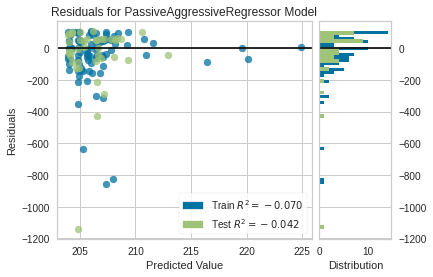

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(par)

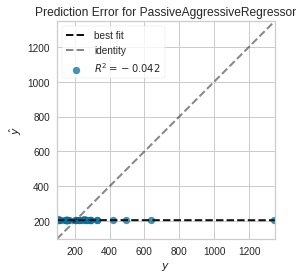

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(par, plot="error")

In [ ]:
predi_modeltreino = predict_model(par)
predi_modeltreino

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=PassiveAggressiveRegressor(C=1.0, average=False, early_stopping=False,
                           epsilon=0.1, fit_intercept=True,
                           loss='epsilon_insensitive', max_iter=1000,
                           n_iter_no_change=5, random_state=0, shuffle=True,
                           tol=0.001, validation_fraction=0.1, verbose=0,
                           warm_start=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


Model       MAE         MSE      RMSE      R2  \
0  Passive Aggressive Regressor  107.2716  44655.0529  211.3174 -0.0416   

    RMSLE    MAPE  
0  0.5271  0.4061

y1    y_       Label
0   0.198394   263  208.103637
1   0.142972   269  206.946737
2   0.106024   100  206.175470
3   0.048996   103  204.985037
4   0.125301   420  206.577870
5   0.044177  1345  204.884437
6   0.124498   636  206.561104
7   0.155823   153  207.215003
8   0.152610   496  207.147937
9   0.042570   294  204.850904
10  0.042570   209  204.850904
11  0.140562   150  206.896437
12  0.318072   107  210.601870
13  0.046586   328  204.934737
14  0.005622   166  204.079637
15  0.118072   158  206.426970
16  0.183133   150  207.785070
17  0.200000   158  208.137170
18  0.002410   232  204.012571
19  0.004016   222  204.046104
20  0.211245   144  208.371904
21  0.016867   105  204.314371
22  0.430522   254  212.949203
23  0.016064   290  204.297604
24  0.014458   111  204.264071
25  0.069880   201  205.420970
26  0.122892   155  206.527570
27  0.011245   226  204.197004
28  0.256225   286  209.310837
29  0.067470   159  205.370670
30  0.000000   121  203.962271
31  0.080321   151  205.638937
32  0.035341   329  204.700004
33  0.048996   155  204.985037
34  0.120482   288  206.477270
35  0.128514   206  206.644937
36  0.004016   112  204.046104
37  0.130120   250  206.678470
38  0.227309   153  208.707237
39  0.009639   257  204.163471

### **Floresta aleatória**

In [ ]:
X = df_reg[['y_']]
y = df_reg['y1']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, shuffle=False, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((99, 1), (33, 1), (99,), (33,))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor_random_forest = RandomForestRegressor(n_estimators = 100)
regressor_random_forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
regressor_random_forest.score(X_train, y_train)

0.6950060405400074

In [ ]:
regressor_random_forest.score(X_test, y_test)

-3.0587425106630164

In [ ]:
pred = regressor_random_forest.predict(X_test) 

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('R:', metrics.r2_score(y_test, pred))
print('MAPE', metrics.mean_absolute_percentage_error(y_test, pred))
print('Accuracy:', abs(1-(metrics.mean_absolute_percentage_error(y_test, pred)))*100)

MAE: 134.41243145743147
MSE: 41892.46176877771
RMSE: 204.67648074162724
R: -3.0587425106630164


AttributeError: ignored

In [ ]:
MAPE = np.mean(100 * (np.abs(y_test-pred)/y_test))
acc = 100 - MAPE
print(f'Acurácia de {acc:.2f}')

Acurácia de 41.90


### **Catboost**

In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 68 kB/s 


In [ ]:
from numpy import mean
from numpy import std
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
modelcb = CatBoostRegressor(verbose=1, n_estimators=500)
cvcb = RepeatedKFold(n_splits=10, n_repeats=3, random_state=0)
n_scorescb = cross_val_score(modelcb, X_train, y_train, scoring='neg_mean_absolute_error', cv=cvcb, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (mean(n_scorescb), std(n_scorescb)))
modelcb = CatBoostRegressor(verbose=0, n_estimators=500)
modelcb.fit(X_train, y_train)
yhatcb = modelcb.predict(X_train)
print('Prediction: %.3f' % yhatcb[0])

MAE: -130.953 (49.303)
Prediction: 246.610


In [ ]:
ythcb = modelcb.predict(X_test)
print('Prediction: %.3f' % ythcb[0])

Prediction: 246.610


In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, ythcb))
print('MSE:', metrics.mean_squared_error(y_test, ythcb))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ythcb)))
print('R:', metrics.r2_score(y_test, ythcb))
MAPE = np.mean(100 * (np.abs(y_test-ythcb)/y_test))
acc = 100 - MAPE
print(f'Acurácia de {acc:.2f}')

MAE: 125.21069832555179
MSE: 46397.43109322629
RMSE: 215.40062927769335
R: -3.4952055337074066
Acurácia de 48.28


### **lightgbm**

In [ ]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import lightgbm as lgb

In [ ]:
modellgb = lgb.LGBMRegressor()
modellgb.fit(X_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
predicttreino = modellgb.predict(X_train)

In [ ]:
predict = modellgb.predict(X_test)

In [ ]:
modellgb.score(X_train, y_train)

0.17424666296802205

In [ ]:
modellgb.score(X_test, y_test)

-0.46646336865702676

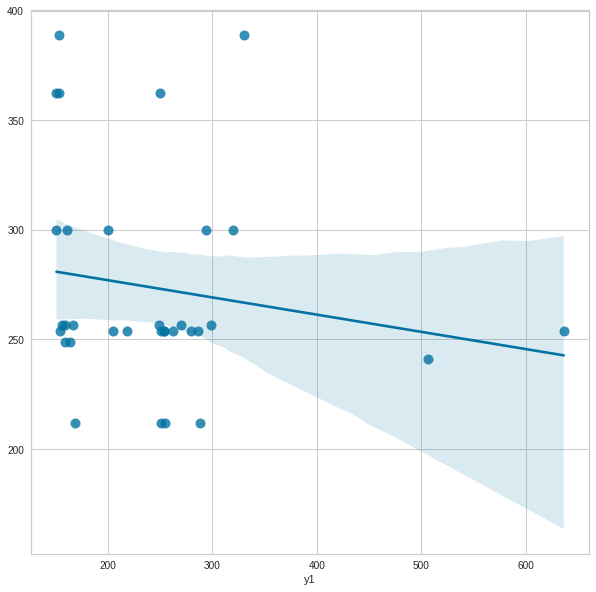

In [ ]:
plt.figure(figsize=(10,10))
sns.regplot(y_test, predict, fit_reg=True, scatter_kws={"s": 100})

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predict))
print('MSE:', metrics.mean_squared_error(y_test, predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict)))
print('R:', metrics.r2_score(y_test, predict))
MAPE = np.mean(100 * (np.abs(y_test-predict)/y_test))
acc = 100 - MAPE
print(f'Acurácia de {acc:.2f}')

MAE: 86.93396674307782
MSE: 15136.156197487373
RMSE: 123.02908679449496
R: -0.46646336865702676
Acurácia de 58.40


## **Teste para todos os vendedores**

In [ ]:
dataframe['codvendedor'].value_counts()

303    133
302    133
102    130
106    129
101    124
209    123
203    121
208    112
205    103
201     91
109     49
207     47
104     30
103     26
Name: codvendedor, dtype: int64

In [ ]:
dataframe['codvendedor'].values

array([203, 201, 303, ..., 205, 209, 207])

### **SVR**

In [ ]:
sales = dataframe['codvendedor'].values

for sale in set(sales):
    df = dataframe[dataframe['codvendedor'] == sale]
    y = df['y']
    X = df['vltotal']
    if len(y) < 10:
        continue
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, shuffle=False, random_state=1)
    model = SVR(kernel = 'rbf', C=10.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.07, gamma='scale')

    X_train= X_train.values.reshape(-1, 1)
    X_test = X_test.values.reshape(-1, 1)

    model.fit(X_train, y_train)

    predict = model.predict(X_test)

    print(f'######{sale}######')
    print(f'MAE: {metrics.mean_absolute_error(y_test, predict):.2f}')
    print(f'MSE: {metrics.mean_squared_error(y_test, predict):.2f}')
    print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, predict)):.2f}')
    print(f'R: {metrics.r2_score(y_test, predict):.2f}')
    MAPE = np.mean(100 * (np.abs(y_test-predict)/y_test))
    acc = 100 - MAPE
    print(f'MAPE: {MAPE:.2f}')
    print(f'Acurácia: {acc:.2f}')
    print(f'mean y_test: {y_test.mean():.2f}')
    print(f'median y_test: {y_test.median():.2f}')
    print(f'mean pred: {predict.mean():.2f}')
    print(f'median pred: {np.median(predict):.2f}')

######201######
MAE: 216.21
MSE: 192001.69
RMSE: 438.18
R: -0.14
MAPE: 42.13
Acurácia: 57.87
mean y_test: 422.13
median y_test: 305.00
mean pred: 278.96
median pred: 277.04
######205######
MAE: 146.54
MSE: 60801.90
RMSE: 246.58
R: -0.17
MAPE: 39.70
Acurácia: 60.30
mean y_test: 303.69
median y_test: 211.00
mean pred: 219.48
median pred: 222.68
######101######
MAE: 149.99
MSE: 58800.40
RMSE: 242.49
R: -0.08
MAPE: 40.85
Acurácia: 59.15
mean y_test: 320.55
median y_test: 199.00
mean pred: 255.58
median pred: 256.48
######207######
MAE: 105.30
MSE: 16056.43
RMSE: 126.71
R: -0.02
MAPE: 45.16
Acurácia: 54.84
mean y_test: 279.33
median y_test: 261.00
mean pred: 287.78
median pred: 287.45
######209######
MAE: 258.60
MSE: 166259.72
RMSE: 407.75
R: -0.35
MAPE: 45.94
Acurácia: 54.06
mean y_test: 446.39
median y_test: 329.00
mean pred: 237.81
median pred: 239.19
######102######
MAE: 215.98
MSE: 184042.43
RMSE: 429.00
R: -0.15
MAPE: 41.17
Acurácia: 58.83
mean y_test: 414.45
median y_test: 289.00
mea

### **Regressão Linear**

In [ ]:
sales = dataframe['codvendedor'].values

for sale in set(sales):
    df = dataframe[dataframe['codvendedor'] == sale]
    y = df['y']
    X = df['vltotal']
    if len(y) < 10:
        continue
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, shuffle=False, random_state=1)
    model = regressor = LinearRegression()
    
    X_train= X_train.values.reshape(-1, 1)
    X_test = X_test.values.reshape(-1, 1)
    
    regressor.fit(X_train, y_train)

    predict = model.predict(X_test)

    print(f'######{sale}######')
    print(f'MAE: {metrics.mean_absolute_error(y_test, predict):.2f}')
    print(f'MSE: {metrics.mean_squared_error(y_test, predict):.2f}')
    print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, predict)):.2f}')
    print(f'R: {metrics.r2_score(y_test, predict):.2f}')
    MAPE = np.mean(100 * (np.abs(y_test-predict)/y_test))
    acc = 100 - MAPE
    print(f'MAPE: {MAPE:.2f}')
    print(f'Acurácia: {acc:.2f}')
    print(f'mean y_test: {y_test.mean():.2f}')
    print(f'median y_test: {y_test.median():.2f}')
    print(f'mean pred: {predict.mean():.2f}')
    print(f'median pred: {np.median(predict):.2f}')

    resultado = pd.DataFrame()

######201######
MAE: 266.03
MSE: 168861.44
RMSE: 410.93
R: -0.01
MAPE: 82.43
Acurácia: 17.57
mean y_test: 422.13
median y_test: 305.00
mean pred: 460.80
median pred: 461.34
######205######
MAE: 160.31
MSE: 48887.11
RMSE: 221.10
R: 0.06
MAPE: 62.43
Acurácia: 37.57
mean y_test: 303.69
median y_test: 211.00
mean pred: 321.67
median pred: 317.87
######101######
MAE: 173.23
MSE: 53945.46
RMSE: 232.26
R: 0.01
MAPE: 61.90
Acurácia: 38.10
mean y_test: 320.55
median y_test: 199.00
mean pred: 332.96
median pred: 340.21
######207######
MAE: 187.65
MSE: 43489.69
RMSE: 208.54
R: -1.76
MAPE: 96.15
Acurácia: 3.85
mean y_test: 279.33
median y_test: 261.00
mean pred: 446.21
median pred: 448.62
######209######
MAE: 250.53
MSE: 135411.59
RMSE: 367.98
R: -0.10
MAPE: 60.11
Acurácia: 39.89
mean y_test: 446.39
median y_test: 329.00
mean pred: 328.96
median pred: 325.63
######102######
MAE: 238.34
MSE: 160440.38
RMSE: 400.55
R: -0.00
MAPE: 68.71
Acurácia: 31.29
mean y_test: 414.45
median y_test: 289.00
mean p